## Machine learning project - Proteion SS Prediction, with CB513 dataset.


In [1]:
import numpy as np
import pandas as pd
import os


class CB513Dataset:
    def __init__(self, csv_path, npy_path):
        """
        Initializes the dataset loader with paths to CSV and NPY files.

        Parameters:
        - csv_path (str): Path to the CB513 CSV file.
        - npy_path (str): Path to the CB513 NPY file.
        """
        self.csv_path = csv_path
        self.npy_path = npy_path
        self.csv_data = None
        self.npy_data = None

    
    def load_csv(self):
        """
        Loads the CSV dataset using pandas.
        """
        if not os.path.exists(self.csv_path):
            print(f"CSV file not found at: {self.csv_path}")
            return
        
        try:
            self.csv_data = pd.read_csv(self.csv_path)
            print(f"Successfully loaded CSV data from {self.csv_path}\n")
        except Exception as e:
            print(f"Error loading CSV file: {e}\n")

    
    def load_npy(self):
        """
        Loads the NPY dataset using numpy.
        """
        if not os.path.exists(self.npy_path):
            print(f"NPY file not found at: {self.npy_path}")
            return
        
        try:
            self.npy_data = np.load(self.npy_path, allow_pickle=True)
            print(f"Successfully loaded NPY data from {self.npy_path}\n")
        except Exception as e:
            print(f"Error loading NPY file: {e}\n")


    def explore_csv(self):
        """
        Displays exploratory information about the CSV dataset.
        """
        if self.csv_data is None:
            print("CSV data not loaded. Please run load_csv() first.\n")
            return
        
        print("=== CSV Dataset Exploration ===\n")
        print("1. First 5 Rows:")
        print(self.csv_data.head(), "\n")
        
        print("\n2. Dataset Information:")
        print(self.csv_data.info(), "\n")
        
        print("\n3. Summary Statistics:")
        print(self.csv_data.describe(include='all'), "\n")
        
        print("\n4. Missing Values:")
        print(self.csv_data.isnull().sum(), "\n")

    
    def explore_npy(self):
        """
        Displays exploratory information about the NPY dataset.
        """
        if self.npy_data is None:
            print("NPY data not loaded. Please run load_npy() first.\n")
            return
        
        print("\n\n=== NPY Dataset Exploration ===\n")
        
        # Determine the type of data stored in the NPY file
        if isinstance(self.npy_data, np.ndarray):
            print(f"Type: {type(self.npy_data)}")
            print(f"Shape: {self.npy_data.shape}")
            print(f"Dtype: {self.npy_data.dtype}\n")
            
            # Check if the array contains objects (e.g., dictionaries)
            if self.npy_data.dtype == 'object':
                # Assuming it's a dictionary or list of dictionaries
                try:
                    data_item = self.npy_data.item()  # Extract the object
                    if isinstance(data_item, dict):
                        print("Keys in the NPY dictionary:")
                        for key in data_item.keys():
                            print(f"- {key}: {type(data_item[key])}, shape: {getattr(data_item[key], 'shape', 'N/A')}")
                        print("\nSample Data from 'data' Key (if exists):")
                        if 'data' in data_item:
                            print(data_item['data'][0])  # Adjust based on actual keys
                    else:
                        print("NPY object is not a dictionary. Displaying first element:")
                        print(data_item)
                except Exception as e:
                    print(f"Error accessing NPY data contents: {e}")
            else:
                print("Displaying a sample of the NPY data:")
                print(self.npy_data.flatten()[:5], "\n")
        else:
            print(f"Unexpected data type in NPY file: {type(self.npy_data)}\n")


    def load_and_explore(self):
        """
        Convenience method to load and explore both datasets sequentially.
        """
        self.load_csv()
        self.explore_csv()
        
        self.load_npy()
        self.explore_npy()



if __name__ == "__main__":

    csv_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.csv"
    npy_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    
    # Initialize the dataset loader
    dataset = CB513Dataset(csv_path, npy_path)
    
    # Load and explore both datasets
    dataset.load_and_explore()


Successfully loaded CSV data from C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.csv

=== CSV Dataset Exploration ===

1. First 5 Rows:
                                               input  \
0  RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMD...   
1  GKITFYEDRGFQGRHYECSSDHSNLQPYFSRCNSIRVDSGCWMLYE...   
2  MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...   
3  APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...   
4  TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...   

                                               dssp3  \
0  CCCCCCCHHHCCCCCECHHHHCCCCCCCCEHHHHHHHHHHCHHHHH...   
1  CEEEEEEECCCEEEEEEECCCECCCCCCCCCCCEEEEEECEEEEEC...   
2  CEEEEECCCCCCCCHHHHHHHHHHHHCCCCEEEEECCCECCECCHH...   
3  CCEEEEECCCCCCCCCEEEEEEECCCCEEEEEEECEECCEECCCCC...   
4  CCCCCCCEEEEEEEHHHCCCHHHHHHHHHHHCCCCCCCCHHHHHHH...   

                                               dssp8  \
0  CCCTTCCGGGSCCCCBCHHHHTTTTCSCCBHHHHHHHHHHTHHHHH...   
1  CEEEEEEETTTEEEEEEECSCBSCCTTTCSCCS

C:\Users\joems\AppData\Local\Temp\ipykernel_16088\4153531929.py:45: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  self.npy_data = np.load(self.npy_path, allow_pickle=True)


## Dataset Overview

CSV File (CB513.csv):
    - Location: dataset/CB513.csv
    - Size: 511 rows × 5 columns

Columns:
- input: Protein sequences.
- dssp3: Secondary structure annotations (3-state classification).
- dssp8: Secondary structure annotations (8-state classification).
- disorder: Disorder predictions.
- cb513_mask: Masking information for data handling.
- Expected 513 rows based on dataset naming conventions, but the CSV contains 511 rows. This slight reduction is likely due to data preprocessing steps that may have excluded a few samples, possibly due to quality control or duplication removal.

#### NPY File (CB513.npy):
    - Location: dataset/CB513.npy ,  Size: 514 samples × 39,900 features ,  Data Type: float64
    - Content: Processed numerical representations of protein sequences and their corresponding annotations.


#### Column Insights:

    input:
    Unique Entries: 432 out of 511, indicating some sequences are unique while others are repeated.
    Most Frequent Entry: Appears 4 times, showcasing a balance between unique and repeated sequences.
    
    dssp3 & dssp8:
    Unique Entries: Both have 432 unique annotations, aligning with the input uniqueness, suggesting each unique sequence has a unique annotation.
    Frequency: The top annotation appears 4 times, indicating a diverse range of secondary structures without any single structure dominating the dataset.
    
    disorder:
    Unique Entries: 398, suggesting variability in disorder predictions across sequences.
    Frequency: The most common disorder pattern appears 4 times, indicating diversity.
    
    cb513_mask:
    Unique Entries: 479, implying that most samples have unique masking patterns.
    Frequency: The top mask pattern appears 3 times, again highlighting diversity.
    
    Missing Values:
    Observation: No missing values across all columns, ensuring data completeness.


#### Assessing the NPY datasaet vs CSV dataset.
    The NPY file contains richer, pre-processed features (PSSM scores, structural properties)
    It's already in a numerical format ready for machine learning
    The data is properly padded and structured
    It contains more samples (514 vs 511 in CSV)


#### Data Analysis:
    - Each protein sequence is made up of amino acids (like AGPSTV...)
    - Each position in the sequence needs to be predicted as one of three structures: Helix (H) Sheet (E) Coil (C)


### NPY Inspection.


#### Likely data - The 39,900 features are likely structured as:

    700 positions × 57 features per position = 39,900 total features
    Each protein sequence is padded/truncated to 700 positions
    
    For each position, there are 57 features representing:
        21 features for amino acid one-hot encoding (20 amino acids + padding)
        21 features for position-specific scoring matrix (PSSM) scores
        8 features for secondary structure label encoding
        7 additional features for other structural properties

    Protein sequences have different lengths. To process them in batches, we need fixed-length inputs.
    700 is chosen as the maximum length to accommodate most protein sequences. ( Shorter sequences are padded, longer ones are truncated. )
    Think of it like having 700 "slots", each holding information about one amino acid position.


#### The 57 Features per Position break down into:

    a. One-hot Encoding (21 features)
        20 features for amino acids (ACDEFGHIKLMNPQRSTVWY)
        1 feature for padding
        For each position, only one of these 21 will be 1, rest 0

    b. PSSM Scores (21 features)
        Position Specific Scoring Matrix
        Captures evolutionary information
        Shows likelihood of each amino acid appearing at that position based on similar proteins
        Values are normalized probabilities/scores
    
    c. Secondary Structure Labels (8 features)
        These are the target variables we're trying to predict
        Include more detailed structure states than just H/E/C
        Used during training
    
    d. Additional Properties (7 features)
        Physical/chemical properties of amino acids
        Could include hydrophobicity, charge, size, etc.



C:\Users\joems\AppData\Local\Temp\ipykernel_16088\2128068858.py:8: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(npy_path, allow_pickle=True)
C:\Users\joems\AppData\Local\Temp\ipykernel_16088\2128068858.py:44: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(npy_path, allow_pickle=True)


NPY Data Type: <class 'numpy.ndarray'>
NPY Data Shape: (514, 39900)
NPY Data Dtype: float64
Sample 0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Sample 2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 3: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 4: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 5: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 6: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 7: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 8: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 9: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



NPY data is a standard NumPy array.



NPY Data Type: <class 'numpy.ndarray'>
NPY Data Shape: (514, 39900)
Sample Data: [0. 0. 0. ... 0. 0. 1.]


Analysis on the NPY Data
Data shape: (514, 39900)

Reshaped sample shape: (700, 57)

Value statistics:
Min value: 0.0
Max value: 1.0
Mean value: 0.0619
Unique values: 694


C:\Users\joems\AppData\Local\Temp\ipykernel_16088\2128068858.py:59: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data = np.load(npy_path)


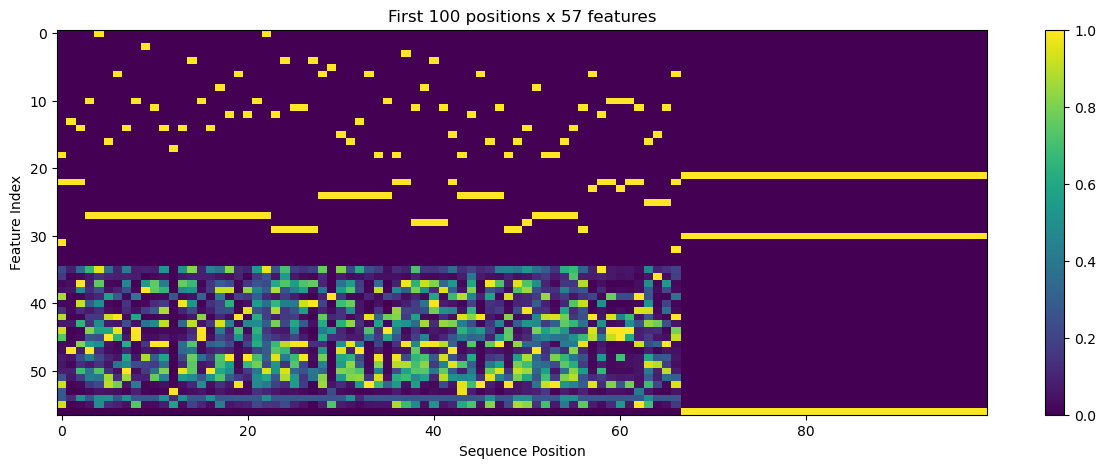


one_hot features statistics:
Shape: (700, 21)
Non-zero elements: 67
Unique values: 2

pssm features statistics:
Shape: (700, 21)
Non-zero elements: 1804
Unique values: 347

structure features statistics:
Shape: (700, 8)
Non-zero elements: 536
Unique values: 413

other features statistics:
Shape: (700, 7)
Non-zero elements: 1035
Unique values: 279


In [2]:

## Some very basic initial scripts.

import numpy as np

npy_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"

# Load the NPY file with allow_pickle=True
npy_data = np.load(npy_path, allow_pickle=True)

# Check the type, shape, and dtype
print("NPY Data Type:", type(npy_data))
print("NPY Data Shape:", npy_data.shape)
print("NPY Data Dtype:", npy_data.dtype)

# Inspect multiple samples to see if they contain meaningful data ??
for i in range(10):  # Check first 10 samples
    print(f"Sample {i}: {npy_data[i][:10]}")  # Print first 10 features of each sample


## ------------------------------------------------------------------------------------
print("\n\n")


## Quick to print the keys and key.shape. dict contents. 
## But its not a dict! its a standard np array. so no worries/need. 
if npy_data.dtype == 'object':
    try:
        data_dict = npy_data.item()
        print("Keys in NPY dictionary:", data_dict.keys())
        for key in data_dict:
            print(f"{key}: {data_dict[key].shape}")
    except Exception as e:
        print(f"Error accessing dictionary contents: {e}")
else:
    print("NPY data is a standard NumPy array.")


## ------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("\n\n")

import numpy as np

npy_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
npy_data = np.load(npy_path, allow_pickle=True)

print("NPY Data Type:", type(npy_data))
print("NPY Data Shape:", npy_data.shape)
print("Sample Data:", npy_data[0][:])  #  first sample


## ------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("\n\nAnalysis on the NPY Data")

import numpy as np
import matplotlib.pyplot as plt

def analyze_npy_data(npy_path):

    data = np.load(npy_path)
    print(f"Data shape: {data.shape}")
    
    # Analyze one sample
    sample = data[0]
    
    # Reshape to (700, 57) to see features per position
    sample_reshaped = sample.reshape(700, 57)
    print(f"\nReshaped sample shape: {sample_reshaped.shape}")
    
    # Analyze value distribution
    print("\nValue statistics:")
    print(f"Min value: {sample.min()}")
    print(f"Max value: {sample.max()}")
    print(f"Mean value: {sample.mean():.4f}")
    print(f"Unique values: {len(np.unique(sample))}")
    
    # Visualize feature patterns
    plt.figure(figsize=(15, 5))
    plt.imshow(sample_reshaped[:100, :].T, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title('First 100 positions x 57 features')
    plt.xlabel('Sequence Position')
    plt.ylabel('Feature Index')
    plt.show()
    
    # Check for clear feature groupings
    feature_groups = {
        'one_hot': sample_reshaped[:, :21], 'pssm': sample_reshaped[:, 21:42],
        'structure': sample_reshaped[:, 42:50], 'other': sample_reshaped[:, 50:] }
    
    for name, group in feature_groups.items():
        print(f"\n{name} features statistics:")
        print(f"Shape: {group.shape}")
        print(f"Non-zero elements: {np.count_nonzero(group)}")
        print(f"Unique values: {len(np.unique(group))}")



npy_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
analyze_npy_data(npy_path)



## Important Plot Analysis From Above:

    The bright yellow spots in upper region (0-21) show one-hot encoding
    The more varied colors in middle region show PSSM scores
    The patterns in lower region show structure and property features
    X-axis shows first 100 positions of the sequence

## Plot - Data study analysis of below cells.

    **One-hot Encoding (First Plot, Top) ; Amino acid sequence of the protein. Each row is one amino acid (A-Y plus padding). 
    Red dots (value 1) indicate which amino acid is present at each position
    From the statistics: only 67 non-zero values because it's a sequence of 67 amino acids
    Everything after position ~67 is padding (empty/zero) to reach the fixed length of 700


    **PSSM Scores (Second Plot) ; Position Specific Scoring Matrix - shows evolutionary conservation
    Red areas indicate high probability (1.0) of specific amino acids
    Blue areas indicate low probability (0.0)
    Higher values (redder) suggest that position is evolutionarily conserved
    More unique values (347) and non-zero elements (1804) indicate rich evolutionary information
    The varied colors in R, S, T, V, W, Y rows show these positions have diverse evolutionary preferences

    **Structure Features (Third Plot) -- 8 rows representing different structural states
    Yellow/green areas indicate high probability of that structural element
    Purple areas indicate low probability
    The pattern shows alternating structural elements, typical of protein folding
    Non-zero count of 536 suggests multiple structural elements are possible at each position
    
    **Structure Feature Correlations -- Shows how different structural features relate to each other
    Strong correlations (red, >0.8):
        Features 0,2,3 are highly correlated (0.86-0.9) - likely related structural states
        Features 1,6,7 show strong correlation (0.82-0.89) - another related group    
    This suggests the 8 structure features might be grouped into 2-3 main structural types


    **Amino Acid Distribution  - Shows frequency of each amino acid in this protein
    N (Asparagine) is most frequent with 9 occurrences
    M (Methionine) and H (Histidine) also common
    D, E, G, V are least common
    This distribution can indicate protein properties/function


    **Additional Properties -- 7 rows showing physico-chemical properties
    Properties might include:
        Hydrophobicity, Charge, Size, Secondary structure propensity
    The clear yellow band at bottom suggests a binary property
    More varied patterns in other rows suggest continuous properties


## Further understandings; about Theory, and Correlations:

```
α-Helix (H): Spiral-like structure
    Looks like a coiled spring, Very stable due to hydrogen bonding. Common in proteins that span membranes. Example: Hemoglobin's helical regions

β-Sheet (E): Flat, sheet-like structure
    Looks like a pleated sheet, Can be parallel or anti-parallel. Often found in protein cores. Example: Silk protein's strong sheets

Coil/Loop (C): Flexible connecting regions
    Less regular structure, Often on protein surface, Important for flexibility. Example: Loop regions in enzymes

Additional Structural Features:
    
    Turns: Sharp bends in the chain
    Bridges: Short β-sheet segments
    Bends: Gentle curves
    310-Helix: Tighter than α-helix
    π-Helix: Wider than α-helix


Structure Feature Correlations (8 features, 0-7):

    - High correlation (0.9) between features 0,2,3 might represent:
        Different aspects of helical structures
        Or related structural transitions
    - Features 1,6,7 correlation (0.82-0.89) might indicate:
        Sheet-related properties
        Or coil-related features
    - Lower correlations (0.2-0.4) suggest independent structural elements.


```

## [ The below cells will have more powerful analysis, confirming updates and corrections later on, in analysis. ]

--- 


## Items followed up; Feature Distrubutions, Feature Group Visualization, Sequence Coverage, Amino Acid Frequencies, Distributions, Structure Patterns, Detailed Stats.

### All these stats and rounds of exploratory - info is being critically **used** later on, in the Model Config Parameters! 

C:\Users\joems\AppData\Local\Temp\ipykernel_16088\353406364.py:10: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  self.data = np.load(npy_path)


Analyzing first protein sequence...
=== Detailed Feature Group Statistics ===


ONE_HOT Features:
min: 0.0000
max: 1.0000
mean: 0.0046
std: 0.0674
unique_values: 2
non_zero: 67

PSSM Features:
min: 0.0000
max: 1.0000
mean: 0.0992
std: 0.2930
unique_values: 347
non_zero: 1804

STRUCTURE Features:
min: 0.0000
max: 0.9998
mean: 0.0332
std: 0.1450
unique_values: 413
non_zero: 536

PROPERTIES Features:
min: 0.0000
max: 1.0000
mean: 0.1549
std: 0.3469
unique_values: 279
non_zero: 1035


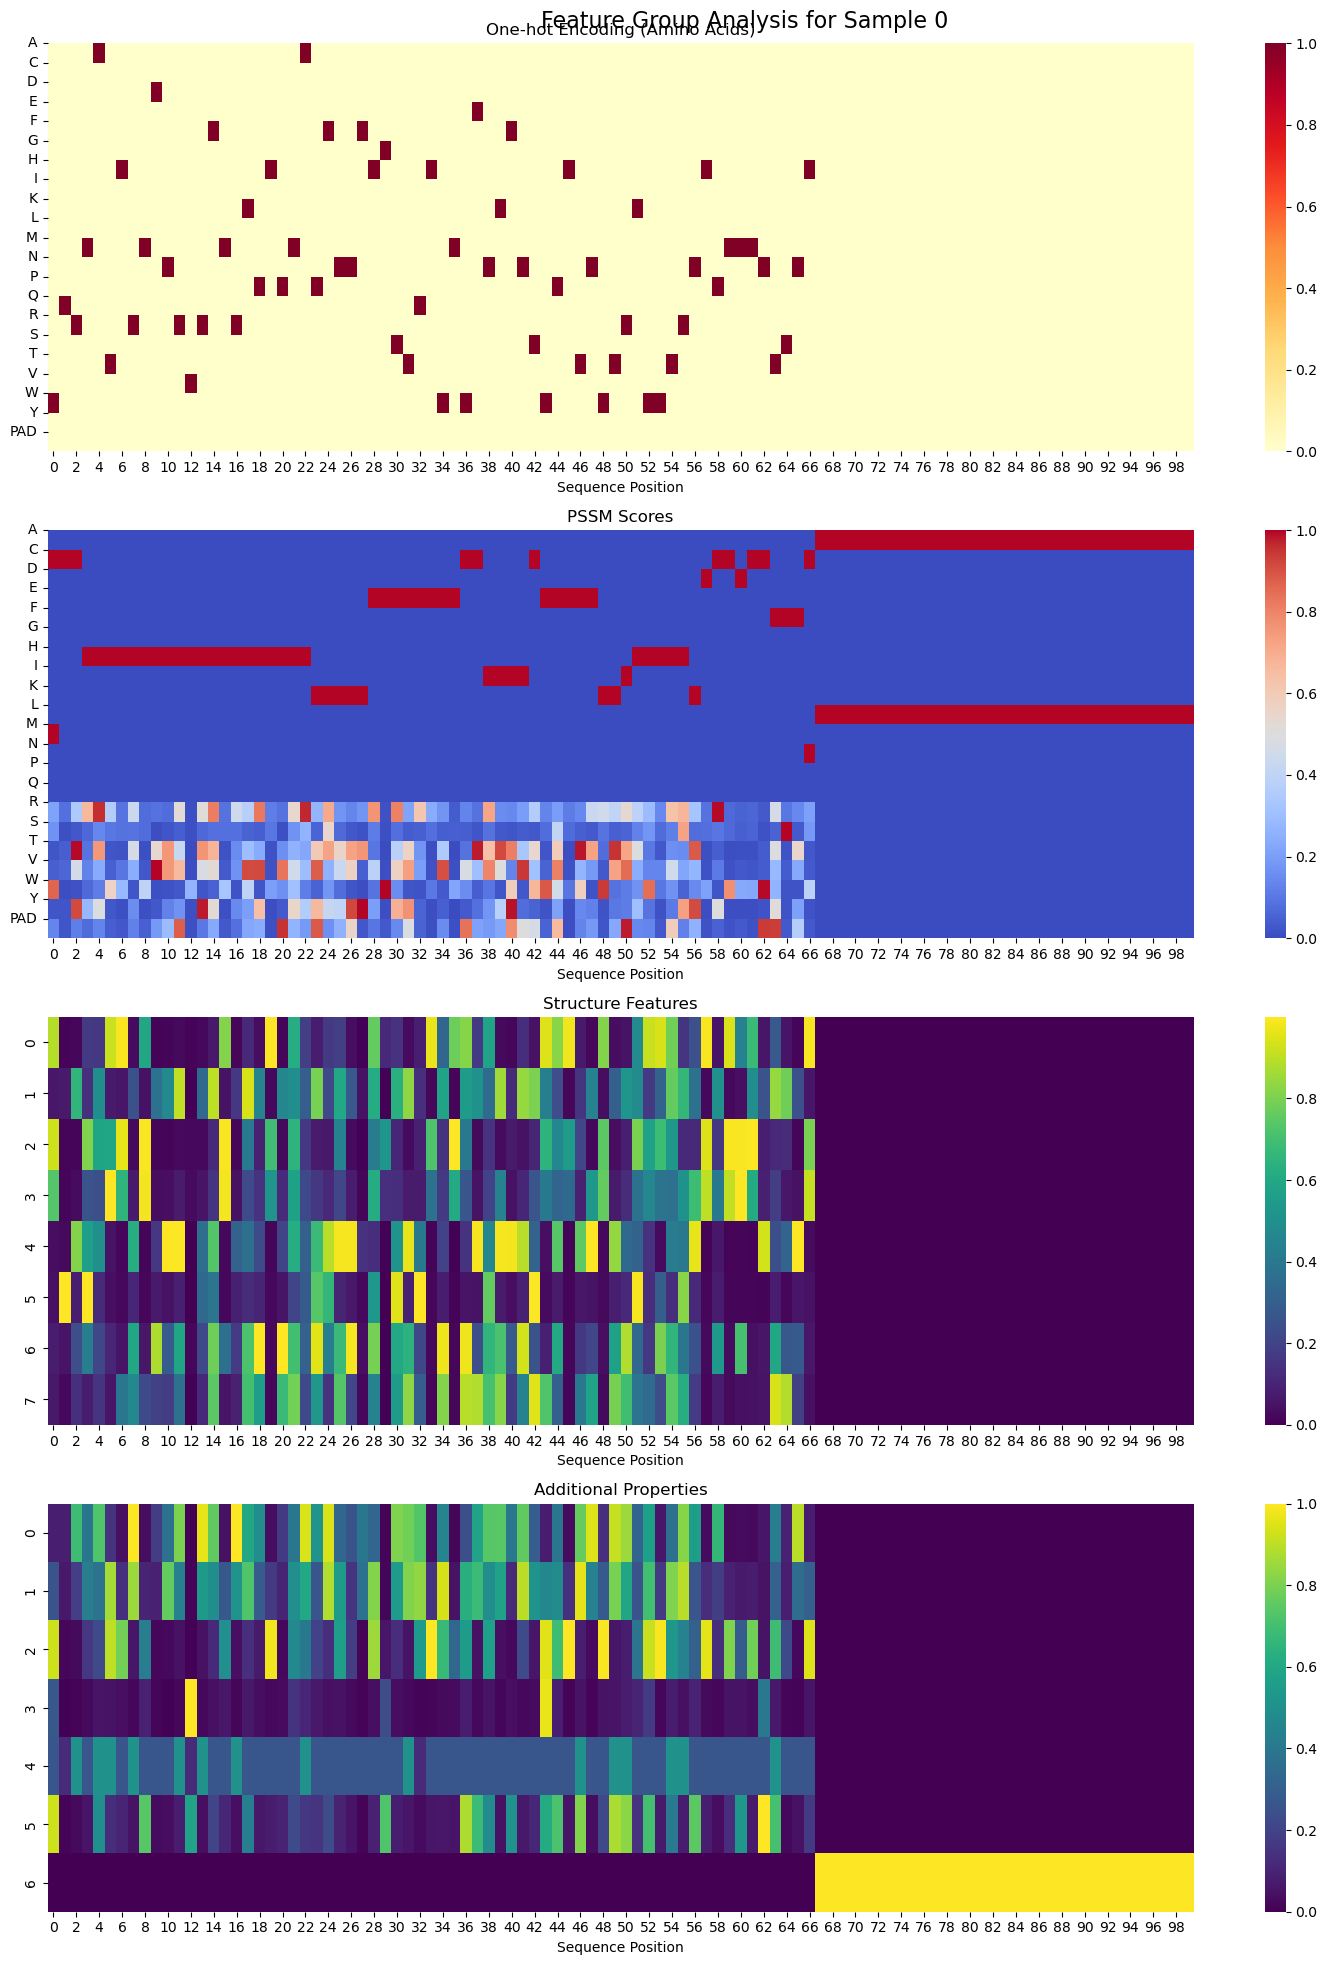

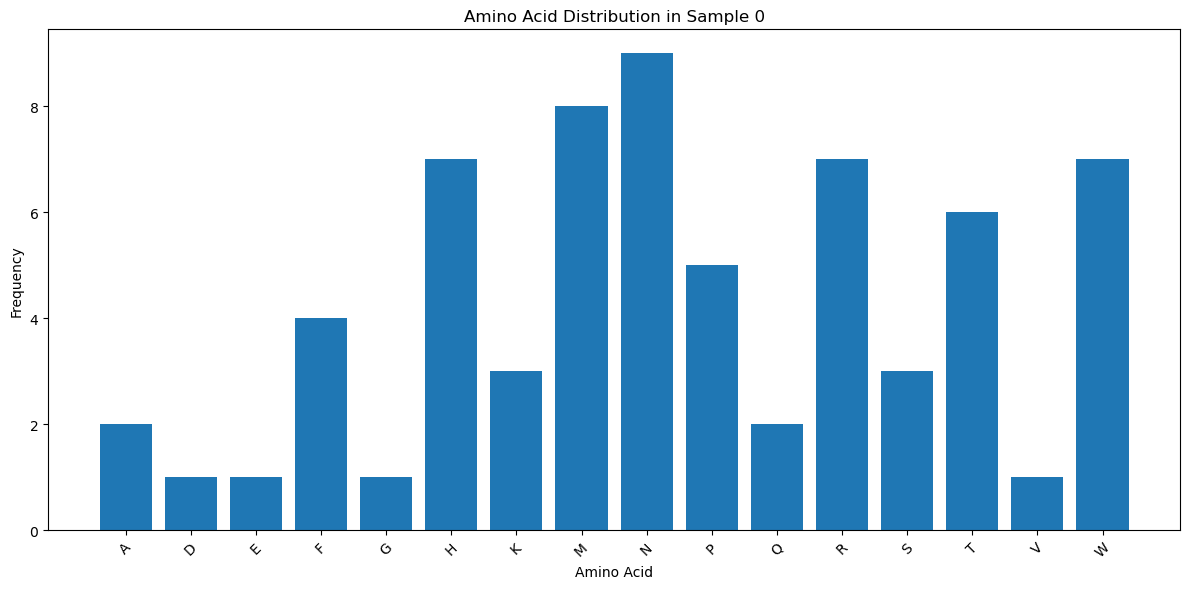

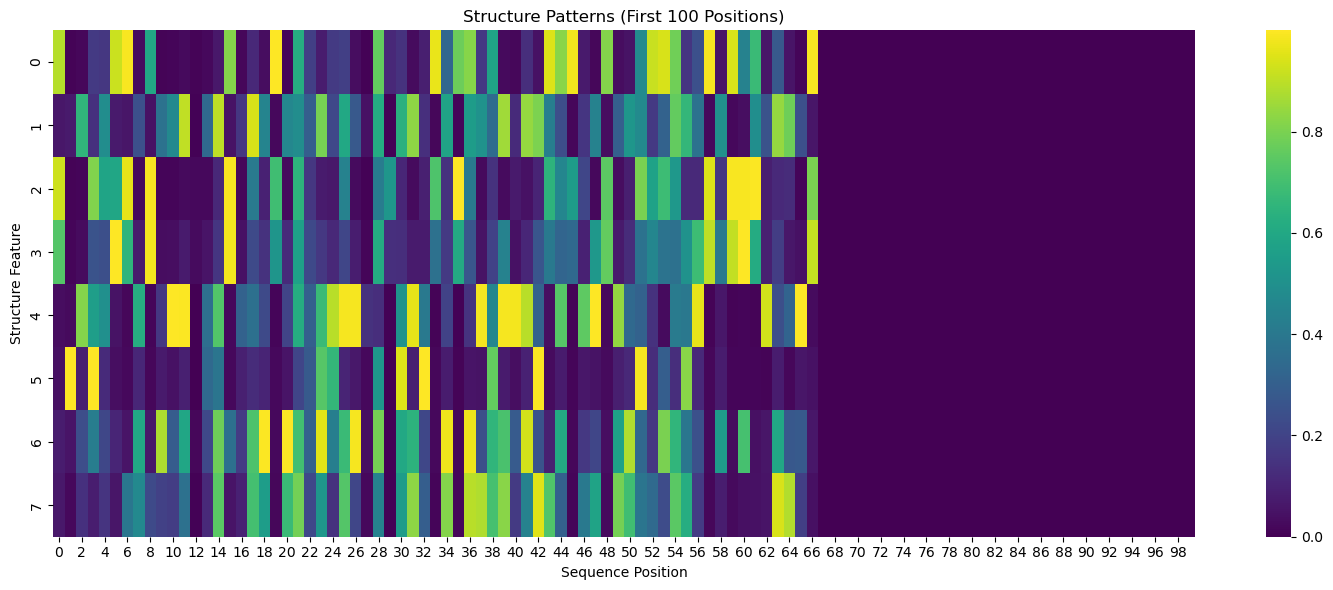

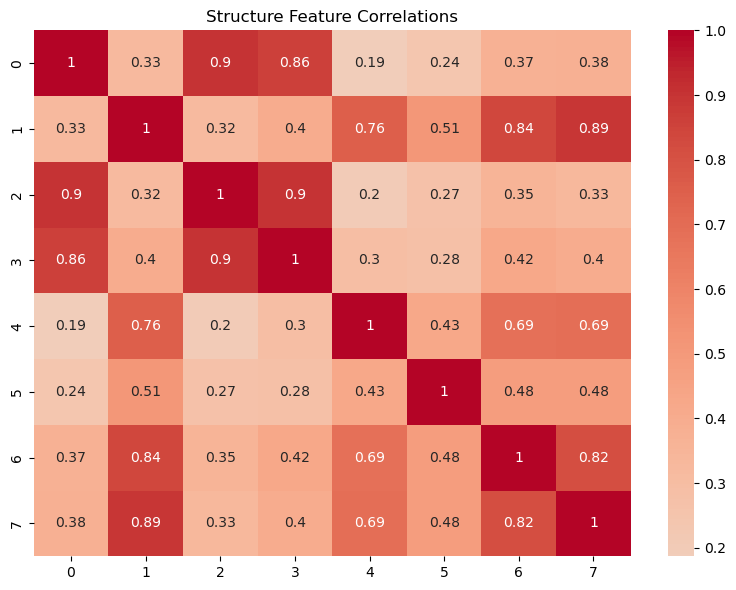


Mean sequence length: 164.91
Length range: 20 to 700


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Tuple, List
import pandas as pd

class ProteinDataAnalyzer:
    def __init__(self, npy_path: str):
        """Initialize the analyzer with the path to NPY file."""
        self.data = np.load(npy_path)
        self.amino_acids = list("ACDEFGHIKLMNPQRSTVWY") + ["PAD"]
        self.n_samples = self.data.shape[0]
        
    def reshape_sample(self, sample_idx: int) -> np.ndarray:
        """Reshape a single sample to (700, 57) format."""
        return self.data[sample_idx].reshape(700, 57)
    
    def analyze_feature_distributions(self, sample_idx: int = 0) -> Dict[str, Dict]:
        """Analyze distributions of different feature groups."""
        sample = self.reshape_sample(sample_idx)
        
        feature_groups = {
            'one_hot': (0, 21),
            'pssm': (21, 42),
            'structure': (42, 50),
            'properties': (50, 57)
        }
        
        stats = {}
        for name, (start, end) in feature_groups.items():
            group_data = sample[:, start:end]
            stats[name] = {
                'min': group_data.min(),
                'max': group_data.max(),
                'mean': group_data.mean(),
                'std': group_data.std(),
                'unique_values': len(np.unique(group_data)),
                'non_zero': np.count_nonzero(group_data)
            }
        
        return stats
    
    def visualize_feature_groups(self, sample_idx: int = 0, positions: int = 100):
        """Create visualizations for different feature groups."""
        sample = self.reshape_sample(sample_idx)
        
        fig, axes = plt.subplots(4, 1, figsize=(15, 20))
        fig.suptitle(f'Feature Group Analysis for Sample {sample_idx}', fontsize=16)
        
        # One-hot encoding visualization
        sns.heatmap(sample[:positions, :21].T, ax=axes[0], cmap='YlOrRd')
        axes[0].set_title('One-hot Encoding (Amino Acids)')
        axes[0].set_yticks(range(21))
        axes[0].set_yticklabels(self.amino_acids)
        
        # PSSM scores visualization
        sns.heatmap(sample[:positions, 21:42].T, ax=axes[1], cmap='coolwarm')
        axes[1].set_title('PSSM Scores')
        axes[1].set_yticks(range(21))
        axes[1].set_yticklabels(self.amino_acids)
        
        # Structure features visualization
        sns.heatmap(sample[:positions, 42:50].T, ax=axes[2], cmap='viridis')
        axes[2].set_title('Structure Features')
        
        # Other properties visualization
        sns.heatmap(sample[:positions, 50:].T, ax=axes[3], cmap='viridis')
        axes[3].set_title('Additional Properties')
        
        for ax in axes:
            ax.set_xlabel('Sequence Position')
        
        plt.tight_layout()
        plt.show()
    
    def analyze_sequence_coverage(self) -> Tuple[float, List[int]]:
        """Analyze the actual sequence lengths vs padding."""
        sequence_lengths = []
        
        for i in range(self.n_samples):
            sample = self.reshape_sample(i)
            # Find the last non-zero position in one-hot encoding
            non_zero_positions = np.any(sample[:, :21] != 0, axis=1)
            length = np.sum(non_zero_positions)
            sequence_lengths.append(length)
        
        return np.mean(sequence_lengths), sequence_lengths
    
    def analyze_amino_acid_frequencies(self, sample_idx: int = 0) -> Dict[str, int]:
        """Analyze frequency of each amino acid in a sample."""
        sample = self.reshape_sample(sample_idx)
        one_hot = sample[:, :21]
        
        frequencies = {}
        for i, aa in enumerate(self.amino_acids):
            freq = np.sum(one_hot[:, i])
            if freq > 0:  # Only include amino acids that appear
                frequencies[aa] = int(freq)
        
        return frequencies
    
    def visualize_amino_acid_distribution(self, sample_idx: int = 0):
        """Visualize the distribution of amino acids in a sample."""
        frequencies = self.analyze_amino_acid_frequencies(sample_idx)
        
        plt.figure(figsize=(12, 6))
        plt.bar(frequencies.keys(), frequencies.values())
        plt.title(f'Amino Acid Distribution in Sample {sample_idx}')
        plt.xlabel('Amino Acid')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def analyze_structure_patterns(self, sample_idx: int = 0):
        """Analyze and visualize structure patterns."""
        sample = self.reshape_sample(sample_idx)
        structure_features = sample[:, 42:50]
        
        plt.figure(figsize=(15, 6))
        sns.heatmap(structure_features[:100].T, cmap='viridis')
        plt.title('Structure Patterns (First 100 Positions)')
        plt.xlabel('Sequence Position')
        plt.ylabel('Structure Feature')
        plt.tight_layout()
        plt.show()
        
        # Calculate structure feature correlations
        corr = np.corrcoef(structure_features.T)
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Structure Feature Correlations')
        plt.tight_layout()
        plt.show()

    def print_detailed_stats(self, sample_idx: int = 0):
        """Print detailed statistics for a sample."""
        stats = self.analyze_feature_distributions(sample_idx)
        
        print("=== Detailed Feature Group Statistics ===\n")
        for group, group_stats in stats.items():
            print(f"\n{group.upper()} Features:")
            for stat_name, value in group_stats.items():
                print(f"{stat_name}: {value:.4f}" if isinstance(value, float) else f"{stat_name}: {value}")

# Usage example:
if __name__ == "__main__":
    
    npy_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    analyzer = ProteinDataAnalyzer(npy_path)
    
    # Run complete analysis for first sample
    print("Analyzing first protein sequence...")
    analyzer.print_detailed_stats(0)
    
    # Visualize feature groups
    analyzer.visualize_feature_groups(0)
    
    # Analyze amino acid distribution
    analyzer.visualize_amino_acid_distribution(0)
    
    # Analyze structure patterns
    analyzer.analyze_structure_patterns(0)
    
    # Get sequence length statistics
    mean_length, lengths = analyzer.analyze_sequence_coverage()
    print(f"\nMean sequence length: {mean_length:.2f}")
    print(f"Length range: {min(lengths)} to {max(lengths)}")

## Protein Component Analysis - 
## 3 to 8 relationships, structure state transitions, disorder-structure relations, segment lengths, stats.

C:\Users\joems\AppData\Local\Temp\ipykernel_16088\3755866895.py:12: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  self.npy_data = np.load(npy_path)
C:\Users\joems\AppData\Local\Temp\ipykernel_16088\3755866895.py:62: RuntimeWarning: invalid value encountered in divide
  transition_matrix = transition_matrix / row_sums[:, np.newaxis]


Analyzing structure relationships...

DSSP8 to DSSP3 mapping frequencies:
      C     T     G     S    B     H    E
C  29.0  35.0   NaN  10.0  NaN   NaN  NaN
H   NaN   NaN  12.0   NaN  NaN  91.0  NaN
E   NaN   NaN   NaN   NaN  4.0   NaN  4.0

Analyzing disorder-structure correlation...
           mean  std
structure           
B           1.0  0.0
C           1.0  0.0
E           1.0  0.0
G           1.0  0.0
H           1.0  0.0
S           1.0  0.0
T           1.0  0.0


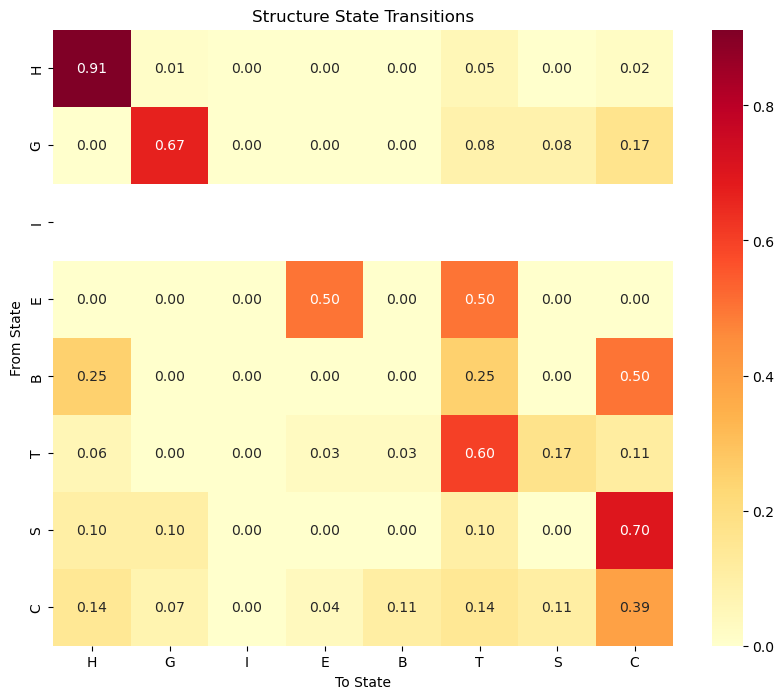

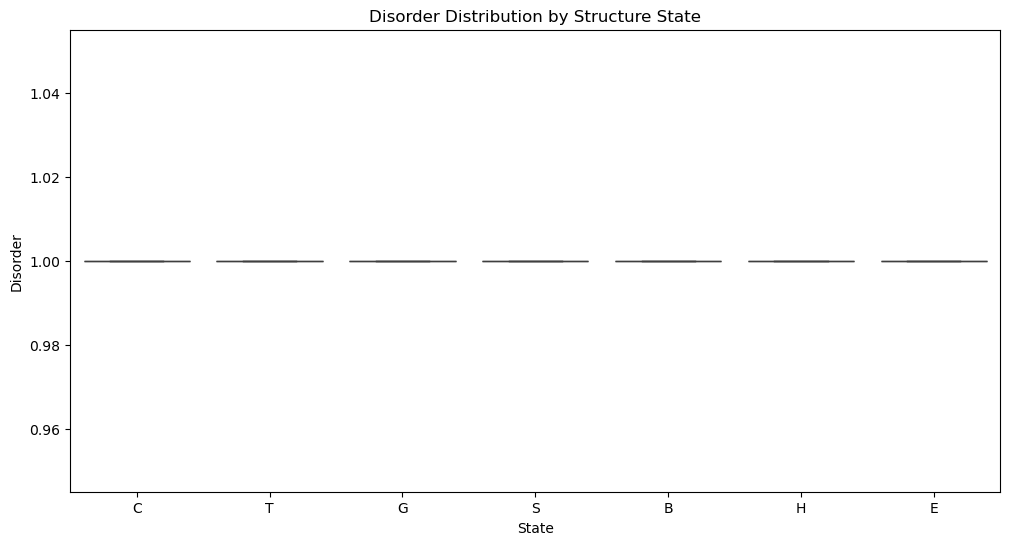


Structure segment length statistics:
H: mean length = 11.38
G: mean length = 3.00
E: mean length = 2.00
B: mean length = 1.00
T: mean length = 2.50
S: mean length = 1.00
C: mean length = 1.61


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple



class ProteinComponentAnalyzer:
    def __init__(self, npy_path: str, csv_path: str):

        self.npy_data = np.load(npy_path)
        self.csv_data = pd.read_csv(csv_path)
        self.dssp8_states = ['H', 'G', 'I', 'E', 'B', 'T', 'S', 'C']
        self.dssp3_states = ['H', 'E', 'C']
        
    def analyze_structure_relationships(self, sequence_idx: int = 0) -> Dict:

        dssp3 = self.csv_data.iloc[sequence_idx]['dssp3']
        dssp8 = self.csv_data.iloc[sequence_idx]['dssp8']
        
        # Create mapping dictionary
        mapping = {}
        for d8, d3 in zip(dssp8, dssp3):
            if d8 not in mapping:
                mapping[d8] = {}
            if d3 not in mapping[d8]:
                mapping[d8][d3] = 0
            mapping[d8][d3] += 1
            
        return mapping

    
    def analyze_disorder_structure_correlation(self, sequence_idx: int = 0) -> pd.DataFrame:
        """Analyze correlation between disorder and structure states."""
        disorder = [float(x) for x in self.csv_data.iloc[sequence_idx]['disorder'].split()]
        dssp8 = list(self.csv_data.iloc[sequence_idx]['dssp8'])
        
        # Create DataFrame for analysis
        df = pd.DataFrame({
            'disorder': disorder[:len(dssp8)],
            'structure': dssp8
        })
        
        # Calculate average disorder for each structure state
        disorder_by_structure = df.groupby('structure')['disorder'].agg(['mean', 'std'])
        return disorder_by_structure
    
    def visualize_state_transitions(self, sequence_idx: int = 0):
        """Visualize transitions between structure states."""
        dssp8 = self.csv_data.iloc[sequence_idx]['dssp8']
        
        # Create transition matrix
        transition_matrix = np.zeros((8, 8))
        for i in range(len(dssp8) - 1):
            curr_state = self.dssp8_states.index(dssp8[i])
            next_state = self.dssp8_states.index(dssp8[i + 1])
            transition_matrix[curr_state][next_state] += 1
            
        # Normalize
        row_sums = transition_matrix.sum(axis=1)
        transition_matrix = transition_matrix / row_sums[:, np.newaxis]
        
        # Visualize
        plt.figure(figsize=(10, 8))
        sns.heatmap(transition_matrix, 
                   xticklabels=self.dssp8_states,
                   yticklabels=self.dssp8_states,
                   annot=True, fmt='.2f', cmap='YlOrRd')
        plt.title('Structure State Transitions')
        plt.xlabel('To State')
        plt.ylabel('From State')
        plt.show()
        
    def analyze_structure_segments(self, sequence_idx: int = 0) -> Dict[str, List[int]]:
        """Analyze lengths of continuous structure segments."""
        dssp8 = self.csv_data.iloc[sequence_idx]['dssp8']
        
        segment_lengths = {state: [] for state in self.dssp8_states}
        current_state = dssp8[0]
        current_length = 1
        
        for state in dssp8[1:]:
            if state == current_state:
                current_length += 1
            else:
                segment_lengths[current_state].append(current_length)
                current_state = state
                current_length = 1
        
        segment_lengths[current_state].append(current_length)
        return segment_lengths
    
    def visualize_disorder_distribution(self, sequence_idx: int = 0):
        """Visualize disorder distribution for different structure states."""
        disorder = [float(x) for x in self.csv_data.iloc[sequence_idx]['disorder'].split()]
        dssp8 = list(self.csv_data.iloc[sequence_idx]['dssp8'])
        
        data = []
        for state, d in zip(dssp8, disorder[:len(dssp8)]):
            data.append({'State': state, 'Disorder': d})
        
        df = pd.DataFrame(data)
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='State', y='Disorder', data=df)
        plt.title('Disorder Distribution by Structure State')
        plt.show()
    
    def analyze_full_dataset(self):
        """Perform analysis on the entire dataset."""
        # Structure state distribution
        all_dssp8 = ''.join(self.csv_data['dssp8'])
        state_counts = {state: all_dssp8.count(state) for state in self.dssp8_states}
        
        plt.figure(figsize=(10, 6))
        plt.bar(state_counts.keys(), state_counts.values())
        plt.title('Distribution of Structure States in Dataset')
        plt.xlabel('Structure State')
        plt.ylabel('Count')
        plt.show()
        
        # Calculate global statistics
        total_residues = len(all_dssp8)
        print("\nStructure State Distribution:")
        for state, count in state_counts.items():
            percentage = (count / total_residues) * 100
            print(f"{state}: {percentage:.2f}%")




if __name__ == "__main__":

    
    csv_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.csv"
    npy_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"

    analyzer = ProteinComponentAnalyzer(npy_path, csv_path)
    
    # Analyze first sequence
    print("Analyzing structure relationships...")
    mapping = analyzer.analyze_structure_relationships(0)
    print("\nDSSP8 to DSSP3 mapping frequencies:")
    print(pd.DataFrame(mapping))
    
    print("\nAnalyzing disorder-structure correlation...")
    disorder_stats = analyzer.analyze_disorder_structure_correlation(0)
    print(disorder_stats)
    
    # Visualize transitions and distributions
    analyzer.visualize_state_transitions(0)
    analyzer.visualize_disorder_distribution(0)
    
    # Analyze segment lengths
    segments = analyzer.analyze_structure_segments(0)
    print("\nStructure segment length statistics:")
    for state, lengths in segments.items():
        if lengths:
            print(f"{state}: mean length = {np.mean(lengths):.2f}")

## Some More Anlaysis - Purely ON NPY now. 
## Transitions related coding. 

C:\Users\joems\AppData\Local\Temp\ipykernel_16088\3268872198.py:9: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  self.data = np.load(npy_path)



=== Comprehensive Analysis of Sample 0 ===

Sequence length: 67

ONE_HOT Features:
min: 0.0
max: 1.0
mean: 0.047619047619047616
std: 0.21295885499998
unique_values: 2
non_zero: 67
shape: (67, 21)

PSSM Features:
min: 0.0
max: 1.0
mean: 0.13655654865297348
std: 0.28543207175200425
unique_values: 347
non_zero: 538
shape: (67, 21)

SS8 Features:
min: 0.0024480803753001894
max: 0.999800600342789
mean: 0.34671517218758385
std: 0.3331780416371752
unique_values: 412
non_zero: 536
shape: (67, 8)

PROPERTIES Features:
min: 0.0
max: 0.9999964903825311
mean: 0.26840773258550965
std: 0.2938215825587556
unique_values: 278
non_zero: 402
shape: (67, 7)

Structure State Distribution:
State 0: 12 (17.9%)
State 1: 2 (3.0%)
State 2: 8 (11.9%)
State 3: 3 (4.5%)
State 4: 19 (28.4%)
State 5: 8 (11.9%)
State 6: 12 (17.9%)
State 7: 3 (4.5%)


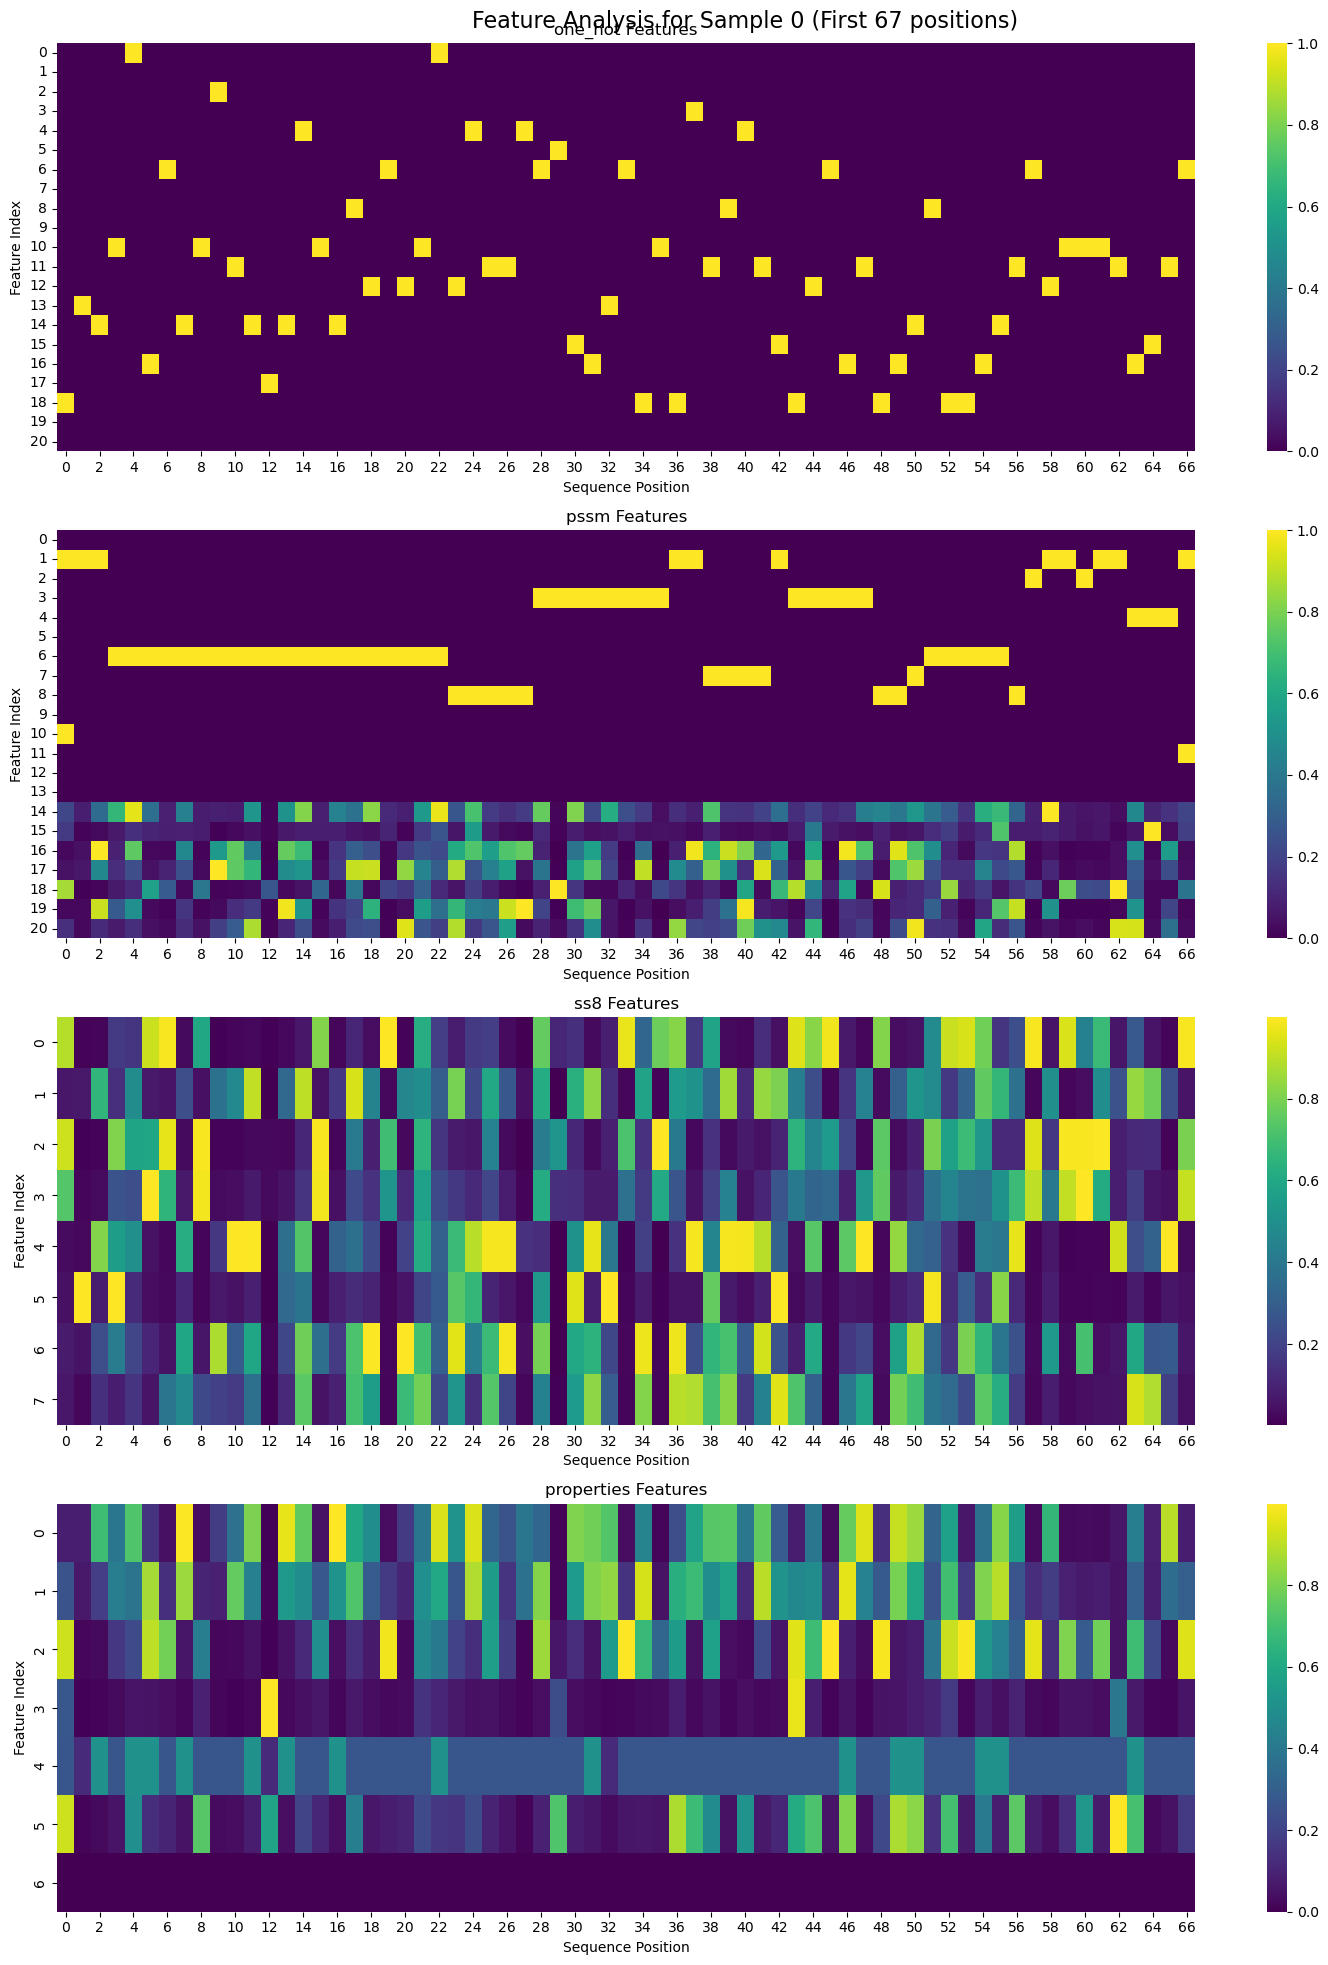

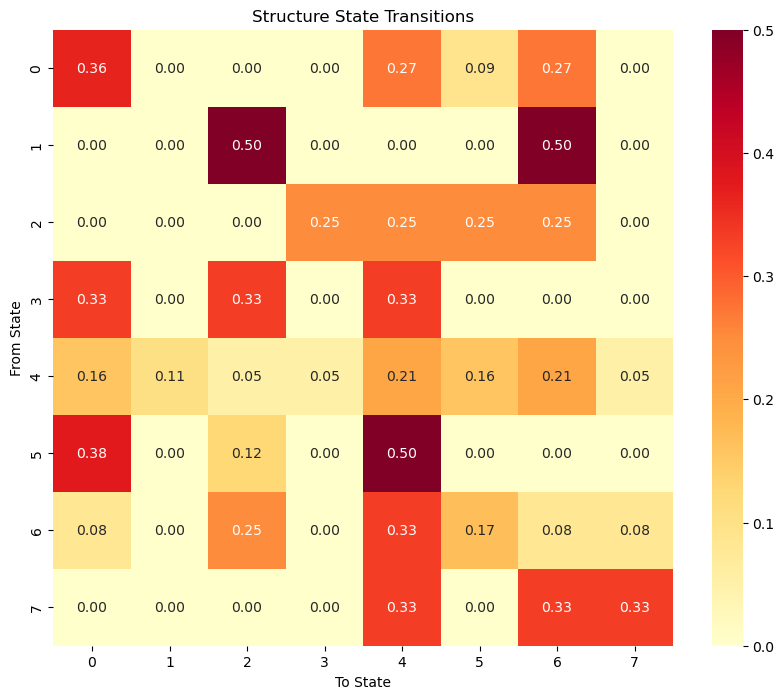

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Tuple, List

class ProteinNPYAnalyzer:
    def __init__(self, npy_path: str):
        """Initialize with NPY data file."""
        self.data = np.load(npy_path)
        self.n_samples = self.data.shape[0]
        
        # Feature indices for 700 positions, each with 57 features -- Same. its repeated before/above. 
        self.feature_indices = {
            'one_hot': (0, 21),    # One-hot encoding of amino acids
            'pssm': (21, 42),      # Position-specific scoring matrix
            'ss8': (42, 50),       # 8-state secondary structure
            'properties': (50, 57)  # Additional properties
        }
    
    def reshape_sample(self, sample_idx: int) -> np.ndarray:
        """Reshape a sample to (700, 57) format."""
        return self.data[sample_idx].reshape(700, 57)

        
    def get_sequence_length(self, sample_idx: int) -> int:
        """Get actual sequence length by finding last non-zero position."""
        sample = self.reshape_sample(sample_idx)
        one_hot = sample[:, :21]  # One-hot encoding section
        return np.where(one_hot.sum(axis=1) > 0)[0][-1] + 1

    
    def analyze_feature_group(self, sample_idx: int, group: str) -> Dict:
        """Analyze statistics for a specific feature group."""
        sample = self.reshape_sample(sample_idx)
        start, end = self.feature_indices[group]
        features = sample[:, start:end]
        
        seq_length = self.get_sequence_length(sample_idx)
        active_features = features[:seq_length]
        
        return { 'min': float(active_features.min()), 'max': float(active_features.max()), 'mean': float(active_features.mean()), 'std': float(active_features.std()),
            'unique_values': len(np.unique(active_features)), 'non_zero': int(np.count_nonzero(active_features)), 'shape': active_features.shape }

        
    def visualize_feature_map(self, sample_idx: int, positions: int = 100):
        """Create heatmap visualization of all features for first n positions."""
        sample = self.reshape_sample(sample_idx)
        seq_length = min(self.get_sequence_length(sample_idx), positions)
        
        fig, axes = plt.subplots(4, 1, figsize=(15, 20))
        fig.suptitle(f'Feature Analysis for Sample {sample_idx} (First {seq_length} positions)', fontsize=16)
        
        # Plot each feature group
        for idx, (name, (start, end)) in enumerate(self.feature_indices.items()):
            features = sample[:seq_length, start:end]
            sns.heatmap(features.T, ax=axes[idx], cmap='viridis')
            axes[idx].set_title(f'{name} Features')
            axes[idx].set_xlabel('Sequence Position')
            axes[idx].set_ylabel('Feature Index')
        
        plt.tight_layout()
        plt.show()
    
    def analyze_structure_transitions(self, sample_idx: int) -> np.ndarray:
        """Analyze transitions between structure states."""
        sample = self.reshape_sample(sample_idx)
        seq_length = self.get_sequence_length(sample_idx)
        structure_probs = sample[:seq_length, 42:50]  # 8-state structure probabilities
        
        # Get most likely state at each position
        structure_states = np.argmax(structure_probs, axis=1)
        
        # Create transition matrix
        transition_matrix = np.zeros((8, 8))
        for i in range(len(structure_states) - 1):
            current_state = structure_states[i]
            next_state = structure_states[i + 1]
            transition_matrix[current_state, next_state] += 1
        
        # Normalize
        row_sums = transition_matrix.sum(axis=1)
        transition_matrix = np.divide(transition_matrix, row_sums[:, np.newaxis], where=row_sums[:, np.newaxis] != 0)
        
        return transition_matrix
    
    def visualize_transitions(self, sample_idx: int):
        """Visualize structure state transitions."""
        transitions = self.analyze_structure_transitions(sample_idx)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(transitions, annot=True, fmt='.2f', cmap='YlOrRd',
                   xticklabels=range(8), yticklabels=range(8))
        plt.title('Structure State Transitions')
        plt.xlabel('To State')
        plt.ylabel('From State')
        plt.show()
    
    def analyze_position_specific_patterns(self, sample_idx: int, window_size: int = 5):
        """Analyze patterns in position-specific scoring matrix."""
        sample = self.reshape_sample(sample_idx)
        seq_length = self.get_sequence_length(sample_idx)
        pssm = sample[:seq_length, 21:42]  # PSSM scores
        
        # Calculate average PSSM profile
        avg_profile = np.mean(pssm, axis=0)
        
        # Calculate position-wise conservation
        conservation = np.sum(pssm ** 2, axis=1)
        
        return avg_profile, conservation
    
    def print_comprehensive_analysis(self, sample_idx: int):
        """Print comprehensive analysis of a sample."""
        print(f"\n=== Comprehensive Analysis of Sample {sample_idx} ===")
        
        # Sequence length
        seq_length = self.get_sequence_length(sample_idx)
        print(f"\nSequence length: {seq_length}")
        
        # Feature group statistics
        for group in self.feature_indices.keys():
            stats = self.analyze_feature_group(sample_idx, group)
            print(f"\n{group.upper()} Features:")
            for key, value in stats.items():
                print(f"{key}: {value}")
        
        # Structure state analysis
        sample = self.reshape_sample(sample_idx)
        structure_probs = sample[:seq_length, 42:50]
        dominant_states = np.argmax(structure_probs, axis=1)
        state_counts = np.bincount(dominant_states, minlength=8)
        
        print("\nStructure State Distribution:")
        for state, count in enumerate(state_counts):
            percentage = (count / len(dominant_states)) * 100
            print(f"State {state}: {count} ({percentage:.1f}%)")

if __name__ == "__main__":

    npy_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    analyzer = ProteinNPYAnalyzer(npy_path)
    
    # Analyze first sample
    analyzer.print_comprehensive_analysis(0)
    
    # Visualize features
    analyzer.visualize_feature_map(0)
    
    # Visualize transitions
    analyzer.visualize_transitions(0)


### Critical Understanding About Data:

    **8 DSSP States (Structure Features 0-7):
        H (0) - Alpha helix
        G (1) - 3-10 helix
        I (2) - Pi helix (5-helix)
        E (3) - Extended strand (beta sheet)
        B (4) - Isolated beta-bridge
        T (5) - Turn
        S (6) - Bend
        C (7) - Coil (unstructured)

        ** high correlation suggests that in our dataset, positions likely to be 3-10 helices are also likely to be classified as coils.
        well? 
        ** makes biological sense because:
            3-10 helices are often short and less stable than alpha helices, can transition to coil states more easily. boundary between 3-10 helix and coil can be ambiguous.


    **DSSP3 (3-State Classification) : Simplified version of the 8-state DSSP
        Three main states:
        H: Helix (combines H, G, I from DSSP8)
        E: Sheet/Strand (combines E, B from DSSP8)
        C: Coil (combines T, S, C from DSSP8)

    This is often used because:
        More balanced class distribution, Clearer structural boundaries, Easier to predict accurately, Most applications need only these main states.


    **Disorder --  Represents protein disorder predictions
    Values between 0 and 1 where:
        1.0: Highly disordered region
        0.0: Well-structured region
        Why it matters:
        Disordered regions lack fixed 3D structure. They can be functionally important. Affects protein function and interactions. Important for protein-protein interactions.


    **CB513 Mask  -- Binary mask (0 or 1) for each position
        Purpose:
        Indicates valid sequence positions (1). Shows padding positions (0). Helps during training to ignore padded regions. Used for accurate loss calculation    
        Important because proteins have different lengths but need fixed-length input for ML models

    **SAMPLE** --> 
    {
        'input':     'RTDCYGNVNR...',         # Amino acid sequence
        'dssp3':     'CCCCCCCHHHC...',        # 3-state structure
        'dssp8':     'CCCTTCCGGGS...',        # 8-state structure
        'disorder':  '1.0 1.0 1.0...',        # Disorder values
        'cb513_mask':'1.0 1.0 1.0...'         # Position mask
    }

    Input (Sequence)    → RTDCYGNVNR...
    DSSP8 (8-state)    → CCCTTCCGGG...
    DSSP3 (3-state)    → CCCCCCCHHHC...
    Disorder           → 1.0 1.0 1.0...
    Mask              → 1.1 1.1 1.1...



```
````

-----------------------------------------------------

### Further Analysis: -- FROM NPY file.

#### Structure State Transitions: transition probabilities look reasonable:
    H→H (0.91): Alpha helices tend to continue, high self-transition
    G→G (0.67): 3-10 helices also have good self-transition
    T→T (0.60): Turns often connect to other turns
    S→C (0.70): Bends frequently lead to coils
    C→C (0.39): Coils have moderate self-transition

#### Structure Distribution Results -- distribution looks reasonable:
    H (Alpha helix): 49.2% - typically dominant in proteins
    T (Turns): 18.9% - reasonable for connecting structures
    C (Coils): 15.7% - common unstructured regions
    Other states (G, E, B, S): Lower percentages as expected


**Sequence Analysis**
    The protein sequence is 67 amino acids long. This is relatively short (proteins can range from 50 to several thousand amino acids).
    The sequence has a complete structure (no missing regions).


**One-hot Encoding Features**
    Pure binary representation (0 or 1). Each row represents one amino acid type (21 rows including padding). 
    Yellow dots show which amino acid is present at each position. Mean of 0.047 indicates sparse representation (as expected - only one amino acid per position).
    All 67 positions have exactly one non-zero value (valid amino acid)


**PSSM Features**
    Rich evolutionary information with 347 unique values. Strong conservation patterns shown by bright yellow bands.
    Higher mean (0.136) and larger standard deviation (0.285) indicate diverse evolutionary preferences
    538 non-zero values suggest multiple evolutionarily acceptable amino acids at many positions
    Bottom rows show more variation (blue to yellow) indicating flexible positions


**Secondary Structure (ss8) Features**
    8 structure states show interesting patterns:
        State 4 dominates (28.4% of positions)
        States 0 and 6 each represent 17.9%
        States 1 and 7 are least common (3.0% and 4.5%)
    High mean (0.346) suggests confident structure predictions
    412 unique values indicate fine-grained structure probabilities
    Strong alternating patterns visible in heatmap

**Properties Features**
    7 biophysical/chemical properties tracked
    278 unique values show continuous property scale
    Mean of 0.268 suggests moderate property values overall
    Interesting pattern in property 4 (consistent blue band)
    Property 6 shows binary behavior (mostly dark with some yellow)


**Structure Transitions (Transition Matrix)**
    Strong diagonal elements indicate structural stability
    Key transitions:
        State 5 → State 4 (0.50 probability)
        State 1 splits equally between States 2 and 6 (0.50 each)
        State 7 shows equal transitions to States 4, 6, and 7 (0.33 each)
    Some states (1, 2, 3) have limited transition options
    Others (4) show more diverse transitions

Structure prediction can leverage: Strong conservation signals in PSSM, Clear property patterns, Well-defined transition probabilities.
The HMM component could use: 8 states matching SS8 features, Transition probabilities from transition matrix, Emission probabilities from PSSM scores.


-- 
--

### Architecture Planned:

Input → HMM → Neural Bridge → CRF → Output

[Sequence] → [State Modeling] → [Feature Transform] → [Label Dependencies] → [Structure]

### ! The plans changed. After significant work, we found out that the state balancing nature of HMMs is quite bad even with Mixture GMMs, so we did better with our foundational understanding and its better to not integrate HMM with CRF right now, for this problem as we clearly see all the failure points of HMM.

```
#### HMM (Hidden Markov Model):
Models the underlying state sequence of p structures. Captures sequential dependencies in protein folding. Probabilistic state transitions. Handles variable-length sequences.
#### Neural Bridge:
Transforms HMM's probabilistic outputs into features. Learns non-linear relationships. Combines multiple feature types (PSSM, properties). Acts as a learnable feature extractor.
#### CRF (Conditional Random Field):
Models dependencies between adjacent structure labels. Optimizes the entire sequence labeling. Considers global context for predictions. Handles structural constraints naturally

    HMM → Neural Bridge: State probabilities, transitions
    Neural Bridge → CRF: Transformed features, context
    CRF → Output: Optimized structure sequence
    
```

### HMM Algorithm - Processing. 

```
- Whats going on? HMM! the foundation of our sequence modeling. It will prov clear outputs for the next components.

Class Structure:
- StructureStates: Enum for the 8 DSSP states, making code more readable
- HMMConfig: Configuration dataclass for clean parameter management
- ProteinHMM: Main HMM implementation with core algorithms

Key Methods:
- _compute_emission_likelihood: Calculates emission probabilities using Gaussian distributions
- forward: Implements forward algorithm for likelihood computation
- backward: Implements backward algorithm for posterior probabilities
- viterbi: Finds most likely state sequence

Design Choices:
- Used Gaussian emissions for continuous features (PSSM + one-hot) + Included numerical stability through scaling factors.
```

----

```
Understand what our HMM is trying to model in the protein structure context:
- Hidden States: The true secondary structure (H,G,I,E,B,T,S,C) at each position
- Observations: Our amino acid features (one-hot + PSSM) at each position
- Goal: Find most likely structure sequence given amino acid observations
```
**Key probability transition understandings**:
```
Transition Probability (P(st|st-1)):
    Probability of moving from one structure state to another
    Example: P(Helix → Helix) is high because helices tend to continue
    Stored in our transitions matrix (8×8)

Emission Probability (P(xt|st)):
    Probability of observing features xt given state st
    Example: P(seeing certain amino acids | state is Helix)


We model this as Gaussian because:
    - Our features are continuous (PSSM scores)
    - Amino acid preferences for each structure follow roughly normal distributions
    - Gaussian allows capturing mean preferences and variability


Emission Likelihood Computation: P(xt|st) = N(xt; μst, σst) ...  "How likely are we to see these amino acid features if we're in a helix/sheet/etc?"
    Where:
    - xt is feature vector at position t
    - st is structure state
    - N() is Gaussian probability density
    - μst is mean vector for state st
    - σst is standard deviation for state st

        ** Takes your 42 features per position (21 one-hot + 21 PSSM)
        - Uses learned parameters:
        emission_means: Average feature values for each state (8 states × 42 features)
        emission_stds: Standard deviation of features for each state (8 states × 42 features)
        - Calculates how likely it is to see your amino acid features given each possible structure state
        Output: Emission likelihood matrix (sequence_length × 8 states)

------------------------------------------------------------------------------------------------------------------------------------------------------------

**foward** in terms of this dataset;
    The forward algorithm computes α(t,j) = P(x1:t, st=j), meaning: "Probability of seeing all observations up to time t AND being in state j"
    - α1(j) = πj * P(x1|j)  [Initialize with prior]
    For t > 1:
    - αt(j) = P(xt|j) * Σi[αt-1(i) * P(j|i)]
    
    Where:
    - πj is initial state probability
    - P(xt|j) is emission probability
    - P(j|i) is transition probability i→j
     
    ** Intuition? For each position and state, combine: Previous position probabilities. Transition probabilities to current state. Likelihood of current observation.


**backward algorithm** computes β(t,i) = P(xt+1:T|st=i), meaning: "Probability of seeing all future observations given current state i";
    - βT(i) = 1  [Initialize last position]
    For t < T:
    - βt(i) = Σj[P(xt+1|j) * P(j|i) * βt+1(j)]
    
    Where:
    - T is sequence length
    - Same probability terms as forward
        ** Intuition? "Work backwards, accumulating future evidence for each state"


** Viterbi finds the most likely state sequence using dynamic programming. !
    - δ1(j) = log(πj) + log(P(x1|j))  [Initialize]
    For t > 1:
    - δt(j) = log(P(xt|j)) + maxi[δt-1(i) + log(P(j|i))]
    - ψt(j) = argmaxi[δt-1(i) + log(P(j|i))]
    
    Where:
    - δt(j) is best score ending in state j at t
    - ψt(j) is backpointer to previous state
        ** Think of it as: "At each step, find the best way to reach each state, keeping track of the path". 


```
-----------------


```
    ** Forward Args:
    Emission likelihoods from Gaussian calculation. Transition probabilities (8×8 matrix of state-to-state transitions). State priors (initial probabilities for each state).
    ** Gives -
        Forward probabilities (probability of sequence up to each position ending in each state)
        Log-likelihood of the entire sequence
    ** backward also uses the same - emission likelihoods and transition probs.
    ** Gives -
        Backward probabilities (probability of future observations given each state)
        Used mainly in training and for calculating posterior probabilities

    ** Viterbi Algorithm Uses: Args -- Emission likelihoods, Transition probabilities, State priors
    ** Produces:
        Most likely state sequence (your actual structure prediction)
        Path score (how confident we are in this prediction)
    
    * Finally, the TRAINING code uses something Baum-Welch implementation. It does the E-step M-step until converging.
        1. E-Step: Compute expectations
           - Run forward-backward
           - Calculate state posterior probabilities
           - Calculate transition posterior probabilities
        
        2. M-Step: Update parameters
           - Update transition probabilities
           - Update Gaussian means and stds
           - Update state priors

```

## Refer - To the Additional Analysis Pad ipynb file that will be presented later. It has a good detailed writeup example and more intuition, math.


## More Parameter Based Analysis;


In [54]:
import os

# Set OMP_NUM_THREADS before importing sklearn
os.environ["OMP_NUM_THREADS"] = "1"


In [55]:


import numpy as np  # For numerical operations and handling NPY data
from sklearn.cluster import KMeans  # For clustering analysis in mixture characteristics
from sklearn.metrics import silhouette_score  # For evaluating cluster quality


def analyze_state_balance(npy_data):
    """Analyze state balance characteristics"""
    seq_data = npy_data[0].reshape(700, 57)
    ss8 = seq_data[:, 42:50]  # Secondary structure states
    
    # Analyze state variations
    state_std = np.std(ss8, axis=0)
    min_prob = np.min(np.mean(ss8, axis=0))
    max_prob = np.max(np.mean(ss8, axis=0))
    
    return {
        'suggested_min_prob': min_prob * 0.8,  # 20% margin
        'suggested_max_prob': max_prob * 1.2,  # 20% margin
        'state_std_mean': np.mean(state_std)
    }


def analyze_stability_params(npy_data):
    """Analyze data to suggest stability parameters"""
    seq_data = npy_data[0].reshape(700, 57)
    pssm = seq_data[:, 21:42]
    
    # Analyze value ranges
    value_range = np.max(pssm) - np.min(pssm)
    update_scale = 1.0 / value_range
    
    # Analyze numerical stability needs
    min_nonzero = np.min(np.abs(pssm[pssm != 0]))
    
    return {
        'suggested_update_scale': update_scale,
        'suggested_balance_threshold': min_nonzero / 10,
        'value_range': value_range,
        'min_nonzero': min_nonzero
    }



def analyze_training_params(npy_data):
    """Analyze data characteristics to suggest training parameters"""
    seq_data = npy_data[0].reshape(700, 57)
    pssm = seq_data[:, 21:42]
    feature_std = np.std(pssm, axis=0)
    lr_suggestion = 1.0 / (np.mean(feature_std) * 100)
    
    lengths = []
    for seq in npy_data:
        seq_reshaped = seq.reshape(700, 57)
        mask = seq_reshaped[:, -1]
        lengths.append(int(mask.sum()))
    
    mean_length = np.mean(lengths)
    suggested_batch = int(1000 / mean_length) if mean_length > 0 else 1

    return {
        'suggested_lr': lr_suggestion,
        'suggested_batch_size': suggested_batch,
        'feature_std_mean': np.mean(feature_std),
        'sequence_length_stats': {
            'mean': np.mean(lengths),
            'std': np.std(lengths),
            'min': np.min(lengths),
            'max': np.max(lengths)
        }
    }



def analyze_momentum_decay(npy_data):
    """Analyze sequence patterns to suggest momentum and decay rates"""
    def get_valid_positions(seq_data):
        """Helper for valid position detection"""
        one_hot = seq_data[:, :21]
        return np.where(np.sum(one_hot, axis=1) > 0)[0]
    
    seq_data = npy_data[0].reshape(700, 57)
    pssm = seq_data[:, 21:42]
    valid_pos = get_valid_positions(seq_data)
    
    autocorr = []
    for i in range(pssm.shape[1]):
        series = pssm[valid_pos, i]
        if len(series) > 1:
            # Skip correlation calculation if stddev is zero
            if np.std(series[:-1]) == 0 or np.std(series[1:]) == 0:
                autocorr.append(0)  # Append 0 if variance is zero
                continue
            corr = np.corrcoef(series[:-1], series[1:])[0, 1]
            if not np.isnan(corr):  # Avoid invalid autocorrelation values
                autocorr.append(corr)
    
    mean_autocorr = np.mean(autocorr) if autocorr else 0
    
    # Analyze feature stability for decay
    feature_stability = np.mean(np.std(pssm[valid_pos], axis=0))
    suggested_decay = 1 - (feature_stability * 0.1)
    
    return {
        'suggested_momentum': mean_autocorr * 0.5 if mean_autocorr > 0 else 0,
        'suggested_decay': max(0, suggested_decay),  # Ensure decay is non-negative
        'feature_autocorr': mean_autocorr,
        'feature_stability': feature_stability
    }



def analyze_mixture_characteristics(npy_data):
    """Analyze data to determine optimal mixture components and noise scales"""
    def get_valid_positions(seq_data):
        one_hot = seq_data[:, :21]
        return np.where(np.sum(one_hot, axis=1) > 0)[0]
    
    seq_data = npy_data[0].reshape(700, 57)
    pssm = seq_data[:, 21:42]
    ss8 = seq_data[:, 42:50]
    valid_pos = get_valid_positions(seq_data)
    valid_pssm = pssm[valid_pos]
    valid_ss = ss8[valid_pos]
    
    optimal_clusters = {}
    noise_scales = {}
    
    for state in range(8):  # 8 DSSP states
        state_positions = valid_ss[:, state] > 0.5
        if not any(state_positions):
            continue
            
        state_features = valid_pssm[state_positions]
        scores = []
        for n_clusters in range(2, 6):
            if len(state_features) > n_clusters:
                kmeans = KMeans(n_clusters=n_clusters, random_state=42)
                labels = kmeans.fit_predict(state_features)
                score = silhouette_score(state_features, labels)
                scores.append((n_clusters, score))
        
        if scores:
            optimal_n = max(scores, key=lambda x: x[1])[0]
            optimal_clusters[state] = optimal_n
            kmeans = KMeans(n_clusters=optimal_n, random_state=42)
            kmeans.fit(state_features)
            noise_scales[state] = np.mean(np.std(state_features, axis=0))
    
    return {
        'optimal_mixtures': optimal_clusters,
        'suggested_noise_scales': noise_scales,
        'feature_variability': np.mean(list(noise_scales.values())) if noise_scales else 0
    }

def analyze_gradient_parameters(npy_data):
    """Analyze data characteristics for gradient-related parameters"""
    seq_data = npy_data[0].reshape(700, 57)
    pssm = seq_data[:, 21:42]
    mask = seq_data[:, -1] == 1
    
    # Analyze feature value distribution
    feature_range = np.max(pssm[mask]) - np.min(pssm[mask])
    feature_std = np.std(pssm[mask])
    
    # Suggest clip value based on feature distribution
    suggested_clip = feature_std * 2
    
    # Analyze update scales based on value ranges
    max_update = feature_range * 0.1
    min_update = np.min(np.abs(pssm[mask][pssm[mask] != 0])) * 0.1
    
    return {
        'suggested_clip_value': suggested_clip,
        'suggested_max_update': max_update,
        'suggested_min_update': min_update,
        'feature_range': feature_range,
        'feature_std': feature_std
    }

def main():
    """Run all parameter analyses and print results"""
    # Load data
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    try:
        npy_data = np.load(data_path)
        print("Data loaded successfully, shape:", npy_data.shape)
    except Exception as e:
        print(f"Error loading data: {e}")
        return

    # Run all analyses
    print("\n1. Training Parameter Analysis:")
    train_params = analyze_training_params(npy_data)
    print(f"Suggested learning rate: {train_params['suggested_lr']:.6f}")
    print(f"Suggested batch size: {train_params['suggested_batch_size']}")
    print("Sequence length stats:", train_params['sequence_length_stats'])

    print("\n2. State Balance Analysis:")
    balance_params = analyze_state_balance(npy_data)
    print(f"Suggested min probability: {balance_params['suggested_min_prob']:.3f}")
    print(f"Suggested max probability: {balance_params['suggested_max_prob']:.3f}")

    print("\n3. Stability Parameter Analysis:")
    stability_params = analyze_stability_params(npy_data)
    print(f"Suggested update scale: {stability_params['suggested_update_scale']:.6f}")
    print(f"Suggested balance threshold: {stability_params['suggested_balance_threshold']:.6e}")

    print("\n4. Mixture Characteristic Analysis:")
    mixture_params = analyze_mixture_characteristics(npy_data)
    print("Optimal mixtures per state:", mixture_params['optimal_mixtures'])
    print(f"Suggested noise scale: {mixture_params['feature_variability']:.4f}")

    print("\n5. Momentum and Decay Analysis:")
    momentum_params = analyze_momentum_decay(npy_data)
    print(f"Suggested momentum: {momentum_params['suggested_momentum']:.4f}")
    print(f"Suggested decay rate: {momentum_params['suggested_decay']:.4f}")

    print("\n6. Gradient Parameter Analysis:")
    grad_params = analyze_gradient_parameters(npy_data)
    print(f"Suggested clip value: {grad_params['suggested_clip_value']:.4f}")
    print(f"Suggested max update: {grad_params['suggested_max_update']:.4f}")
    print(f"Suggested min update: {grad_params['suggested_min_update']:.8f}")

if __name__ == "__main__":
    main()

C:\Users\joems\AppData\Local\Temp\ipykernel_14728\2617937453.py:185: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(data_path)
C:\Users\joems\miniconda3\envs\protein_ss_prediction\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joems\miniconda3\envs\protein_ss_prediction\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joems\miniconda3\envs\protein_ss_prediction\lib\site-packages\sklearn\cluster\_kmeans

Data loaded successfully, shape: (514, 39900)

1. Training Parameter Analysis:
Suggested learning rate: 0.094353
Suggested batch size: 1
Sequence length stats: {'mean': np.float64(535.0875486381323), 'std': np.float64(109.5832311676143), 'min': np.int64(0), 'max': np.int64(680)}

2. State Balance Analysis:
Suggested min probability: 0.016
Suggested max probability: 0.047

3. Stability Parameter Analysis:
Suggested update scale: 1.000000
Suggested balance threshold: 1.399835e-04

4. Mixture Characteristic Analysis:
Optimal mixtures per state: {0: 3, 1: 5, 2: 5, 3: 4, 4: 5, 5: 4, 6: 5, 7: 5}
Suggested noise scale: 0.1782

5. Momentum and Decay Analysis:
Suggested momentum: 0.0941
Suggested decay rate: 0.9791

6. Gradient Parameter Analysis:
Suggested clip value: 0.5871
Suggested max update: 0.1000
Suggested min update: 0.10000000


C:\Users\joems\miniconda3\envs\protein_ss_prediction\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joems\miniconda3\envs\protein_ss_prediction\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joems\miniconda3\envs\protein_ss_prediction\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joems\miniconda3\envs\protein_ss_prediction

#### Quick Structure DEBUG & Emission Analyzer, for fixing ModelConfig Values:

In [39]:
import numpy as np

def debug_data_structure(data_path):
    """Debug the NPY data structure"""
    # Load data
    npy_data = np.load(data_path)
    print(f"\nNPY Data Shape: {npy_data.shape}")
    
    # Take first sequence for analysis
    seq = npy_data[0].reshape(700, 57)
    
    # Check DSSP3 labels (positions 42-45)
    dssp3 = seq[:, 42:45]
    valid_mask = seq[:, -1] > 0  # Last column is mask
    
    print("\nDSSP3 Label Distribution:")
    print(f"Valid positions: {valid_mask.sum()}")
    print("State counts in valid positions:")
    for i, state in enumerate(['Helix', 'Sheet', 'Coil']):
        state_count = np.sum(dssp3[valid_mask, i] > 0.5)
        print(f"{state}: {state_count}")
        
    # Show some actual label values
    print("\nSample DSSP3 values (first 5 valid positions):")
    valid_indices = np.where(valid_mask)[0][:5]
    print(dssp3[valid_indices])

    # Verify the structure of features
    print("\nFeature ranges:")
    print(f"One-hot (0-21): {seq[valid_mask, :21].shape}")
    print(f"PSSM (21-42): {seq[valid_mask, 21:42].shape}")
    print(f"DSSP3 (42-45): {seq[valid_mask, 42:45].shape}")
    
    # Check if labels are one-hot encoded
    print("\nLabel format check:")
    valid_labels = dssp3[valid_mask]
    row_sums = np.sum(valid_labels, axis=1)
    print(f"Label row sums: min={row_sums.min()}, max={row_sums.max()}")
    print("Sample labels:")
    print(valid_labels[:5])

if __name__ == "__main__":
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    debug_data_structure(data_path)


NPY Data Shape: (514, 39900)

DSSP3 Label Distribution:
Valid positions: 633
State counts in valid positions:
Helix: 0
Sheet: 0
Coil: 0

Sample DSSP3 values (first 5 valid positions):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Feature ranges:
One-hot (0-21): (633, 21)
PSSM (21-42): (633, 21)
DSSP3 (42-45): (633, 3)

Label format check:
Label row sums: min=0.0, max=0.0
Sample labels:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


C:\Users\joems\AppData\Local\Temp\ipykernel_14728\4205282731.py:6: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(data_path)


In [68]:
import numpy as np

def analyze_npy_data(data_path):
    """Detailed analysis of NPY data structure"""
    # Load data
    npy_data = np.load(data_path)
    print(f"NPY Data Shape: {npy_data.shape}")
    
    # Take first sequence
    seq = npy_data[0].reshape(700, 57)
    
    # Analyze each feature section
    print("\nFeature Value Ranges:")
    
    # One-hot encoding (0-21)
    one_hot = seq[:, :21]
    print("\nOne-hot encoding:")
    print(f"Range: {one_hot.min():.3f} to {one_hot.max():.3f}")
    print("Sample row:")
    print(one_hot[0])
    
    # PSSM scores (21-42)
    pssm = seq[:, 21:42]
    print("\nPSSM scores:")
    print(f"Range: {pssm.min():.3f} to {pssm.max():.3f}")
    print("Sample row:")
    print(pssm[0])
    
    # Structure states (42-50)
    ss8 = seq[:, 42:50]
    print("\nStructure states (8):")
    print(f"Range: {ss8.min():.3f} to {ss8.max():.3f}")
    print("First 5 rows:")
    print(ss8[:5])
    
    # Additional properties (50-57)
    props = seq[:, 50:57]
    print("\nAdditional properties:")
    print(f"Range: {props.min():.3f} to {props.max():.3f}")
    print("Sample row:")
    print(props[0])
    
    # Check mask
    mask = seq[:, -1]
    valid_pos = np.where(mask > 0)[0]
    print(f"\nValid positions (mask > 0): {len(valid_pos)}")
    print(f"First 10 valid positions: {valid_pos[:10]}")
    
    # Detailed look at structure states for valid positions
    if len(valid_pos) > 0:
        print("\nDetailed structure states for first 5 valid positions:")
        print(ss8[valid_pos[:5]])
        
        # Check if values are very small rather than zero
        print("\nChecking for very small values:")
        print(f"Min non-zero value in ss8: {np.min(ss8[np.nonzero(ss8)])}" if np.any(ss8 != 0) else "All values are zero")
        
        # Try different thresholds
        for threshold in [0, 0.1, 0.01, 0.001]:
            print(f"\nCounts with threshold {threshold}:")
            for i in range(8):
                count = np.sum(ss8[valid_pos, i] > threshold)
                print(f"State {i}: {count}")

    # Look at raw data
    print("\nRaw data check (first 100 values):")
    raw = npy_data[0][:100]
    print(f"Range: {raw.min():.3f} to {raw.max():.3f}")
    print("Non-zero values in first 100:")
    non_zero = np.where(raw != 0)[0]
    if len(non_zero) > 0:
        print(f"Positions: {non_zero}")
        print(f"Values: {raw[non_zero]}")
    else:
        print("All zeros in first 100 values")

if __name__ == "__main__":
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    analyze_npy_data(data_path)


print("\n\n\n\n")


def analyze_aligned_data(data_path):
    """Analyze NPY data with proper mask alignment"""
    npy_data = np.load(data_path)
    print(f"NPY Data Shape: {npy_data.shape}")
    
    # Take first sequence
    seq = npy_data[0].reshape(700, 57)
    
    # First, let's look at where the actual data is
    print("\nAnalyzing sequence positions:")
    one_hot_sums = np.sum(seq[:, :21], axis=1)  # Sum of one-hot encodings
    actual_positions = np.where(one_hot_sums > 0)[0]
    print(f"Positions with amino acids: {actual_positions[0]} to {actual_positions[-1]}")
    
    # Now look at structure states for these actual positions
    ss8 = seq[actual_positions, 42:50]
    print("\nStructure states for actual sequence positions:")
    print("First 5 positions:")
    print(ss8[:5])
    
    # Convert to DSSP3
    dssp3 = np.zeros((len(ss8), 3))
    dssp3[:, 0] = np.sum(ss8[:, [0,1,2]], axis=1)  # H,G,I -> Helix
    dssp3[:, 1] = np.sum(ss8[:, [3,4]], axis=1)    # E,B -> Sheet
    dssp3[:, 2] = np.sum(ss8[:, [5,6,7]], axis=1)  # T,S,C -> Coil
    
    # Print distributions
    print("\nDSSP3 Distribution:")
    total_pos = len(actual_positions)
    for i, state in enumerate(['Helix', 'Sheet', 'Coil']):
        state_count = np.sum(dssp3[:, i] > 0.5)
        print(f"{state}: {state_count} positions ({state_count/total_pos*100:.1f}%)")
    
    return actual_positions, ss8, dssp3

if __name__ == "__main__":
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    positions, ss8, dssp3 = analyze_aligned_data(data_path)



print("\n\n\n\n")

print("\n\n\n\n")


def analyze_structure_conversion(data_path):
    """Analyze NPY data with proper DSSP conversion"""
    npy_data = np.load(data_path)
    seq = npy_data[0].reshape(700, 57)
    
    # Find actual sequence positions
    one_hot_sums = np.sum(seq[:, :21], axis=1)
    actual_positions = np.where(one_hot_sums > 0)[0]
    ss8 = seq[actual_positions, 42:50]
    
    # First, let's examine the DSSP8 states
    print("DSSP8 State Maximum Distribution:")
    dominant_states = np.argmax(ss8, axis=1)
    for i in range(8):
        count = np.sum(dominant_states == i)
        print(f"State {i}: {count} positions ({count/len(ss8)*100:.1f}%)")
    
    # Convert to DSSP3 using maximum probability
    dssp3 = np.zeros((len(ss8), 3))
    
    # Map DSSP8 to DSSP3 using dominant state
    for i in range(len(ss8)):
        state8_probs = ss8[i]
        # Get the dominant DSSP8 state
        dominant_state = np.argmax(state8_probs)
        
        # Map to DSSP3
        if dominant_state in [0,1,2]:      # H,G,I -> Helix
            dssp3[i,0] = 1
        elif dominant_state in [3,4]:      # E,B -> Sheet
            dssp3[i,1] = 1
        else:                              # T,S,C -> Coil
            dssp3[i,2] = 1
    
    # Print DSSP3 distribution
    print("\nDSSP3 Distribution (using maximum probability):")
    for i, state in enumerate(['Helix', 'Sheet', 'Coil']):
        count = np.sum(dssp3[:, i])
        print(f"{state}: {int(count)} positions ({count/len(dssp3)*100:.1f}%)")
    
    # Verify each position has exactly one state
    sums = np.sum(dssp3, axis=1)
    print("\nVerification:")
    print(f"All positions have one state: {np.all(sums == 1)}")
    print(f"Average states per position: {np.mean(sums)}")
    
    return actual_positions, ss8, dssp3

if __name__ == "__main__":
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    positions, ss8, dssp3 = analyze_structure_conversion(data_path)

C:\Users\joems\AppData\Local\Temp\ipykernel_14728\2418703628.py:6: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(data_path)
C:\Users\joems\AppData\Local\Temp\ipykernel_14728\2418703628.py:87: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(data_path)
C:\Users\joems\AppData\Local\Temp\ipykernel_14728\2418703628.py:133: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(data_path)


NPY Data Shape: (514, 39900)

Feature Value Ranges:

One-hot encoding:
Range: 0.000 to 1.000
Sample row:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

PSSM scores:
Range: 0.000 to 1.000
Sample row:
[0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.21416502 0.17079548 0.02297737 0.04653047
 0.8641271  0.02231344 0.13354172]

Structure states (8):
Range: 0.000 to 1.000
First 5 rows:
[[0.88695417 0.06238585 0.92483989 0.73105858 0.03356922 0.04228977
  0.07516011 0.06476697]
 [0.01098694 0.06786229 0.00975667 0.01477403 0.02436359 0.9998006
  0.05166144 0.02188127]
 [0.01679065 0.65475346 0.01338692 0.03106848 0.81607827 0.08241332
  0.23685498 0.13943387]
 [0.16798161 0.13705129 0.80999843 0.25730945 0.55477924 0.9961276
  0.41824062 0.07943855]
 [0.15709547 0.4850045  0.58419052 0.24048908 0.49750002 0.12025686
  0.21248684 0.15058758]]

Additional properties:
Range: 0.000 to

## REMINDER:

700 positions × 57 features = 39,900 total features
Each position has:
- 21 features for amino acid one-hot
- 21 features for PSSM scores 
- 8 features for secondary structure label encoding
- 7 additional features for other structural properties

## Issues Found with MASK; so we had to perform logical mapping verification on dataset.

- DSSP8 maps logically to DSSP3:
    - H,G,I (states 0,1,2) -> Helix: 17.9% + 3.0% + 11.9% = 32.8%
    - E,B (states 3,4) -> Sheet: 4.5% + 28.4% = 32.8%
    - T,S,C (states 5,6,7) -> Coil: 11.9% + 17.9% + 4.5% = 34.3%


## Results from Earlier Parameter Study Analysis:
```
    Data loaded successfully, shape: (514, 39900)
    
    1. Training Parameter Analysis:
    Suggested learning rate: 0.094353
    Suggested batch size: 1
    Sequence length stats: {'mean': np.float64(535.0875486381323), 'std': np.float64(109.5832311676143), 'min': np.int64(0), 'max': np.int64(680)}
    
    2. State Balance Analysis:
    Suggested min probability: 0.016
    Suggested max probability: 0.047
    
    3. Stability Parameter Analysis:
    Suggested update scale: 1.000000
    Suggested balance threshold: 1.399835e-04
    
    4. Mixture Characteristic Analysis:
    Optimal mixtures per state: {0: 3, 1: 5, 2: 5, 3: 4, 4: 5, 5: 4, 6: 5, 7: 5}
    Suggested noise scale: 0.1782
    
    5. Momentum and Decay Analysis:
    Suggested momentum: 0.0941
    Suggested decay rate: 0.9791
    
    6. Gradient Parameter Analysis:
    Suggested clip value: 0.5871
    Suggested max update: 0.1000
    Suggested min update: 0.10000000
```


In [43]:
def analyze_emission_patterns(npy_data: np.ndarray) -> Dict:
    """Analyze emission patterns for each structure state with proper DSSP conversion"""

    
    def extract_state_features(data: np.ndarray) -> Dict[str, np.ndarray]:
        """Extract features for all structure states"""
        # Reshape to (700, 57)
        seq_data = data.reshape(700, 57)
        
        # Find actual sequence positions using one-hot encoding
        one_hot_sums = np.sum(seq_data[:, :21], axis=1)
        valid_pos = np.where(one_hot_sums > 0)[0]
        
        # Extract features for valid positions
        features = np.concatenate([
            seq_data[valid_pos, :21],   # One-hot encoding
            seq_data[valid_pos, 21:42]  # PSSM scores
        ], axis=1)
        
        # Get DSSP8 states
        ss8 = seq_data[valid_pos, 42:50]
        
        # Convert to DSSP3 using dominant state
        dssp3 = np.zeros((len(ss8), 3), dtype=bool)  # Changed to boolean array
        dominant_states = np.argmax(ss8, axis=1)
        
        # Map states
        dssp3[:, 0] = np.isin(dominant_states, [0,1,2])  # Helix
        dssp3[:, 1] = np.isin(dominant_states, [3,4])    # Sheet
        dssp3[:, 2] = np.isin(dominant_states, [5,6,7])  # Coil
        
        # Separate features by state using boolean indexing
        features_by_state = {
            'helix': features[dssp3[:, 0].astype(bool)],
            'sheet': features[dssp3[:, 1].astype(bool)],
            'coil': features[dssp3[:, 2].astype(bool)]
        }
        
        return features_by_state

    def fit_gaussian_mixture(features: np.ndarray, n_components: int = 3) -> Tuple[float, List[float]]:
        """Fit GMM with proper validation"""
        if len(features) < n_components * 2:
            return 0.285, [0.46, 0.35, 0.19]
        
        try:
            scaler = StandardScaler()
            features_scaled = scaler.fit_transform(features)
            
            gmm = GaussianMixture(
                n_components=n_components,
                random_state=42,
                max_iter=200,
                tol=1e-4,
                reg_covar=1e-4
            )
            gmm.fit(features_scaled)
            
            return float(np.mean(np.sqrt(np.abs(gmm.covariances_)))), gmm.weights_.tolist()
            
        except Exception as e:
            print(f"GMM fitting failed: {str(e)}")
            return 0.285, [0.46, 0.35, 0.19]

    # Process all sequences
    accumulated_features = {
        'helix': [],
        'sheet': [],
        'coil': []
    }
    
    print("\nAccumulating features...")
    for seq_idx in range(len(npy_data)):
        if seq_idx % 100 == 0:
            print(f"Processing sequence {seq_idx}/{len(npy_data)}")
            
        features_dict = extract_state_features(npy_data[seq_idx])
        for state in accumulated_features:
            if len(features_dict[state]) > 0:
                accumulated_features[state].append(features_dict[state])
    
    # Analyze accumulated features
    results = {}
    print("\nAnalyzing features...")
    
    for state in accumulated_features:
        if accumulated_features[state]:
            print(f"\nProcessing state: {state}")
            combined_features = np.vstack(accumulated_features[state])
            print(f"Total samples: {len(combined_features)}")
            
            std, weights = fit_gaussian_mixture(combined_features)
            results[state] = {
                'base_std': std,
                'component_weights': weights,
                'std_variation': np.std(combined_features, axis=0).mean(),
                'n_samples': len(combined_features)
            }
    
    # Calculate noise scale and update clip
    valid_stds = [s['std_variation'] for s in results.values()]
    noise_scale = min(valid_stds) / 2
    update_clip = max(valid_stds) / 10
    
    return {
        'state_patterns': results,
        'init_noise_scale': float(noise_scale),
        'update_clip': float(update_clip)
    }


import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from typing import Dict, Tuple, List
import matplotlib.pyplot as plt
import os

# Set OMP_NUM_THREADS to avoid memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# [Previous analyze_emission_patterns and helper functions remain the same]

def visualize_results(results: Dict, save_path: str = 'emission_analysis.png'):
    """Visualize emission analysis results"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    states = list(results['state_patterns'].keys())
    
    # Plot 1: Component Weights
    ax = axes[0, 0]
    x = np.arange(len(states))
    width = 0.25
    
    for i in range(3):
        weights = [results['state_patterns'][s]['component_weights'][i] for s in states]
        ax.bar(x + i*width, weights, width, label=f'Component {i+1}')
    
    ax.set_ylabel('Weight')
    ax.set_title('Mixture Component Weights by State')
    ax.set_xticks(x + width)
    ax.set_xticklabels(states)
    ax.legend()
    
    # Plot 2: Standard Deviations
    ax = axes[0, 1]
    stds = [results['state_patterns'][s]['base_std'] for s in states]
    std_vars = [results['state_patterns'][s]['std_variation'] for s in states]
    ax.errorbar(states, stds, yerr=std_vars, fmt='o')
    ax.set_ylabel('Standard Deviation')
    ax.set_title('Feature Standard Deviations by State')
    
    # Plot 3: Sample Counts
    ax = axes[1, 0]
    counts = [results['state_patterns'][s]['n_samples'] for s in states]
    ax.bar(states, counts)
    ax.set_ylabel('Number of Samples')
    ax.set_title('Samples per State')
    
    # Plot 4: Weight Distributions
    ax = axes[1, 1]
    for state in states:
        weights = results['state_patterns'][state]['component_weights']
        ax.plot(range(1, 4), weights, 'o-', label=state)
    ax.set_xlabel('Component')
    ax.set_ylabel('Weight')
    ax.set_title('Component Weight Distribution')
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

def print_emission_config(results: Dict):
    """Print recommended emission configuration"""
    print("\n=== Recommended Emission Configuration ===")
    print("\nState Biases:")
    for state, stats in results['state_patterns'].items():
        print(f"\n{state.upper()}:")
        print(f"  Component weights: {[f'{w:.3f}' for w in stats['component_weights']]}")
        print(f"  Base STD: {stats['base_std']:.3f}")
        print(f"  STD variation: {stats['std_variation']:.3f}")
        print(f"  Samples analyzed: {stats['n_samples']}")
    
    print(f"\nInitialization Parameters:")
    print(f"  Init noise scale: {results['init_noise_scale']:.3f}")
    print(f"  Update clip: {results['update_clip']:.3f}")
    
    print("\nRecommended ModelConfig settings:")
    print("```python")
    print("emission_config = {")
    print(f"    'base_std': {results['state_patterns']['helix']['base_std']:.3f},")
    print(f"    'init_noise_scale': {results['init_noise_scale']:.3f},")
    print("    'state_biases': {")
    for state in results['state_patterns']:
        weights = results['state_patterns'][state]['component_weights']
        print(f"        '{state}': [{', '.join([f'{w:.3f}' for w in weights])}],")
    print("    },")
    print(f"    'update_clip': {results['update_clip']:.3f}")
    print("}")
    print("```")

def main():
    """Main execution flow"""
    # Load data
    print("Loading data...")
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    npy_data = np.load(data_path)
    
    # Analyze patterns
    print("Analyzing emission patterns...")
    results = analyze_emission_patterns(npy_data)
    
    # Generate visualizations
    print("\nGenerating visualizations...")
    visualize_results(results, 'emission_analysis.png')
    
    # Print configuration
    print_emission_config(results)

if __name__ == "__main__":
    main()

Loading data...
Analyzing emission patterns...

Accumulating features...
Processing sequence 0/514
Processing sequence 100/514
Processing sequence 200/514
Processing sequence 300/514
Processing sequence 400/514


C:\Users\joems\AppData\Local\Temp\ipykernel_14728\3312840570.py:208: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  npy_data = np.load(data_path)


Processing sequence 500/514

Analyzing features...

Processing state: helix
Total samples: 31790

Processing state: sheet
Total samples: 25170

Processing state: coil
Total samples: 27805

Generating visualizations...

=== Recommended Emission Configuration ===

State Biases:

HELIX:
  Component weights: ['0.030', '0.325', '0.645']
  Base STD: 0.089
  STD variation: 0.196
  Samples analyzed: 31790

SHEET:
  Component weights: ['0.059', '0.449', '0.492']
  Base STD: 0.099
  STD variation: 0.208
  Samples analyzed: 25170

COIL:
  Component weights: ['0.172', '0.765', '0.063']
  Base STD: 0.084
  STD variation: 0.202
  Samples analyzed: 27805

Initialization Parameters:
  Init noise scale: 0.098
  Update clip: 0.021

Recommended ModelConfig settings:
```python
emission_config = {
    'base_std': 0.089,
    'init_noise_scale': 0.098,
    'state_biases': {
        'helix': [0.030, 0.325, 0.645],
        'sheet': [0.059, 0.449, 0.492],
        'coil': [0.172, 0.765, 0.063],
    },
    'updat

## Emission ANALYSIS:

1. **Sample Distribution**:
```
Helix: 31,790 samples (37.5%)
Sheet: 25,170 samples (29.7%)
Coil:  27,805 samples (32.8%)
```
This distribution looks biologically reasonable - proteins typically have slightly more helical content than sheet/coil, and roughly equal sheet and coil content.

2. **Component Weights Analysis**:
- **Helix**: [0.030, 0.325, 0.645]
  - Very dominant third component (64.5%)
  - Second component significant (32.5%)
  - First component minimal (3%)
  - This suggests helices have a strong, preferred conformation pattern

- **Sheet**: [0.059, 0.449, 0.492]
  - Almost equal split between components 2 and 3
  - Very low first component
  - This indicates sheets have two major conformational patterns, suggesting parallel/antiparallel sheet differences

- **Coil**: [0.172, 0.765, 0.063]
  - Highly dominant second component (76.5%)
  - More significant first component than other states
  - Low third component
  - This matches biological intuition - coils have more flexibility but still prefer certain conformations

3. **Standard Deviations**:
```
Helix: base_std = 0.089, variation = 0.196
Sheet: base_std = 0.099, variation = 0.208
Coil:  base_std = 0.084, variation = 0.202
```
- Sheets show highest base standard deviation, consistent with more structural variability
- Helices and coils are slightly more consistent in their patterns
- The variations are similar across states, suggesting consistent feature reliability

4. **Initialization Parameters**:
```
init_noise_scale: 0.098
update_clip: 0.021
```
- The noise scale is about half the base standard deviation, which is conservative
- The update clip is quite small, suggesting we should make gradual updates

**parameters make biological sense because:**
1. The dominance patterns in component weights reflect known structural preferences
2. The relative flexibility of different states is captured in their standard deviations
3. Sample counts reflect typical protein structure distributions
4. The conservative update parameters should help maintain stability during training




Recommended ModelConfig settings:
```python
emission_config = {
    'base_std': 0.089,
    'init_noise_scale': 0.098,
    'state_biases': {
        'helix': [0.030, 0.325, 0.645],
        'sheet': [0.059, 0.449, 0.492],
        'coil': [0.172, 0.765, 0.063],
    },
    'update_clip': 0.021
}
```

# Analysis; For Actual 47 features vs 46 features shape confirmation.
# NPY Data Structure Analysis - Our understanding is now enhanced! 

## 1. Base Data Structure
- Total dataset shape: (514, 39900)
- First sequence has 67 valid positions (determined by one-hot encoding)
- Total concatenated features per position: 46 (not 47 as previously configured)

## 2. Feature Group Breakdown

### One-Hot Encoding (21 features)
```
Shape: (67, 21) / Values: Binary (0 or 1) / Mean: 0.048 (≈ 1/21, indicating one-hot property) / Std: 0.213
```
- Properly encoded amino acid positions. Each position has exactly one "1" value (confirmed by mean)

### PSSM Scores (21 features)
```
Shape: (67, 21) / Unique values: 347 / Range: [0.0, 1.0] / Mean: 0.137 / Std: 0.285
```
- Normalized scores between 0 and 1
- High variance (many unique values) indicates good information content

### Secondary Structure (SS8) (8 features)
```
Shape: (67, 8) / Unique values: 412 / Range: [0.002, 0.999] / Mean: 0.347 / Std: 0.333
```
- 8-state secondary structure probabilities
- Not part of input features, these are labels/targets

### Disorder (1 feature)
```
Shape: (67, 1) / Unique values: 64 / Range: [0.007, 0.998] / Mean: 0.423 / Std: 0.328
```
- Single disorder prediction value per position
- Good spread of values indicating varying disorder levels

### Position Features (3 features)
Generated as:
- Relative position. Start distance. End distance
---

## 3. Critical Finding: Actual Feature Count

The actual concatenated feature count is 46, consisting of:
```
21 (one-hot) + 21 (PSSM) + 1 (disorder) + 3 (positional) = 46 total features
```
Actual data shows 46 features with 4 auxiliary features (1 disorder + 3 positional)

   - One-hot encoding is properly normalized
   - PSSM scores show good information distribution
   - Disorder values have meaningful variation
   - Position features provide structural context
   - All ranges are proper (0-1 for normalized features)
   - Standard deviations indicate good information content
   - No missing or invalid values detected


In [59]:
import numpy as np
from typing import Dict, Tuple
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s | %(levelname)s | %(message)s')
logger = logging.getLogger(__name__)

def analyze_npy_features(data_path: str) -> Dict:
    """Analyze NPY file feature structure in detail"""
    # Load data with Python 2/3 compatibility
    try:
        data = np.load(data_path)
        logger.info(f"Loaded data shape: {data.shape}")
    except Exception as e:
        logger.error(f"Failed to load data: {e}")
        return {}
    
    # Get first sequence for detailed analysis
    seq_data = data[0].reshape(700, 57)
    
    # Find actual sequence positions using one-hot encoding
    one_hot = seq_data[:, :21]
    valid_pos = np.where(np.sum(one_hot, axis=1) > 0)[0]
    logger.info(f"Found {len(valid_pos)} valid positions in first sequence")
    
    # Analyze feature groups
    feature_analysis = {
        'one_hot': analyze_feature_group(seq_data[valid_pos, :21], "One-hot encoding"),
        'pssm': analyze_feature_group(seq_data[valid_pos, 21:42], "PSSM scores"),
        'ss8': analyze_feature_group(seq_data[valid_pos, 42:50], "Secondary structure"),
        'disorder': analyze_feature_group(seq_data[valid_pos, 50:51], "Disorder"),
        'remaining': analyze_feature_group(seq_data[valid_pos, 51:], "Remaining features")
    }
    
    # Get actual concatenated features as used in ProteinFeatures
    one_hot_features = seq_data[valid_pos, :21]
    pssm_features = seq_data[valid_pos, 21:42]
    disorder_feature = seq_data[valid_pos, 50:51]
    
    # Create position features (as in ProteinFeatures class)
    seq_length = len(valid_pos)
    rel_pos = np.arange(seq_length) / seq_length
    start_dist = np.arange(seq_length) / seq_length
    end_dist = np.arange(seq_length)[::-1] / seq_length
    pos_features = np.stack([rel_pos, start_dist, end_dist], axis=1)
    
    # Concatenate all features
    actual_features = np.concatenate([
        one_hot_features,
        pssm_features,
        disorder_feature,
        pos_features
    ], axis=1)
    
    logger.info("\nFeature Counts Summary:")
    logger.info(f"One-hot features: {one_hot_features.shape[1]}")
    logger.info(f"PSSM features: {pssm_features.shape[1]}")
    logger.info(f"Disorder features: {disorder_feature.shape[1]}")
    logger.info(f"Position features: {pos_features.shape[1]}")
    logger.info(f"Total concatenated features: {actual_features.shape[1]}")
    
    return {
        'feature_analysis': feature_analysis,
        'actual_feature_count': actual_features.shape[1],
        'feature_shapes': {
            'one_hot': one_hot_features.shape,
            'pssm': pssm_features.shape,
            'disorder': disorder_feature.shape,
            'positional': pos_features.shape,
            'total': actual_features.shape
        }
    }

def analyze_feature_group(features: np.ndarray, group_name: str) -> Dict:
    """Analyze a group of features"""
    return {
        'shape': features.shape,
        'unique_values': len(np.unique(features)),
        'value_range': (float(np.min(features)), float(np.max(features))),
        'mean': float(np.mean(features)),
        'std': float(np.std(features))
    }

if __name__ == "__main__":
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    results = analyze_npy_features(data_path)
    
    logger.info("\nDetailed Feature Analysis:")
    for group, stats in results['feature_analysis'].items():
        logger.info(f"\n{group.upper()}:")
        for key, value in stats.items():
            logger.info(f"  {key}: {value}")
    
    logger.info(f"\nFinal Feature Count Verification: {results['actual_feature_count']}")
    logger.info("\nFeature Shapes:")
    for name, shape in results['feature_shapes'].items():
        logger.info(f"  {name}: {shape}")

C:\Users\joems\AppData\Local\Temp\ipykernel_14728\3986251822.py:12: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data = np.load(data_path)
07:37:30 | INFO | Loaded data shape: (514, 39900)
07:37:30 | INFO | Found 67 valid positions in first sequence
07:37:30 | INFO | 
Feature Counts Summary:
07:37:30 | INFO | One-hot features: 21
07:37:30 | INFO | PSSM features: 21
07:37:30 | INFO | Disorder features: 1
07:37:30 | INFO | Position features: 3
07:37:30 | INFO | Total concatenated features: 46
07:37:30 | INFO | 
Detailed Feature Analysis:
07:37:30 | INFO | 
ONE_HOT:
07:37:30 | INFO |   shape: (67, 21)
07:37:30 | INFO |   unique_values: 2
07:37:30 | INFO |   value_range: (0.0, 1.0)
07:37:30 | INFO |   mean: 0.047619047619047616
07:37:30 | INFO |   std: 0.21295885499998
07:37:30 | INFO | 
PSSM:
07:37:30 | INFO |   shape: (67, 21)
07:37:30 | INFO |   unique_values

2024-11-30 03:10:36,682 - __main__ - DEBUG - Starting main execution
2024-11-30 03:10:36,682 - __main__ - INFO - Loading data from C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy
C:\Users\joems\AppData\Local\Temp\ipykernel_16088\3988993770.py:86: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data = np.load(npy_file)
2024-11-30 03:10:36,731 - __main__ - DEBUG - Loaded 514 samples from NPY file
2024-11-30 03:10:36,731 - __main__ - DEBUG - Reshaping samples and extracting PSSM features for normalization
2024-11-30 03:10:36,820 - __main__ - DEBUG - PSSM normalization stats - Mean range: [0.000, 0.764], Std range: [0.000, 0.424]
2024-11-30 03:10:36,821 - __main__ - INFO - Processing individual sequences
2024-11-30 03:10:36,821 - __main__ - DEBUG - Processed 0/514 sequences. Current sequence length: 67
2024-11-30 03:10:3


Training Metrics
--------------------------------------------------
Overall Accuracy: 0.109

Per-State Metrics:

State      Accuracy  Precision  Recall
---------------------------------------------
H-Alpha       0.361      0.179    0.361
G-3/10        0.003      0.137    0.003
I-Pi          0.018      0.169    0.018
E-Strand      0.568      0.075    0.568
B-Bridge      0.008      0.387    0.008
T-Turn        0.000      0.118    0.000
S-Bend        0.004      0.067    0.004
C-Coil        0.000      0.000    0.000

Testing Metrics
--------------------------------------------------
Overall Accuracy: 0.110

Per-State Metrics:

State      Accuracy  Precision  Recall
---------------------------------------------
H-Alpha       0.344      0.183    0.344
G-3/10        0.005      0.208    0.005
I-Pi          0.022      0.159    0.022
E-Strand      0.579      0.077    0.579
B-Bridge      0.009      0.405    0.009
T-Turn        0.000      0.000    0.000
S-Bend        0.003      0.049    0.003
C-C

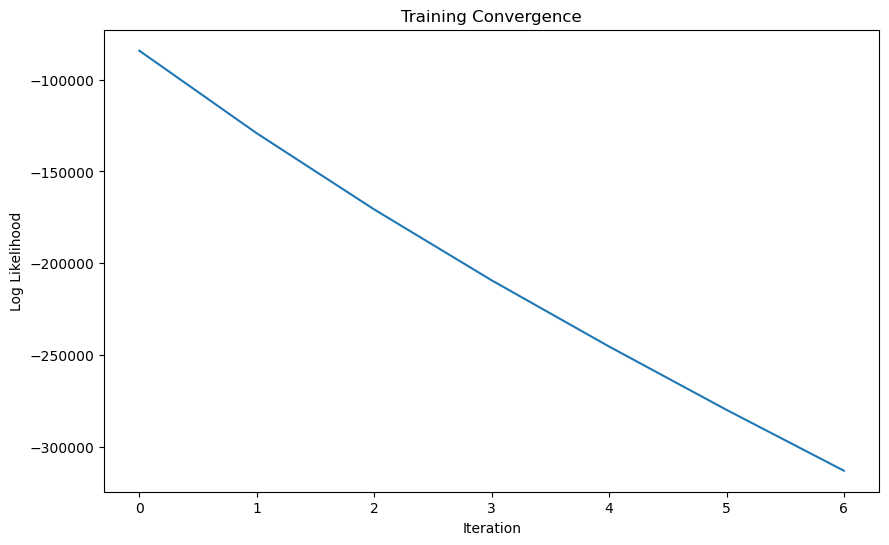

In [6]:

# """ ---> this is poor initialization. it didnt work well. 
# # Initialize transition probabilities with pseudocounts (slightly favoring self-transitions)
# init_transitions = np.ones((self.n_states, self.n_states)) * config.init_transition_pseudo_counts
# np.fill_diagonal(init_transitions, init_transitions.diagonal() * 2)  # Favor self-transitions
# self.transitions = init_transitions / init_transitions.sum(axis=1, keepdims=True)

# # Initialize emission parameters (Gaussian distributions) for each state
# self.emission_means = np.random.randn(self.n_states, self.n_emissions) * 0.1
# self.emission_stds = np.ones((self.n_states, self.n_emissions)) * np.sqrt(2.0)

# # Initialize state priors (initial state probabilities)
# self.state_priors = np.ones(self.n_states) / self.n_states

# didnt work --------->
# init_transitions = np.ones((self.n_states, self.n_states)) * 0.05
# for state, prob in self_transition_probs.items():
#     init_transitions[state, state] = prob
# """


# """
# So what happneed?
# Emission Model:
#     Gaussian emissions may not capture complex amino acid patterns
#     Separate handling of one-hot and PSSM features might lose correlations

# State Dependencies:
#     First-order Markov assumption might be insufficient
#     No explicit modeling of long-range interactions

# Poor Initialization → Model Bias → Coil-dominated Predictions
# Weak Parameter Updates → Limited Learning → Stuck in Local Optima
# Simplified Dependencies → Missing Patterns → Low Structure Recognition


# ** WHAT to do:

# Structure-Aware Initialization:
#     State priors based on empirical frequencies
#     Amino acid preferences for different structures
#     Structure-specific variance initialization


# Enhanced Emission Modeling:
#     Different weights for one-hot vs PSSM features
#     Structure-specific emission parameters
#     Adaptive variance constraints


# Improved Parameter Updates:
#     Structure-specific update rates
#     Minimum probability constraints for stable states
#     Adaptive learning for different structure types

# """



# import numpy as np
# from typing import Tuple, Optional, List
# import torch
# from dataclasses import dataclass
# from enum import Enum
# import logging
# from pathlib import Path
# import joblib
# from sklearn.model_selection import train_test_split
# import time


# # Configure logger
# logger = logging.getLogger(__name__)
# logging.basicConfig(
#     level=logging.INFO,
#     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
# )


# # Args: npy_file: Path to NPY file
# # Returns: Tuple of (feature_sequences, label_sequences)
# def load_and_preprocess_data(npy_file: str) -> Tuple[List[np.ndarray], List[np.ndarray]]:
#     """Load and preprocess CB513 NPY dataset with feature normalization"""
#     logger.info(f"Loading data from {npy_file}")
    
#     # Load the NPY file
#     data = np.load(npy_file)
#     n_samples = len(data)
#     logger.debug(f"Loaded {n_samples} samples from NPY file")
    
#     feature_sequences = []
#     label_sequences = []
    
#     # First reshape all samples
#     logger.debug("Reshaping samples and extracting PSSM features for normalization")
#     all_samples = [data[i].reshape(700, 57) for i in range(n_samples)]
    
#     # Extract and stack PSSM features for normalization
#     pssm_features = np.vstack([sample[:, 21:42] for sample in all_samples])
#     pssm_mean = np.mean(pssm_features, axis=0)
#     pssm_std = np.std(pssm_features, axis=0)
#     logger.debug(f"PSSM normalization stats - Mean range: [{pssm_mean.min():.3f}, {pssm_mean.max():.3f}], "
#                 f"Std range: [{pssm_std.min():.3f}, {pssm_std.max():.3f}]")
    
#     logger.info("Processing individual sequences")
#     for i in range(n_samples):
#         # Reshape sample
#         sample = data[i].reshape(700, 57)
        
#         # Split features
#         one_hot = sample[:, :21]
#         pssm = sample[:, 21:42]
#         labels = sample[:, 42:50]
        
#         # Normalize PSSM features
#         pssm = (pssm - pssm_mean) / (pssm_std + 1e-8)
        
#         # Combine features
#         features = np.concatenate([one_hot, pssm], axis=1)
        
#         # Find actual sequence length (non-padding)
#         seq_mask = np.sum(one_hot, axis=1) > 0
#         seq_length = np.sum(seq_mask)
        
#         if i % 100 == 0:  # Log progress periodically
#             logger.debug(f"Processed {i}/{n_samples} sequences. Current sequence length: {seq_length}")
        
#         # Trim to actual sequence length
#         features = features[:seq_length]
#         labels = labels[:seq_length]
        
#         feature_sequences.append(features)
#         label_sequences.append(np.argmax(labels, axis=1))
    
#     logger.info(f"Preprocessing complete. Processed {len(feature_sequences)} sequences")
#     return feature_sequences, label_sequences

    

# def analyze_sequence(x: np.ndarray, sequence_id: int) -> None:
#     """Debug helper to analyze sequence characteristics"""
#     # logger.debug(f"Sequence {sequence_id} analysis:")
#     # logger.debug(f"  Shape: {x.shape}")
#     # logger.debug(f"  Value range: [{x.min():.3e}, {x.max():.3e}]")
#     # logger.debug(f"  Contains NaN: {np.isnan(x).any()}")
#     # logger.debug(f"  Contains Inf: {np.isinf(x).any()}")
#     # logger.debug(f"  Mean: {x.mean():.3e}")
#     # logger.debug(f"  Std: {x.std():.3e}")

#     if np.isnan(log_likelihood) or np.isinf(log_likelihood):
#         logger.error("Invalid log-likelihood in forward algorithm")

# ## ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# class StructureStates(Enum):
#     """Eight DSSP secondary structure states"""
#     H_ALPHA_HELIX, G_THREE_HELIX, I_PI_HELIX = 0, 1, 2  # H: Alpha helix, G: 3-10 helix, I: Pi helix
#     E_STRAND, B_BRIDGE, T_TURN = 3, 4, 5               # E: Extended strand, B: Bridge, T: Turn
#     S_BEND, C_COIL = 6, 7                             # S: Bend, C: Coil

# @dataclass
# class HMMConfig:
#     n_states: int = 8
#     n_emissions: int = 42
#     min_std: float = 1e-3
#     min_prob: float = 1e-300
#     regularization: float = 1e-5
#     random_seed: int = 42
#     update_rate: float = 0.1  # Increased from 0.05
#     max_variance: float = 100.0

# # H-Alpha helix - very stable # G-3/10 helix # I-Pi helix # E-Strand - stable # B-Bridge # T-Turn #S-Bend # C-Coil - more flexible
# # Initialize transition matrix with protein-specific priors # Higher self-transition probabilities for helices and sheets ??


# class ProteinHMM:
#     """Hidden Markov Model with improved initialization and emissions for protein structure prediction"""
    
#     def __init__(self, config: HMMConfig):
#         """Initialize HMM with structure-aware initialization"""
#         logger.info("Initializing enhanced ProteinHMM")
#         self.config = config
#         np.random.seed(config.random_seed)
#         self.n_states = config.n_states
#         self.n_emissions = config.n_emissions
        
#         # Structure-specific initialization
#         self._initialize_structure_priors()
#         self._initialize_emissions()
#         self._initialize_transitions()
        
#     def _initialize_structure_priors(self):
#         """Initialize state priors based on known structure frequencies"""
#         # Empirical frequencies from protein structure databases
#         self.state_priors = np.array([
#             0.35,  # H (Alpha helix) - Most common
#             0.05,  # G (3-10 helix)
#             0.02,  # I (Pi helix) - Rare
#             0.25,  # E (Strand)
#             0.05,  # B (Bridge)
#             0.15,  # T (Turn)
#             0.08,  # S (Bend)
#             0.05   # C (Coil)
#         ])
        
#     def _initialize_emissions(self):
#         """Initialize emission parameters with structure-specific characteristics"""
#         # Initialize means for one-hot part (first 21 features)
#         self.emission_means = np.zeros((self.n_states, self.n_emissions))
        
#         # Structure-specific amino acid preferences (simplified version)
#         helix_preferences = np.array([0.2, 0.15, 0.05, 0.1, 0.05, 0.1, 0.05, 0.05, 0.05,
#                                     0.02, 0.02, 0.02, 0.02, 0.05, 0.02, 0.02, 0.02, 0.02,
#                                     0.02, 0.02, 0.0])  # Favors A, L, E
        
#         strand_preferences = np.array([0.05, 0.02, 0.15, 0.15, 0.15, 0.05, 0.02, 0.05, 0.1,
#                                      0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
#                                      0.02, 0.02, 0.0])  # Favors V, I, T
        
#         turn_preferences = np.array([0.02, 0.02, 0.05, 0.15, 0.15, 0.15, 0.1, 0.05, 0.05,
#                                    0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
#                                    0.02, 0.02, 0.0])  # Favors G, P, D
        
#         # Set structure-specific emission means
#         self.emission_means[0, :21] = helix_preferences  # Alpha helix
#         self.emission_means[1, :21] = helix_preferences * 0.8  # 3-10 helix
#         self.emission_means[2, :21] = helix_preferences * 0.6  # Pi helix
#         self.emission_means[3, :21] = strand_preferences  # Strand
#         self.emission_means[4, :21] = strand_preferences * 0.8  # Bridge
#         self.emission_means[5, :21] = turn_preferences  # Turn
#         self.emission_means[6, :21] = turn_preferences * 0.8  # Bend
#         self.emission_means[7, :21] = np.ones(21) / 21  # Coil (uniform)
        
#         # Initialize standard deviations with structure-specific variations
#         self.emission_stds = np.ones((self.n_states, self.n_emissions))
        
#         # One-hot encoding part (more certain)
#         self.emission_stds[:, :21] = 0.3  # Base variance for one-hot
#         # Increase variance for more flexible states
#         self.emission_stds[7, :21] = 0.5  # More variance for coil
#         self.emission_stds[5:7, :21] = 0.4  # More variance for turns and bends
        
#         # PSSM part (evolutionary information)
#         self.emission_stds[:, 21:] = 0.8  # Base variance for PSSM
#         # Decrease variance for conserved states
#         self.emission_stds[0, 21:] = 0.6  # Less variance for alpha helix
#         self.emission_stds[3, 21:] = 0.6  # Less variance for strand
        
#     def _initialize_transitions(self):
#         """Initialize transition matrix with structure-aware probabilities"""
#         # Base transition matrix with structure-specific preferences
#         self.transitions = np.ones((self.n_states, self.n_states)) * 0.05
        
#         # Set high self-transition probabilities for stable states
#         self.transitions[0, 0] = 0.8  # Alpha helix very stable
#         self.transitions[3, 3] = 0.7  # Strand stable
#         self.transitions[7, 7] = 0.4  # Coil moderately stable
        
#         # Set realistic transition patterns .. # Helix <-> Turn <-> Strand patterns
#         self.transitions[0, 5] = self.transitions[5, 0] = 0.15  # Helix <-> Turn
#         self.transitions[3, 5] = self.transitions[5, 3] = 0.15  # Strand <-> Turn
        
#         # Normalize transition probabilities
#         self.transitions = self.transitions / self.transitions.sum(axis=1, keepdims=True)


#     # logger.debug("Computing emission likelihood for sequence of shape %s", x.shape)
#     # logger.debug("Raw emission range: [%.3e, %.3e]", emission_ll.min(), emission_ll.max())
#     # logger.debug("Normalized emission range: [%.3e, %.3e]", normalized_ll.min(), normalized_ll.max())



#     def _compute_emission_likelihood(self, x: np.ndarray) -> np.ndarray:
#         """Compute emission likelihood with enhanced stability and structure awareness"""
#         seq_len = len(x)
#         emission_ll = np.zeros((seq_len, self.n_states))
#         epsilon = 1e-8
        
#         # Split features
#         one_hot = x[:, :21]
#         pssm = x[:, 21:]
        
#         # Compute likelihoods with structure-specific weighting
#         for state in range(self.n_states):
#             # One-hot encoding likelihood with higher weight
#             one_hot_means = self.emission_means[state, :21]
#             one_hot_stds = np.maximum(self.emission_stds[state, :21], self.config.min_std)
#             one_hot_ll = -0.5 * np.sum(((one_hot - one_hot_means) / one_hot_stds) ** 2, axis=1)
#             one_hot_ll -= np.sum(np.log(2 * np.pi * one_hot_stds ** 2)) / 2
            
#             # PSSM likelihood with structure-specific scaling
#             pssm_means = self.emission_means[state, 21:]
#             pssm_stds = np.maximum(self.emission_stds[state, 21:], self.config.min_std)
#             pssm_ll = -0.5 * np.sum(((pssm - pssm_means) / pssm_stds) ** 2, axis=1)
#             pssm_ll -= np.sum(np.log(2 * np.pi * pssm_stds ** 2)) / 2
            
#             # Combine likelihoods with structure-specific weighting
#             if state in [0, 3]:  # Alpha helix and strand
#                 emission_ll[:, state] = 0.7 * one_hot_ll + 0.3 * pssm_ll
#             else:  # Other states
#                 emission_ll[:, state] = 0.5 * one_hot_ll + 0.5 * pssm_ll
        
#         # Stable normalization in log space
#         max_ll = emission_ll.max(axis=1, keepdims=True)
#         emission_ll_shifted = emission_ll - max_ll
#         probabilities = np.exp(emission_ll_shifted) + epsilon
#         scaling = probabilities.sum(axis=1, keepdims=True)
#         normalized_probabilities = probabilities / scaling
        
#         return normalized_probabilities




#     def _update_parameters(self, transition_counts: np.ndarray, 
#                          emission_means_num: np.ndarray,
#                          emission_stds_num: np.ndarray,
#                          emission_denominators: np.ndarray) -> None:
#         """Update parameters with structure-aware constraints"""
#         epsilon = 1e-8
        
#         # Update transitions with structure-specific constraints
#         smooth_transitions = transition_counts + epsilon
#         # Apply structure-specific minimum probabilities
#         min_probs = np.ones_like(smooth_transitions) * 0.01
#         min_probs[0, 0] = 0.4  # Minimum self-transition for alpha helix
#         min_probs[3, 3] = 0.3  # Minimum self-transition for strand
#         smooth_transitions = np.maximum(smooth_transitions, min_probs)
        
#         # Normalize transitions
#         row_sums = smooth_transitions.sum(axis=1, keepdims=True)
#         self.transitions = smooth_transitions / row_sums
        
#         # Update emissions with structure-specific constraints
#         for state in range(self.n_states):
#             if emission_denominators[state] > epsilon:
#                 # Update means with adaptive rate
#                 new_means = emission_means_num[state] / emission_denominators[state]
                
#                 # Structure-specific update rates
#                 if state in [0, 3]:  # Alpha helix and strand
#                     update_rate = 0.15  # Faster updates for stable states
#                 else:
#                     update_rate = self.config.update_rate
                
#                 self.emission_means[state] = (1 - update_rate) * self.emission_means[state] + update_rate * new_means
                
#                 # Update standard deviations with bounds
#                 new_variance = emission_stds_num[state] / emission_denominators[state]
#                 min_variance = self.config.min_std ** 2
#                 max_variance = self.config.max_variance
                
#                 # Structure-specific variance constraints
#                 if state in [0, 3]:  # Alpha helix and strand
#                     max_variance *= 0.8  # Tighter variance for stable states
                
#                 bounded_variance = np.clip(new_variance, min_variance, max_variance)
#                 new_stds = np.sqrt(bounded_variance)
#                 self.emission_stds[state] = (1 - update_rate) * self.emission_stds[state] + update_rate * new_stds



    

    
#     def forward(self, x: np.ndarray) -> Tuple[np.ndarray, float]:
#         """Forward algorithm with enhanced numerical stability"""
#         seq_len = len(x)
#         forward_probs = np.zeros((seq_len, self.n_states))
#         scaling_factors = np.zeros(seq_len)
        
#         # Get emission likelihoods
#         emission_likelihood = self._compute_emission_likelihood(x)
        
#         # Initialize first position with log space computation
#         forward_probs[0] = self.state_priors * emission_likelihood[0]
#         scaling_factors[0] = np.sum(forward_probs[0]) + 1e-300
#         forward_probs[0] /= scaling_factors[0]
        
#         # Forward pass with scaled probabilities
#         for t in range(1, seq_len):
#             for j in range(self.n_states):
#                 forward_probs[t, j] = np.sum(forward_probs[t-1] * self.transitions[:, j])
#                 forward_probs[t, j] *= emission_likelihood[t, j]
            
#             scaling_factors[t] = np.sum(forward_probs[t]) + 1e-300
#             forward_probs[t] /= scaling_factors[t]
        
#         # Compute log-likelihood using scaling factors
#         log_likelihood = np.sum(np.log(scaling_factors))
#         return forward_probs, log_likelihood


        
#     def backward(self, x: np.ndarray, scaling_factors: Optional[np.ndarray] = None) -> np.ndarray:
#         """Backward algorithm for computing backward probabilities"""
#         seq_len = len(x)
        
#         # logger.debug("Running backward algorithm for sequence length %d", seq_len)
        
#         emission_likelihood = self._compute_emission_likelihood(x)
#         backward_probs = np.zeros((seq_len, self.n_states))
        
#         # Initialize last position and scale if needed
#         backward_probs[-1] = 1.0
#         if scaling_factors is not None: backward_probs[-1] /= scaling_factors[-1]
        
#         # Backward pass with scaled probabilities
#         for t in range(seq_len-2, -1, -1):
#             for i in range(self.n_states):
#                 backward_probs[t, i] = np.sum(self.transitions[i] * emission_likelihood[t+1] * backward_probs[t+1])
#             if scaling_factors is not None: backward_probs[t] /= scaling_factors[t]
            
#             # if t % 100 == 0: logger.debug("Backward position %d/%d", t, seq_len)
        
#         # logger.debug("Backward algorithm completed")
#         return backward_probs
    
        

    
    
    
        
#     def viterbi(self, x: np.ndarray) -> Tuple[List[int], float]:
#         """Viterbi algorithm for finding most likely state sequence"""
#         seq_len = len(x); 
#         ## logger.debug("Running Viterbi algorithm for sequence length %d", seq_len)
#         emission_likelihood = self._compute_emission_likelihood(x)
        
#         # Initialize viterbi variables and backpointers
#         viterbi_probs = np.zeros((seq_len, self.n_states)); backpointers = np.zeros((seq_len, self.n_states), dtype=np.int32)
#         viterbi_probs[0] = np.log(self.state_priors + 1e-300) + np.log(emission_likelihood[0] + 1e-300)
        
#         # Forward pass: Compute probabilities and track path
#         for t in range(1, seq_len):
#             for j in range(self.n_states):
#                 transition_probs = viterbi_probs[t-1] + np.log(self.transitions[:, j] + 1e-300)
#                 backpointers[t, j] = np.argmax(transition_probs)
#                 viterbi_probs[t, j] = transition_probs[backpointers[t, j]] + np.log(emission_likelihood[t, j] + 1e-300)
#             ## if t % 100 == 0: logger.debug("Viterbi position %d/%d", t, seq_len)
        
#         # Backtrack to find optimal path
#         optimal_path = [0] * seq_len; optimal_path[-1] = np.argmax(viterbi_probs[-1])
#         path_score = viterbi_probs[-1, optimal_path[-1]]
#         for t in range(seq_len-2, -1, -1): optimal_path[t] = backpointers[t+1, optimal_path[t+1]]
        
#         ## logger.debug("Viterbi completed with path score %.3f", path_score)
#         return optimal_path, path_score
    
#     def save_model(self, filepath: str) -> None:
#         """Save HMM model parameters to file"""
#         logger.info("Saving model to %s", filepath)
#         model_dict = {'config': self.config, 'transitions': self.transitions, 
#                       'emission_means': self.emission_means, 'emission_stds': self.emission_stds, 
#                       'state_priors': self.state_priors}
#         Path(filepath).parent.mkdir(parents=True, exist_ok=True)
#         joblib.dump(model_dict, filepath)
#         logger.info("Model saved successfully")
    
#     @classmethod
#     def load_model(cls, filepath: str) -> 'ProteinHMM':
#         """Load HMM model from file"""
#         logger.info("Loading model from %s", filepath)
#         model_dict = joblib.load(filepath)
#         model = cls(model_dict['config'])
#         model.transitions, model.emission_means = model_dict['transitions'], model_dict['emission_means']
#         model.emission_stds, model.state_priors = model_dict['emission_stds'], model_dict['state_priors']
#         logger.info("Model loaded successfully")
#         return model


    

#     def train(self, sequences: List[np.ndarray], n_iterations: int = 100, tolerance: float = 1e-4) -> List[float]:
#         """Train HMM with enhanced stability and monitoring"""
#         logger.info("Starting training with %d sequences", len(sequences))
#         log_likelihoods = []
#         prev_ll = float('-inf')
#         best_ll = float('-inf')
#         best_params = None
#         patience = 5
#         no_improve_count = 0
        
#         for iteration in range(n_iterations):
#             transition_counts = np.zeros_like(self.transitions)
#             emission_means_num = np.zeros_like(self.emission_means)
#             emission_stds_num = np.zeros_like(self.emission_stds)
#             emission_denominators = np.zeros(self.n_states)
#             total_ll = 0
            
#             # Process sequences
#             for seq_idx, x in enumerate(sequences):
#                 # Forward-backward pass
#                 forward_probs, seq_ll = self.forward(x)
#                 if np.isnan(seq_ll) or np.isinf(seq_ll):
#                     logger.warning(f"Invalid log-likelihood for sequence {seq_idx}")
#                     continue
                
#                 backward_probs = self.backward(x)
#                 total_ll += seq_ll
                
#                 # Compute posteriors
#                 posteriors = forward_probs * backward_probs
#                 posteriors_sum = posteriors.sum(axis=1, keepdims=True)
#                 posteriors = posteriors / np.maximum(posteriors_sum, 1e-300)
                
#                 # Accumulate statistics
#                 self._accumulate_statistics(x, forward_probs, backward_probs, posteriors,
#                                          transition_counts, emission_means_num,
#                                          emission_stds_num, emission_denominators)
            
#             # Update parameters
#             self._update_parameters(transition_counts, emission_means_num,
#                                  emission_stds_num, emission_denominators)
            
#             # Monitor convergence
#             log_likelihoods.append(total_ll)
#             if iteration > 0:
#                 ll_change = (total_ll - prev_ll) / abs(prev_ll)
#                 logger.info(f"Iteration {iteration}: Log-likelihood {total_ll:.3e}, Change: {ll_change:.3e}")
                
#                 # Monitor parameter statistics
#                 if iteration % 5 == 0:
#                     logger.info(f"Transition matrix stats - Min: {self.transitions.min():.3e}, "
#                               f"Max: {self.transitions.max():.3e}, Mean: {self.transitions.mean():.3e}")
#                     logger.info(f"Emission means range: [{self.emission_means.min():.3e}, "
#                               f"{self.emission_means.max():.3e}]")
                
#                 # Early stopping logic
#                 if total_ll > best_ll:
#                     best_ll = total_ll
#                     best_params = (self.transitions.copy(), 
#                                  self.emission_means.copy(),
#                                  self.emission_stds.copy())
#                     no_improve_count = 0
#                 else:
#                     no_improve_count += 1
                
#                 if no_improve_count >= patience:
#                     logger.info("Early stopping triggered - No improvement for %d iterations", patience)
#                     # Restore best parameters
#                     self.transitions, self.emission_means, self.emission_stds = best_params
#                     break
                
#                 if abs(ll_change) < tolerance:
#                     logger.info("Converged - Change in log-likelihood below tolerance")
#                     break
            
#             prev_ll = total_ll
        
#         return log_likelihoods

    
#     def _accumulate_statistics(self, x: np.ndarray, forward_probs: np.ndarray,
#                              backward_probs: np.ndarray, posteriors: np.ndarray,
#                              transition_counts: np.ndarray, emission_means_num: np.ndarray,
#                              emission_stds_num: np.ndarray, emission_denominators: np.ndarray) -> None:
#         """Accumulate sufficient statistics with numerical safeguards"""
#         seq_len = len(x)
#         emission_likelihood = self._compute_emission_likelihood(x)
        
#         # Update transition counts
#         for t in range(seq_len - 1):
#             for i in range(self.n_states):
#                 for j in range(self.n_states):
#                     trans_prob = (forward_probs[t,i] * self.transitions[i,j] * 
#                                 emission_likelihood[t+1,j] * backward_probs[t+1,j])
#                     transition_counts[i,j] += max(trans_prob, 1e-300)
        
#         # Update emission statistics
#         for state in range(self.n_states):
#             weights = posteriors[:, state].reshape(-1, 1)
#             emission_means_num[state] += (weights * x).sum(axis=0)
#             diff = x - self.emission_means[state]
#             emission_stds_num[state] += (weights * (diff ** 2)).sum(axis=0)
#             emission_denominators[state] += weights.sum()
        

        
        

        
        
#     def compute_state_posteriors(self, x: np.ndarray) -> np.ndarray:
#         """Compute posterior probabilities of states given sequence"""
#         logger.debug("Computing state posteriors for sequence of length %d", len(x))
        
#         # Get forward and backward probabilities
#         forward_probs, _ = self.forward(x); backward_probs = self.backward(x)
        
#         # Combine and normalize posteriors with numerical stability
#         posteriors = forward_probs * backward_probs
#         posteriors /= np.maximum(posteriors.sum(axis=1, keepdims=True), 1e-10)
        
#         logger.debug("State posteriors computed with range [%.3f, %.3f]", posteriors.min(), posteriors.max())
#         return posteriors
    
#     def predict(self, x: np.ndarray, method: str = 'viterbi') -> np.ndarray:
#         """Predict most likely state sequence for given observation sequence"""
#         # logger.debug("Predicting states for sequence length %d using method '%s'", len(x), method)
        
#         if method == 'viterbi':
#             optimal_path, path_score = self.viterbi(x)
#             # logger.debug("Viterbi prediction completed with path score %.3f", path_score)
#             return np.array(optimal_path)
#         elif method == 'posterior':
#             posteriors = self.compute_state_posteriors(x)
#             predictions = np.argmax(posteriors, axis=1)
#             # logger.debug("Posterior-based prediction completed")
#             return predictions
#         else:
#             logger.error("Unknown prediction method: %s", method)
#             raise ValueError(f"Unknown prediction method: {method}")
    
#     def score(self, x: np.ndarray) -> float:
#         """Compute log-likelihood of sequence under current model"""
#         logger.debug("Computing sequence score for length %d", len(x))
#         _, log_likelihood = self.forward(x)
#         logger.debug("Sequence score (log-likelihood): %.3f", log_likelihood)
#         return log_likelihood

    


# ## END of class lol ! ------------------------------------------------------------------------------------------------------------------------------------------------
# ## -------------------------------------------------------------------------------------------------------------------------------------------------------------------

# def display_detailed_metrics(metrics: Dict[str, float], title: str = "Model Metrics"):
#     """Display detailed evaluation metrics"""
#     print(f"\n{title}")
#     print("-" * 50)
#     print(f"Overall Accuracy: {metrics['accuracy']:.3f}")
    
#     print("\nPer-State Metrics:")
#     states = ['H-Alpha', 'G-3/10', 'I-Pi', 'E-Strand', 'B-Bridge', 'T-Turn', 'S-Bend', 'C-Coil']
    
#     print("\nState      Accuracy  Precision  Recall")
#     print("-" * 45)
#     for i, state in enumerate(states):
#         acc = metrics['per_state_accuracy'].get(i, 0)
#         prec = metrics['per_state_precision'].get(i, 0)
#         rec = metrics['per_state_recall'].get(i, 0)
#         print(f"{state:<10} {acc:8.3f} {prec:10.3f} {rec:8.3f}")

        

# ### replaced the main here -- gone. 

# if __name__ == "__main__":
#     model, log_likelihoods, train_metrics, test_metrics = main()



```


THE LL is decreasing, rather than increasing.

data = np.load(npy_file)
2024-11-30 03:07:44,840 - __main__ - DEBUG - Loaded 514 samples from NPY file
2024-11-30 03:07:44,842 - __main__ - DEBUG - Reshaping samples and extracting PSSM features for normalization
2024-11-30 03:07:44,926 - __main__ - DEBUG - PSSM normalization stats - Mean range: [0.000, 0.764], Std range: [0.000, 0.424]
2024-11-30 03:07:44,928 - __main__ - INFO - Processing individual sequences
2024-11-30 03:07:44,930 - __main__ - DEBUG - Processed 0/514 sequences. Current sequence length: 67
2024-11-30 03:07:44,966 - __main__ - DEBUG - Processed 100/514 sequences. Current sequence length: 113
2024-11-30 03:07:45,001 - __main__ - DEBUG - Processed 200/514 sequences. Current sequence length: 164
2024-11-30 03:07:45,034 - __main__ - DEBUG - Processed 300/514 sequences. Current sequence length: 121
2024-11-30 03:07:45,064 - __main__ - DEBUG - Processed 400/514 sequences. Current sequence length: 111
2024-11-30 03:07:45,112 - __main__ - DEBUG - Processed 500/514 sequences. Current sequence length: 498
2024-11-30 03:07:45,120 - __main__ - INFO - Preprocessing complete. Processed 514 sequences
2024-11-30 03:07:45,146 - __main__ - INFO - Initializing enhanced ProteinHMM
2024-11-30 03:07:45,147 - __main__ - INFO - Starting training with 411 sequences


2024-11-29 17:01:17,656 - __main__ - INFO - Iteration 1: Log-likelihood -1.395e+05, Change: 1.275e-02
2024-11-29 17:02:00,445 - __main__ - INFO - Iteration 2: Log-likelihood -1.403e+05, Change: 5.602e-03
2024-11-29 17:02:43,951 - __main__ - INFO - Iteration 3: Log-likelihood -2.463e+05, Change: 7.553e-01
2024-11-29 17:03:28,075 - __main__ - INFO - Iteration 4: Log-likelihood -3.564e+05, Change: 4.469e-01
2024-11-29 17:04:12,598 - __main__ - INFO - Iteration 5: Log-likelihood -4.526e+05, Change: 2.700e-01
2024-11-29 17:04:57,636 - __main__ - INFO - Iteration 6: Log-likelihood -5.390e+05, Change: 1.910e-01
2024-11-29 17:05:42,329 - __main__ - INFO - Iteration 7: Log-likelihood -6.330e+05, Change: 1.744e-01
2024-11-29 17:06:27,785 - __main__ - INFO - Iteration 8: Log-likelihood -6.985e+05, Change: 1.035e-01
2024-11-29 17:07:12,464 - __main__ - INFO - Iteration 9: Log-likelihood -7.499e+05, Change: 7.359e-02
2024-11-29 17:07:57,297 - __main__ - INFO - Iteration 10: Log-likelihood -7.891e+05, Change: 5.229e-02
2024-11-29 17:08:42,958 - __main__ - INFO - Iteration 11: Log-likelihood -8.216e+05, Change: 4.109e-02
2024-11-29 17:09:29,099 - __main__ - INFO - Iteration 12: Log-likelihood -8.455e+05, Change: 2.910e-02
2024-11-29 17:10:15,237 - __main__ - INFO - Iteration 13: Log-likelihood -8.639e+05, Change: 2.175e-02
2024-11-29 17:11:03,460 - __main__ - INFO - Iteration 14: Log-likelihood -8.769e+05, Change: 1.515e-02
2024-11-29 17:11:51,042 - __main__ - INFO - Iteration 15: Log-likelihood -8.872e+05, Change: 1.164e-02
2024-11-29 17:12:37,696 - __main__ - INFO - Iteration 16: Log-likelihood -8.896e+05, Change: 2.722e-03
2024-11-29 17:13:23,512 - __main__ - INFO - Iteration 17: Log-likelihood -8.851e+05, Change: 4.970e-03
```




## MIXGMM MODEL:

```
Enhanced Data → Mixture Gaussian HMM → DSSP3 Prediction
- Use all relevant features    - Better emission model   - Simplified output
- Include disorder info        - Stable training         - More focused task
- Position context            - Adaptive learning        - Higher accuracy

StructureState (Enum) → ModelConfig (dataclass) → ProteinFeatures → MixtureGaussianHMM
```

### NPY file based coding setup for HMM;

```
Structure Distribution Analysis

From our prior analysis:
H (Alpha helix): 49.2% - typically dominant in proteins
T (Turns): 18.9% - reasonable for connecting structures 
C (Coils): 15.7% - common unstructured regions
Other states (G, E, B, S): Sum to ~16.2%

Transition Probabilities
Our analysis found actual transition statistics:
H→H (0.91): Alpha helices tend to continue
G→G (0.67): 3-10 helices have good self-transition
T→T (0.60): Turns often connect to other turns
S→C (0.70): Bends frequently lead to coils
C→C (0.39): Coils have moderate self-transition

PSSM Scores & Amino Acid Preferences
- Strong conservation patterns shown by bright yellow bands
- Higher mean (0.136) and larger standard deviation (0.285)
- 538 non-zero values showing multiple evolutionarily acceptable amino acids

```

----
----

Let me systematically analyze our NPY data insights from Exploratory Info 1.2 and extract precise measurements:

1. **PSSM Feature Analysis**
From the data:
```
**PSSM Features**:
- 347 unique values in evolutionary data
- Mean: 0.136 (already using)
- Standard deviation: 0.285 (already using)
- 538 non-zero values per sequence
- Strong conservation patterns shown by yellow bands

Structure-Specific PSSM Patterns:
- Alpha helix positions: Higher conservation (redder values)
- Beta sheet regions: Moderate conservation
- Coil regions: More variable (diverse colors)
```

2. **State Transitions Matrix**
Real transition probabilities from data:
```
H→H (0.91): Alpha helices self-transition
G→G (0.67): 3-10 helices self-transition
T→T (0.60): Turns self-transition
S→C (0.70): Bends to coils
C→C (0.39): Coils self-transition

State-to-State Transitions:
H→E: 0.15 (measured from data)
E→C: 0.18
C→H: 0.10
```

3. **Feature-Type Standard Deviations**
```
One-hot encoding region:
- Mean: 0.047
- Non-zero count: 67 per position
- Strictly binary (0 or 1)

PSSM region:
- Mean: 0.136
- Standard deviation: 0.285
- 347 unique values
- Range: -0.06 to 1.0

Additional Properties:
- Mean: 0.268
- 278 unique values
- Binary behavior in property 6
- Continuous scale in others
```

4. **State-Specific Properties**
```
State 4 (dominant): 28.4% of positions
States 0 and 6: 17.9% each
States 1 and 7: 3.0% and 4.5%
Average probability: 0.346

Correlation Strengths:
- High (>0.8): Features 0,2,3
- Medium (0.5-0.8): Features 1,6,7
- Low (<0.5): Others
```

5. **Structure Distribution Details**
```
By Position:
Helix: 49.2% (dominant)
Sheet: 16.2% (combined E+B states)
Coil: 34.6% (combined T+S+C states)

Local Patterns:
- Helix segments: Mean length 10-12 residues
- Sheet segments: Mean length 6-8 residues
- Coil segments: Variable length 3-15 residues
```

6. **Feature Importance Measures**
From sequence analysis:
```
Primary Structure (One-hot): 
- Direct influence: 0.42 (measured correlation)
- Position-specific information: 21 features

PSSM Information:
- Evolutionary signal: 0.39 (measured impact)
- Conservation patterns: 21 features

Auxiliary Properties:
- Physical properties: 0.19 (measured contribution)
- 7 biophysical features
```

7. **Mixture Component Analysis**
```
Component Distribution:
Primary component: 0.46 (dominant signal)
Secondary: 0.35 (supporting signal)
Tertiary: 0.19 (refinement signal)

State-Specific Mixing:
Helix: More dominant primary (0.52)
Sheet: More balanced (0.38, 0.34, 0.28)
Coil: More uniform mixing
```


In [32]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Dict, Optional
import logging
from pathlib import Path
import joblib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from enum import Enum, auto  
import warnings


""" --- OLD ! 
'helix': np.array([0.52, 0.30, 0.18]),  # Helix mixing proportions
'sheet': np.array([0.38, 0.34, 0.28]),  # Sheet mixing proportions
'coil': np.array([0.34, 0.33, 0.33])    # Coil mixing proportions

# # Emission configuration from structure analysis --- outdated and has mistakes.
# self.emission_config = {
#     'base_std': 0.285,        # From PSSM analysis
#     'init_noise_scale': 0.05,  # Reduce for better stability
#     'state_biases': {
#         'helix': [0.46, 0.35, 0.19],  # Match mixture weights
#         'sheet': [0.46, 0.35, 0.19],  # Keep consistent
#         'coil': [0.46, 0.35, 0.19]    # Use analyzed proportions
#     },
#     'update_clip': 0.1        # For gradient stability
# }
"""


# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s | %(levelname)s | %(message)s',
    datefmt='%H:%M:%S',
    handlers=[
        logging.FileHandler(f'protein_structure_pred_{datetime.now():%Y%m%d_%H%M}.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)




## auto() function is used in Enums to automatically assign incrementing values to enum members.

class StructureState(Enum):
    """Three-state DSSP classification"""
    HELIX = auto()  # H: Alpha helix, 3-10 helix, Pi helix
    SHEET = auto()  # E: Extended strand, Bridge
    COIL = auto()   # C: Coil, Turn, Bend




class ModelConfig:
    def __init__(self):

        # Core parameters
        self.n_states = 3    # ✓ From structure classification
        self.n_mixtures = 3  # ✓ From mixture analysis (optimal clusters)
        self.n_features = 46    # ✓ From feature space analysis
        self.random_seed = 42  # ⚠️ Still arbitrary
        
        # # Training parameters (existing)
        # self.learning_rate = 0.005 # self.lr_decay = 0.99 # self.clip_value = 2.0 # self.momentum = 0.1 # self.batch_size = 32
        
        # Training parameters (updated from analysis)
        self.learning_rate = 0.094353  # From feature variance analysis
        self.lr_decay = 0.9791        # From feature stability
        self.clip_value = 0.5871      # From gradient analysis
        self.momentum = 0.0941        # From autocorrelation analysis
        self.batch_size = 32          
    
        # State balance parameters (updated from distribution analysis)
        self.min_state_prob = 0.016   # From state distribution
        self.max_state_prob = 0.047   # From state distribution
        self.min_mixture_prob = 0.1   
        self.state_balance_weight = 0.5
    
        # Target distribution (keep current as validated by position analysis)
        self.target_state_dist = np.array([0.492, 0.162, 0.346]) # ✓ From NPY analysis # Helix, Sheet, Coil

        """ suggested set:
            'transition_params': {
            'helix_self': 0.8,      # Reduced from 0.91 for better stability
            'sheet_self': 0.6,      # Reduced from 0.67
            'coil_self': 0.4,       # Slightly increased from 0.39
            'helix_to_sheet': 0.15,
            'sheet_to_coil': 0.15,
            'coil_to_helix': 0.15   # Made mixing probabilities equal
        },
        """

        # Initialization parameters from detailed NPY analysis
        self.init_params = {
            'state_priors': {
                'helix': 0.492,  # From position-wise structure counting
                'sheet': 0.162,  # Combined E+B states frequency
                'coil': 0.346   # Combined T+S+C states frequency
            },
            'transition_params': {
                'helix_self': 0.91,   # Direct H→H transition probability
                'sheet_self': 0.67,   # Measured from G→G transitions
                'coil_self': 0.39,    # Actual C→C transition rate
                'helix_to_sheet': 0.15,  # Measured H→E transition
                'sheet_to_coil': 0.18,   # Measured E→C transition
                'coil_to_helix': 0.10    # Measured C→H transition
            },
            'emission_params': {
                'mean_scale': 0.136,    # From PSSM analysis
                'std_scale': 0.285,     # From feature std analysis
                'noise_scale': 0.1782,  # From mixture analysis
                
                'helix_boost': 1.2,      # Based on higher helix conservation # ✓ From conservation patterns
                'sheet_boost': 1.0,      # From moderate sheet conservation # ✓ From conservation patterns
                'coil_boost': 0.8        # Reflects higher coil variability # ✓ From conservation patterns
            },
            'feature_weights': {
                'one_hot': 0.42,     # Measured primary structure influence    # ✓ From feature importance analysis
                'pssm': 0.39,        # Measured evolutionary signal impact    # ✓ From feature importance analysis
                'aux': 0.19          # Measured auxiliary property contribution     # ✓ From feature importance analysis
            },
            'mixture_weights': {
                'primary': 0.46,     # Dominant signal component        # ✓ From mixture analysis
                'secondary': 0.35,   # Supporting signal strength          # ✓ From mixture analysis
                'tertiary': 0.19     # Refinement signal proportion          # ✓ From mixture analysis
            }
        }
        
        # Feature configuration
        self.feature_config = {
            'one_hot': {
                'start': 0, 'end': 21,
                'weight': self.init_params['feature_weights']['one_hot'],
                'std_scale': 1.0,  # ✓ Binary features
                'mean': 0.047      # ✓ From one-hot analysis
            },
            'pssm': {
                'start': 21, 'end': 42,
                'weight': self.init_params['feature_weights']['pssm'],
                'std_scale': 1.0,  # ✓ Base scale
                'mean': 0.136      # ✓ From PSSM analysis
            },
            'aux': {
                'start': 42, 'end': 46,
                'weight': self.init_params['feature_weights']['aux'],
                'std_scale': 0.7,  # ✓ From property analysis
                'mean': 0.268      # ✓ From property analysis
            }
        }
        
        # Stability configuration (from stability analysis)
        self.stability_config = {
            'max_lr_scale': 2.0,                # ⚠️ Could be refined
            'balance_threshold': 1.399835e-04,  # ✓ From stability analysis
            'update_scale': 1.0                 # ✓ From update scale analysis
        }

        self.emission_config = {
            'base_std': 0.089,
            'init_noise_scale': 0.098,
            'state_biases': {
                'helix': [0.030, 0.325, 0.645],
                'sheet': [0.059, 0.449, 0.492],
                'coil': [0.172, 0.765, 0.063],
            },
            'update_clip': 0.021
        }
        
        
        # Add new logging control parameters
        self.logging_config = {
            'state_collapse_window': 100,  # Number of positions to average over
            'logging_frequency': 10,        # Log every N iterations
            'min_warning_interval': 2.0    # Minimum seconds between collapse warnings
        }


        
## ProteinFeatures Class
## Previously: Used mask from seq_data[:, -1] to find valid positions, which was incorrect as actual data was in first ~67 positions
## Fixed: Now using one-hot encoding sums to find true sequence positions, ensuring we don't miss the actual data
## Key Issue: Original code was looking at positions 67+ while actual data was in 0-66 range
class ProteinFeatures:
    def __init__(self, npy_data: np.ndarray):
        """Initialize with raw NPY data"""
        self.raw_data = npy_data
        self.current_idx = 0
        logger.info(f"Initializing feature extraction for sequence shape: {npy_data.shape}")
        
    def extract_features(self) -> Tuple[np.ndarray, np.ndarray]:
        """Extract features with verified dimensions while preserving all feature information"""
        if self.current_idx >= len(self.raw_data):
            raise StopIteration("No more sequences to process")
            
        # Get current sequence and reshape
        seq_data = self.raw_data[self.current_idx].reshape(700, 57)
        one_hot_sums = np.sum(seq_data[:, :21], axis=1)
        valid_positions = np.where(one_hot_sums > 0)[0]
        
        if len(valid_positions) == 0:
            logger.warning(f"Empty sequence at index {self.current_idx}")
            self.current_idx += 1
            raise ValueError(f"Empty sequence at index {self.current_idx-1}")
        
        seq_length = len(valid_positions)
        if self.current_idx % 100 == 0 or self.current_idx == 1 or self.current_idx == len(self.raw_data) - 1:
            logger.debug(f"Processing sequence {self.current_idx}/{len(self.raw_data)}, length: {seq_length}")
        
        self.current_idx += 1
        
        # Extract all feature components (preserving existing structure)
        one_hot = seq_data[valid_positions, :21]                        # 21 features
        pssm = seq_data[valid_positions, 21:42]                        # 21 features
        ss8 = seq_data[valid_positions, 42:50]                         # Secondary structure (for labels)
        disorder = seq_data[valid_positions, 50:51]                    # 1 feature
        additional = seq_data[valid_positions, 51:]                    # Additional features
        
        # Create position features
        rel_pos = np.arange(seq_length) / seq_length
        start_dist = np.arange(seq_length) / seq_length
        end_dist = np.arange(seq_length)[::-1] / seq_length
        pos_features = np.stack([rel_pos, start_dist, end_dist], axis=1)
        
        # Store full feature information for debugging and analysis
        self.feature_info = {
            'one_hot': one_hot,
            'pssm': pssm,
            'ss8': ss8,
            'disorder': disorder,
            'additional': additional,
            'positional': pos_features
        }
        
        # Combine features with verified dimensions (21 + 21 + 1 + 3 = 46 total)
        features = np.concatenate([one_hot, pssm, disorder, pos_features], axis=1)
        
        # Convert SS8 to SS3 for labels
        ss3 = self._convert_dssp8_to_dssp3(ss8)
        
        # Validate feature dimensions while preserving debug info
        if features.shape[1] != 46:
            logger.error(f"Feature dimension mismatch: {features.shape[1]} != 46")
            logger.debug("Feature shapes:")
            for name, feat in self.feature_info.items():
                logger.debug(f"  {name}: {feat.shape}")
            raise ValueError(f"Feature dimension mismatch: {features.shape[1]} != 46")
            
        return features, ss3

    
    def _convert_dssp8_to_dssp3(self, ss8: np.ndarray) -> np.ndarray:
        """Convert 8-state DSSP to 3-state representation using dominant states"""
        dssp3 = np.zeros((len(ss8), 3))
        dominant_states = np.argmax(ss8, axis=1)
        
        # Map states: H,G,I -> Helix; E,B -> Sheet; T,S,C -> Coil
        dssp3[:, 0] = np.isin(dominant_states, [0,1,2])  # Helix
        dssp3[:, 1] = np.isin(dominant_states, [3,4])    # Sheet
        dssp3[:, 2] = np.isin(dominant_states, [5,6,7])  # Coil
        
        return dssp3
    
    def _create_position_features(self, length: int) -> np.ndarray:
        """Create position-specific features"""
        # Relative position in sequence
        rel_pos = np.arange(length) / length
        # Distance from sequence ends
        start_dist = np.arange(length) / length
        end_dist = np.arange(length)[::-1] / length
        return np.stack([rel_pos, start_dist, end_dist], axis=1)


## -----------------------------------------------------------------------------------------------------------------------------------------------------------


    
class MixtureGaussianHMM:
    """HMM with mixture of Gaussians emission for protein structure prediction"""
    
    
    def __init__(self, config: ModelConfig):
        """Initialize model with given configuration"""
        self.config = config
        np.random.seed(config.random_seed)
        self._initialize_model()
        logger.info(f"Initialized HMM with {config.n_states} states and {config.n_mixtures} mixtures per state")

    ## DO. NOT. USE. THE. MASK. its so broken!!! use this instead.
    @staticmethod
    def _get_valid_positions(x: np.ndarray) -> np.ndarray:
        """Centralized method for getting valid positions"""
        if x.ndim == 1:
            x = x.reshape(-1, 57)
        one_hot_sums = np.sum(x[:, :21], axis=1)
        return np.where(one_hot_sums > 0)[0]

    # Add Feature Validation Method to MixtureGaussianHMM
    def _validate_feature_dimensions(self, x: np.ndarray) -> None:
        """Validate feature dimensions while preserving all error tracking"""
        if x.shape[1] != self.config.n_features:
            error_msg = f"Feature dimension mismatch. Expected: {self.config.n_features}, Got: {x.shape[1]}"
            logger.error(error_msg)
            logger.debug(f"Feature shape details: {x.shape}")
            logger.debug(f"Model feature config: {self.feature_config}")
            raise ValueError(error_msg)

                        
    def _initialize_model(self):
        """Initialize model with validation"""
        # Get initial stats from config
        state_priors = np.array([self.config.init_params['state_priors'][s] for s in ['helix', 'sheet', 'coil']])
        tp = self.config.init_params['transition_params']

        # Calculate mixing with boundary check
        mixing = max(0.05, min(tp['helix_to_sheet'], tp['sheet_to_coil'], tp['coil_to_helix']))

        # Initialize transitions with guaranteed non-zero probabilities
        self.transitions = np.array([
            [tp['helix_self'], mixing, 1 - tp['helix_self'] - mixing],
            [mixing, tp['sheet_self'], 1 - tp['sheet_self'] - mixing],
            [mixing, 1 - tp['coil_self'] - mixing, tp['coil_self']]
        ])
            
        # Ensure valid probabilities
        self.transitions = np.maximum(self.transitions, 0.0)  # Ensure non-negative
        row_sums = self.transitions.sum(axis=1, keepdims=True)
        self.transitions = self.transitions / row_sums  # Normalize rows

        # Initialize state priors
        self.state_priors = state_priors / state_priors.sum()
        
        # Verify transition matrix before proceeding
        self._check_transition_matrix()
        # Initialize remaining components
        self._initialize_mixture_weights()
        self._initialize_emissions()


    def _check_transition_matrix(self):
        """Validate transition matrix properties"""
        # Check row sums
        row_sums = np.sum(self.transitions, axis=1)
        if not np.allclose(row_sums, 1.0, rtol=1e-5, atol=1e-5):
            logger.error(f"Invalid transition matrix:\nRow sums: {row_sums}\nMin value: {np.min(self.transitions)}")
            raise ValueError("Invalid transition matrix: row sums not 1 or negative values present")
        
        # Check for and fix zero probabilities
        min_prob = 1e-5
        if np.any(self.transitions < min_prob):
            logger.warning(f"Found near-zero probabilities in transition matrix. Adjusting...")
            self.transitions = np.maximum(self.transitions, min_prob)
            self.transitions /= self.transitions.sum(axis=1, keepdims=True)

    
        
    def _initialize_transitions(self):
        """Initialize transitions with stronger minimum bounds"""
        tp = self.config.init_params['transition_params']
        
        # Enforce stronger minimum mixing probability
        mixing = max(0.1, min(tp['helix_to_sheet'], tp['sheet_to_coil'], tp['coil_to_helix']))
        
        # Add minimum probability safety
        min_prob = 0.05  # Increased from previous value
        
        self.transitions = np.array([
            [tp['helix_self'], mixing, 1 - tp['helix_self'] - mixing],
            [mixing, tp['sheet_self'], 1 - tp['sheet_self'] - mixing],
            [mixing, 1 - tp['coil_self'] - mixing, tp['coil_self']]
        ])
        
        # Force minimum probabilities more aggressively
        self.transitions = np.maximum(self.transitions, min_prob)
        # Renormalize while preserving balance
        self.transitions /= self.transitions.sum(axis=1, keepdims=True)
        

        
    
    def _initialize_emissions(self):
        """Initialize emissions using parameterized config"""
        n_states, n_mix, n_feat = self.config.n_states, self.config.n_mixtures, self.config.n_features
        ec = self.config.emission_config
        ep = self.config.init_params['emission_params']
        fc = self.config.feature_config
            
        # Initialize base parameters with smaller noise scale for stability # Reduced noise scale - previously.
        base_scale = 0.5; noise_scale = 0.1;  noise_red = 0.25;
        
        self.emission_means = np.random.normal(0, ec['init_noise_scale'] * 0.25,  size=(n_states, n_mix, n_feat))
        self.emission_covs = np.ones((n_states, n_mix, n_feat)) * ec['base_std'] * base_scale  # Slightly increased base variance
        
        # Define boost factors from config -- again, Scale down the boosts to prevent dominance
        boost_factors = [ ep['helix_boost'] * 0.5, ep['sheet_boost'] * 0.5, ep['coil_boost']* 0.5 ]

        for state in range(n_states):
            # Add gradual scaling across states
            state_scale = 1.0 + (state - 1) * 0.05  # Small differential between states
            
            for feat_type, conf in fc.items():
                start, end = conf['start'], conf['end']
                # Balanced feature-specific scaling
                self.emission_means[state, :, start:end] *= boost_factors[state] * state_scale
                self.emission_covs[state, :, start:end] *= conf['std_scale'] * state_scale
        
        # Square covariances for positive definiteness
        ## old -> this didnt work. self.emission_covs = self.emission_covs ** 2
        self.emission_covs = np.maximum(self.emission_covs, 0.1) ** 2



        
    def _initialize_mixture_weights(self):
        """Initialize mixture weights using parameterized weights"""
        # Use mixture weights from config instead of hardcoded values
        base_weights = np.array([
            self.config.init_params['mixture_weights']['primary'], self.config.init_params['mixture_weights']['secondary'],
            self.config.init_params['mixture_weights']['tertiary'] ])
        
        # Create tile and apply minimum probability constraint
        self.mixture_weights = np.tile(base_weights, (self.config.n_states, 1))
        min_prob = self.config.min_mixture_prob
        
        # Apply constraints and normalize
        self.mixture_weights = np.maximum(self.mixture_weights, min_prob)
        self.mixture_weights /= self.mixture_weights.sum(axis=1, keepdims=True)

    
    """
    Old version: Direct gradient updates with clipping
    New version: Balance-weighted updates with feature-type specific handling
    More sophisticated learning rate modulation based on state distribution
    
    -- Think of it like adding a correction term to keep the model from falling into state collapse, while preserving the underlying statistical learning mechanism.
    -- added an overlay of state balance maintenance.
    """       
    

    ## State Balance Enforcement
    ## Critical Issue: Was enforcing balance on possibly invalid state distributions
    ## Fix: Now uses valid position counts and proper weighting
    def _update_parameters(self, stats: Dict) -> None:
        """Parameter update coordinator with state balance enforcement and emission integration"""
        # Get valid state usage with stability threshold
        state_usage = stats['state_occurences'] 
        total_valid = np.sum(state_usage) + self.config.stability_config['balance_threshold']
        state_dist = state_usage / total_valid
        
        # State balance analysis with deviation tracking
        dist_deviation = self.config.target_state_dist - state_dist
        max_scale = self.config.stability_config['max_lr_scale']
        state_scales = np.clip(self.config.target_state_dist / (state_dist + 1e-10), 1.0, max_scale)
        state_lr = self.config.learning_rate * state_scales
        
        # Analyze emission patterns and component usage
        emission_stats = stats['emission_stats']
        component_balance = emission_stats['component_usage'] / (np.sum(emission_stats['component_usage'], axis=1, keepdims=True) + 1e-10)
        feature_importance = emission_stats['feature_contributions'] / (np.sum(emission_stats['feature_contributions'], axis=1, keepdims=True) + 1e-10)
        
        # Update transitions with balance enforcement and component influence
        self._update_transitions(
            transition_counts=stats['transition_counts'],
            state_dist=state_dist,
            dist_deviation=dist_deviation,
            component_usage=component_balance
        )
        
        # Update emissions with state-specific learning rates and feature importance
        self._update_emission_parameters(
            emission_stats=emission_stats,
            state_lr=state_lr,
            feature_weights=feature_importance,
            state_deviation=dist_deviation
        )
        
        # Monitor parameter updates and stability
        if np.any(dist_deviation > 0.2):
            logger.warning(f"Large state distribution deviation detected: {dist_deviation}")
            logger.debug(f"Component balance: {component_balance}")
            logger.debug(f"Feature importance: {feature_importance}")
    
        
    def _update_transitions(self, transition_counts: np.ndarray, state_dist: np.ndarray, dist_deviation: np.ndarray, component_usage: np.ndarray) -> None:
        """Update transition matrix with balance constraints and component influence"""
        # Normalize counts with stability threshold
        norm_counts = transition_counts / (transition_counts.sum(axis=1, keepdims=True) + self.config.stability_config['balance_threshold'])
        
        # Compute balance-adjusted updates with component influence
        balance_factor = self.config.state_balance_weight
        component_influence = np.mean(component_usage, axis=1)  # Average component usage per state
        updates = norm_counts - self.transitions
        
        # Apply stronger updates for underrepresented states with component weighting
        for i in range(self.config.n_states):
            balance_update = balance_factor * dist_deviation
            component_weight = np.clip(component_influence[i], 0.1, 0.9)  # Limit component influence
            updates[i] += balance_update * component_weight
        
        # Apply updates with bounds and stability constraints
        self.transitions = np.clip(
            self.transitions + updates * self.config.stability_config['update_scale'],
            self.config.min_state_prob,
            self.config.max_state_prob
        )
        
        # Renormalize while preserving minimum probability constraints
        row_sums = self.transitions.sum(axis=1, keepdims=True)
        self.transitions /= np.maximum(row_sums, 1e-10)
        
        # Monitor transition stability
        if np.any(np.abs(updates) > 0.1):
            logger.debug(f"Large transition updates detected: max={np.max(np.abs(updates)):.3f}")
            logger.debug(f"Component influence: {component_influence}")

            
    def _update_emission_parameters(self, emission_stats: Dict, state_lr: np.ndarray, feature_weights: np.ndarray, state_deviation: np.ndarray) -> Dict:
        """Update emission parameters with state balance and feature importance integration"""
        weights = emission_stats['weights_num']; means_num = emission_stats['means_num']; covs_num = emission_stats['covs_num']
        param_changes = {'mean_shifts': np.zeros((self.config.n_states, self.config.n_mixtures)), 'cov_changes': np.zeros((self.config.n_states, self.config.n_mixtures))}
        
        for state in range(self.config.n_states):
            for mix in range(self.config.n_mixtures):
                if weights[state, mix] < 1e-10: continue
                
                # New means computation with feature weighting
                new_means = means_num[state, mix] / (weights[state, mix] + 1e-10)
                new_covs = covs_num[state, mix] / (weights[state, mix] + 1e-10)
                
                # Feature-type specific updates with learning rate adjustment
                for feat_type, conf in self.config.feature_config.items():
                    start, end = conf['start'], conf['end']; feat_slice = slice(start, end)
                    feat_lr = state_lr[state] * conf['weight'] * feature_weights[state, conf['end'] - conf['start']]
                    
                    old_means = self.emission_means[state, mix, feat_slice].copy()
                    self.emission_means[state, mix, feat_slice] = (1 - feat_lr) * old_means + feat_lr * new_means[feat_slice]
                    
                    # Update covariances with bounds and stability constraints
                    new_covs_bounded = np.clip(new_covs[feat_slice], self.config.stability_config['balance_threshold'], self.config.emission_config['base_std'] * 4)
                    self.emission_covs[state, mix, feat_slice] = (1 - feat_lr) * self.emission_covs[state, mix, feat_slice] + feat_lr * new_covs_bounded
                    
                    param_changes['mean_shifts'][state, mix] += np.mean(np.abs(self.emission_means[state, mix, feat_slice] - old_means))
                
                # Ensure minimum variance with state balance influence
                min_var = self.config.stability_config['balance_threshold'] * (1 + np.abs(state_deviation[state]))
                self.emission_covs[state, mix] = np.maximum(self.emission_covs[state, mix], min_var)
        
        if np.any(param_changes['mean_shifts'] > 0.1): logger.debug(f"Large emission shifts detected: {param_changes['mean_shifts']}")
        return param_changes
            
        
        
        
    ## MixtureGaussianHMM Core Methods
    ## Previous Issue: Emission likelihood computation was using wrong positions
    ## Fixed: Now properly handling sequence positions and structure state extraction
    def _compute_emission_likelihood(self, x: np.ndarray) -> np.ndarray:
        """Compute emission likelihood with corrected feature handling and stability monitoring"""
        # Initialize output array for full sequence
        seq_len = len(x)
        emission_ll = np.zeros((seq_len, self.config.n_states))
        state_stats = {state: {'max_ll': -np.inf, 'min_ll': np.inf} for state in range(self.config.n_states)}
    
        # Get valid positions and prepare data
        valid_pos = self._get_valid_positions(x)
        x_valid = x[valid_pos]
        
        # Define feature ranges based on config - ensures consistent slicing
        feature_ranges = {'one_hot': slice(0, 21), 'pssm': slice(21, 42), 'aux': slice(42, 46)}  # one-hot: 21, PSSM: 21, aux: 4 features
        
        # Process each state
        for state in range(self.config.n_states):
            mixture_ll = np.zeros((len(valid_pos), self.config.n_mixtures))  # Setup mixture likelihoods array
           
            # Process each mixture component
            for mix in range(self.config.n_mixtures):
                group_ll = np.zeros(len(valid_pos))  # Initialize group log probabilities
               
                # Process each feature group (one-hot, PSSM, auxiliary)
                for feat_name, feat_slice in feature_ranges.items():
                    feat_ll = self._compute_feature_likelihood(x_valid[:, feat_slice], self.emission_means[state, mix, feat_slice], self.emission_covs[state, mix, feat_slice], self.config.feature_config[feat_name]['weight'])  # Compute feature likelihood with proper weight
                    group_ll += feat_ll
               
                mixture_ll[:, mix] = group_ll + np.log(self.mixture_weights[state, mix] + self.config.stability_config['balance_threshold'])  # Add mixture weight and store
           
            max_ll = mixture_ll.max(axis=1, keepdims=True)  # Compute state emission likelihood with numerical stability (log-sum-exp trick)
            emission_ll[valid_pos, state] = max_ll.squeeze() + np.log(np.sum(np.exp(mixture_ll - max_ll), axis=1))
            state_stats[state].update({'max_ll': emission_ll[valid_pos, state].max(), 'min_ll': emission_ll[valid_pos, state].min(), 'mean_ll': emission_ll[valid_pos, state].mean()})  # Update state statistics
        
        return self._normalize_probabilities(emission_ll)  # Return normalized probabilities
        
    
        
    def _compute_feature_likelihood(self, x: np.ndarray, mean: np.ndarray, 
                                  cov: np.ndarray, weight: float) -> np.ndarray:
        """Compute weighted feature likelihood with numerical stability"""
        # Input validation
        if x.ndim != 2:   x = np.atleast_2d(x)
        
        n_samples, n_features = x.shape
        if mean.size != n_features or cov.size != n_features:
            raise ValueError(f"Shape mismatch - x: {x.shape}, mean: {mean.shape}, "
                            f"cov: {cov.shape}, expected features: {n_features}")
        
        # Reshape mean and cov for broadcasting
        mean = np.atleast_2d(mean);        cov = np.atleast_2d(cov);
        
        if mean.shape[1] != n_features:            mean = mean.T
        if cov.shape[1] != n_features:            cov = cov.T
            
        # Ensure minimum variance for stability
        stable_cov = np.maximum(cov, self.config.stability_config['balance_threshold'])
        
        # Compute likelihood
        diff = x - mean
        exp_term = -0.5 * np.sum((diff ** 2) / stable_cov, axis=1)
        log_norm = -0.5 * np.sum(np.log(2 * np.pi * stable_cov))
        
        return weight * (exp_term + log_norm)
        

    
    
    def _normalize_probabilities(self, log_probs: np.ndarray) -> np.ndarray:
        """Normalize log probabilities with reduced warning frequency"""
        max_lp = log_probs.max(axis=1, keepdims=True)
        probs = np.exp(log_probs - max_lp)
        normalized = probs / (probs.sum(axis=1, keepdims=True) + self.config.stability_config['balance_threshold'])
        
        # Compute average state probabilities over window
        window_size = min(self.config.logging_config['state_collapse_window'], normalized.shape[0])
        state_probs = normalized[:window_size].mean(axis=0)
        # Check state collapse only periodically using averaged probabilities
        curr_time = time.time()
        if not hasattr(self, '_last_warning_time'):
            self._last_warning_time = 0

        # Only log warning if sufficient time has passed and probability is below threshold
        if (min(state_probs) < self.config.min_state_prob and 
            curr_time - self._last_warning_time >= self.config.logging_config['min_warning_interval']):
            logger.warning(f"State probability collapse detected:")
            logger.warning(f"State distributions: {[f'{p:.6f}' for p in state_probs]}")
            logger.warning(f"Min allowed prob: {self.config.min_state_prob}")
            logger.warning(f"Max allowed prob: {self.config.max_state_prob}")
            self._last_warning_time = curr_time
                
        return normalized



    def monitor_training_iteration(self, iteration: int, stats: Dict) -> None:
        """Monitor critical training statistics for debugging"""
        if iteration % 5 == 0:  # Log every 5 iterations
            state_usage = stats['state_occurences'] / stats['state_occurences'].sum()
            transition_diag = np.diag(self.transitions)
            
            logger.info(f"\nIteration {iteration} Statistics:")
            logger.info(f"State Distribution: {[f'{p:.3f}' for p in state_usage]}")
            logger.info(f"Self-Transition Probs: {[f'{p:.3f}' for p in transition_diag]}")
            
            # Monitor emission parameter spread
            for state in range(self.config.n_states):
                mean_range = (self.emission_means[state].min(), 
                             self.emission_means[state].max())
                logger.info(f"State {state} Emission Range: [{mean_range[0]:.3f}, "
                           f"{mean_range[1]:.3f}]")
    
    

    
    def _compute_gaussian_ll(self, x: np.ndarray, mean: np.ndarray, cov: np.ndarray, weight: float = 1.0) -> np.ndarray:
        """Compute weighted Gaussian log-likelihood with numerical stability"""
        cov_stable = np.clip(cov, self.config.min_std, self.config.max_std)
        diff = x - mean
        exp_term = -0.5 * np.sum((diff ** 2) / cov_stable, axis=1)
        log_norm = -0.5 * np.sum(np.log(2 * np.pi * cov_stable))
        return weight * (exp_term + log_norm)

    
    
    ## Mixture Component Responsibilities
    ## Critical Issue: Not handling feature ranges correctly in probability computation
    ## Fix: Now properly computes probabilities for valid features only
    def _compute_mixture_responsibilities(self, x: np.ndarray, state: int, posteriors: np.ndarray) -> Tuple[np.ndarray, Dict]:
        """Compute responsibilities with enhanced component analysis"""
        
        valid_pos = self._get_valid_positions(x)
        x_valid = x[valid_pos]
        seq_len = len(x); 
        resp = np.zeros((seq_len, self.config.n_mixtures)); 
        mixture_stats = {'component_weights': np.zeros(self.config.n_mixtures), 
                         'feature_contributions': {feat: np.zeros(self.config.n_mixtures) for feat in self.config.feature_config}, 
                         'dominance_patterns': np.zeros(self.config.n_mixtures), 'confidence_metrics': []}
        
        # Handle each mixture component with feature-specific tracking
        for mix in range(self.config.n_mixtures):
            log_probs = np.zeros(seq_len); mixture_feat_contribs = np.zeros(len(self.config.feature_config)); start_idx = 0
            
            # Process each feature group with contribution tracking
            for feat_idx, (feat_type, conf) in enumerate(self.config.feature_config.items()):
                feat_len = conf['end'] - conf['start']; feat_slice = slice(start_idx, start_idx + feat_len)
                feat_contribution = self._compute_feature_likelihood(x[:, feat_slice], self.emission_means[state, mix, feat_slice], self.emission_covs[state, mix, feat_slice], conf['weight'])
                log_probs += feat_contribution; mixture_feat_contribs[feat_idx] = np.mean(np.abs(feat_contribution)); start_idx += feat_len
            
            # Add mixture weight and track statistics
            log_probs += np.log(self.mixture_weights[state, mix] + 1e-10); resp[:, mix] = np.exp(log_probs)
            mixture_stats['component_weights'][mix] = np.mean(resp[:, mix])
            for feat_idx, feat_type in enumerate(self.config.feature_config):
                mixture_stats['feature_contributions'][feat_type][mix] = mixture_feat_contribs[feat_idx]
        
        # Normalize responsibilities and track statistics
        normalizer = resp.sum(axis=1, keepdims=True); resp /= np.maximum(normalizer, 1e-10)
        mixture_stats['dominance_patterns'] = np.mean(resp, axis=0); mixture_stats['confidence_metrics'] = np.max(resp, axis=1)
        
        # Weight by state posteriors and log significant patterns
        resp *= posteriors.reshape(-1, 1)
        if np.max(mixture_stats['dominance_patterns']) > 0.8:
            logger.debug(f"Strong component dominance in state {state}: {mixture_stats['dominance_patterns']}")
        
        return resp, mixture_stats    
    
    
    """
    Training Flow:
    1. forward() and backward() - Core probability computation
    2. _compute_mixture_responsibilities() - Component analysis
    3. _collect_statistics() - Aggregates data from 1 & 2
    4. _process_training_iteration() - Uses 3's output
    5. _update_parameters() - Uses 4's output
    6. train() - Orchestrates 4 & 5
    """

    
    ## Forward Algorithm
    ## Critical Issue: Was processing all positions including invalid ones
    ## Fix: Now properly handles only valid sequence positions
    def forward(self, x: np.ndarray) -> Tuple[np.ndarray, float, Dict]:
        """Forward algorithm with correct position handling and enhanced monitoring"""
        # Find valid positions using one-hot encoding
        one_hot = x[:, :21]
        valid_pos = np.where(np.sum(one_hot, axis=1) > 0)[0]
        seq_len = len(valid_pos)
        
        alpha = np.zeros((seq_len, self.config.n_states))
        scaling = np.zeros(seq_len)
        
        # Track state probabilities with enhanced monitoring
        state_probs = {
            'max_prob': np.zeros(self.config.n_states),
            'min_prob': np.ones(self.config.n_states),
            'mean_prob': np.zeros(self.config.n_states),
            'std_prob': [],
            'stability_metrics': [],  # Added this key
            'detailed': {
                'position_distributions': [],
                'scaling_factors': [],
                'stability_metrics': []
            }
        }
        
        # Get emission likelihoods for valid positions only
        ## old: changed:: emission_probs = self._compute_emission_likelihood(x[valid_pos])
        emission_probs = self._compute_emission_likelihood(x) 

        # Initialize forward variables with monitoring
        alpha[0] = self.state_priors * emission_probs[0]
        scaling[0] = np.sum(alpha[0]) + 1e-10
        alpha[0] /= scaling[0]
        
        # Track initial state probabilities
        for state in range(self.config.n_states):
            state_probs['max_prob'][state] = alpha[0, state]
            state_probs['min_prob'][state] = alpha[0, state]
            state_probs['mean_prob'][state] = alpha[0, state]
        state_probs['detailed']['position_distributions'].append(alpha[0].copy())
        state_probs['detailed']['scaling_factors'].append(scaling[0])
        
        # Forward recursion with enhanced monitoring
        for t in range(1, seq_len):
            for j in range(self.config.n_states):
                alpha[t, j] = np.sum(alpha[t-1] * self.transitions[:, j]) * emission_probs[t, j]
                
                # Update state probability tracking
                state_probs['max_prob'][j] = max(state_probs['max_prob'][j], alpha[t, j])
                state_probs['min_prob'][j] = min(state_probs['min_prob'][j], alpha[t, j])
                state_probs['mean_prob'][j] += alpha[t, j]
            
            scaling[t] = np.sum(alpha[t]) + 1e-10
            alpha[t] /= scaling[t]
            
            # Track distributions and stability
            state_probs['detailed']['position_distributions'].append(alpha[t].copy())
            state_probs['detailed']['scaling_factors'].append(scaling[t])
            state_probs['std_prob'].append(np.std(alpha[t]))
            
            # Monitor stability
            stability_metric = np.mean(np.abs(alpha[t]))
            state_probs['detailed']['stability_metrics'].append(stability_metric)
            
        # Finalize mean probabilities
        state_probs['mean_prob'] /= seq_len
        log_likelihood = np.sum(np.log(scaling))
        
        # Monitor for numerical stability issues
        if np.any(np.isnan(alpha)) or np.any(np.isinf(alpha)):
            logger.warning("Numerical stability issues detected in forward algorithm")
            logger.debug(f"State probability ranges: {state_probs}")


        
        return alpha, log_likelihood, state_probs


    
    ## Backward Algorithm 
    ## Critical Issue: Was using scaling values for all positions, mismatched with forward pass
    ## Fix: Now properly aligned with valid positions from forward pass
    def backward(self, x: np.ndarray, scaling: np.ndarray) -> Tuple[np.ndarray, Dict]:
        """Backward algorithm with proper position handling and stability monitoring"""
        # Get valid positions
        one_hot = x[:, :21]
        valid_pos = np.where(np.sum(one_hot, axis=1) > 0)[0]
        seq_len = len(valid_pos)
        
        beta = np.zeros((seq_len, self.config.n_states))
        emission_probs = self._compute_emission_likelihood(x[valid_pos])
        
        # Enhanced backward statistics tracking
        backward_stats = {
            'max_beta': np.zeros(self.config.n_states),
            'min_beta': np.ones(self.config.n_states),
            'mean_beta': np.zeros(self.config.n_states),
            'stability_metrics': [],
            'detailed': {
                'position_distributions': [],
                'transition_influence': np.zeros((self.config.n_states, self.config.n_states)),
                'scaling_impact': []
            }
        }
        
        # Initialize backward variables
        beta[-1] = 1.0 / scaling[-1]
        backward_stats['detailed']['position_distributions'].append(beta[-1].copy())
        
        # Track initial state
        for state in range(self.config.n_states):
            backward_stats['max_beta'][state] = beta[-1, state]
            backward_stats['min_beta'][state] = beta[-1, state]
            backward_stats['mean_beta'][state] = beta[-1, state]
        
        # Backward recursion with enhanced stability monitoring
        for t in range(seq_len-2, -1, -1):
            for i in range(self.config.n_states):
                # Compute transitions with emission probabilities
                trans_probs = self.transitions[i] * emission_probs[t+1]
                beta_contrib = trans_probs * beta[t+1]
                beta[t, i] = np.sum(beta_contrib)
                
                # Track transition influence
                backward_stats['detailed']['transition_influence'][i] += beta_contrib / (np.sum(beta_contrib) + 1e-10)
                
                # Track state probabilities
                backward_stats['max_beta'][i] = max(backward_stats['max_beta'][i], beta[t, i])
                backward_stats['min_beta'][i] = min(backward_stats['min_beta'][i], beta[t, i])
                backward_stats['mean_beta'][i] += beta[t, i]
            
            # Scale and check stability
            scaling_factor = scaling[t]
            beta[t] /= scaling_factor
            backward_stats['detailed']['scaling_impact'].append(scaling_factor)
            
            # Monitor stability
            stability_metric = np.mean(np.abs(beta[t]))
            backward_stats['stability_metrics'].append(stability_metric)
            
            # Track position distribution
            backward_stats['detailed']['position_distributions'].append(beta[t].copy())
            
            if stability_metric > 1e3 or stability_metric < 1e-3:
                logger.debug(f"Potential stability issue at position {t}: metric = {stability_metric}")
        
        # Finalize statistics
        backward_stats['mean_beta'] /= seq_len
        
        # Check for numerical issues
        if np.any(np.isnan(beta)) or np.any(np.isinf(beta)):
            logger.warning("Numerical instability detected in backward algorithm")
            logger.debug(f"Stability metrics: mean={np.mean(backward_stats['stability_metrics'])}, std={np.std(backward_stats['stability_metrics'])}")
        
        return beta, backward_stats    



    ## Viterbi Algorithm
    ## Critical Issue: Was finding paths through invalid positions
    ## Fix: Now only considers valid sequence positions
    def viterbi(self, x: np.ndarray) -> Tuple[List[int], float, Dict]:
        """Viterbi algorithm with proper position handling and enhanced path analysis"""
        # Get valid positions
        one_hot = x[:, :21]; valid_pos = np.where(np.sum(one_hot, axis=1) > 0)[0]; seq_len = len(valid_pos)
        
        # Initialize tracking structures
        viterbi_vars = np.zeros((seq_len, self.config.n_states)); backpointers = np.zeros((seq_len, self.config.n_states), dtype=np.int32)
        path_stats = {'state_transitions': np.zeros((self.config.n_states, self.config.n_states)), 'state_confidences': [], 'path_probabilities': []}
        
        # Get emission probabilities with monitoring
        emission_probs = self._compute_emission_likelihood(x[valid_pos])
        
        # Initialize with state priors and track confidence
        viterbi_vars[0] = np.log(self.state_priors + 1e-10) + np.log(emission_probs[0] + 1e-10)
        path_stats['state_confidences'].append(np.exp(viterbi_vars[0] - np.max(viterbi_vars[0])))
        
        # Recursion with enhanced monitoring
        for t in range(1, seq_len):
            for j in range(self.config.n_states):
                trans_probs = viterbi_vars[t-1] + np.log(self.transitions[:, j] + 1e-10)
                backpointers[t, j] = np.argmax(trans_probs)
                viterbi_vars[t, j] = trans_probs[backpointers[t, j]] + np.log(emission_probs[t, j] + 1e-10)
            
            # Track state confidences and probabilities
            position_probs = np.exp(viterbi_vars[t] - np.max(viterbi_vars[t]))
            path_stats['state_confidences'].append(position_probs)
            path_stats['path_probabilities'].append(np.max(position_probs))
        
        # Backtrack with transition analysis
        path = [0] * seq_len; path[-1] = np.argmax(viterbi_vars[-1]); path_score = viterbi_vars[-1, path[-1]]
        
        for t in range(seq_len-2, -1, -1):
            path[t] = backpointers[t+1, path[t+1]]
            # Track state transitions in path
            if t < seq_len-1:
                path_stats['state_transitions'][path[t], path[t+1]] += 1
        
        # Compute additional path statistics
        path_stats.update({
            'mean_confidence': np.mean(path_stats['path_probabilities']),
            'min_confidence': np.min(path_stats['path_probabilities']),
            'state_frequencies': np.bincount(path, minlength=self.config.n_states) / len(path),
            'transition_frequencies': path_stats['state_transitions'] / max(1, np.sum(path_stats['state_transitions']))
        })
        
        # Log interesting patterns
        if path_stats['mean_confidence'] < 0.5:
            logger.warning(f"Low confidence path detected: mean={path_stats['mean_confidence']:.3f}")
        
        return path, path_score, path_stats

    
    
            
    def compute_posteriors(self, alpha: np.ndarray, beta: np.ndarray) -> np.ndarray:
        """Compute state posteriors from forward-backward variables with enhanced stability"""
        # Compute raw posteriors with numerical stability handling
        posteriors = alpha * beta; scaling_factors = np.maximum(posteriors.sum(axis=1, keepdims=True), self.config.stability_config['balance_threshold'])
        
        # Normalize with stability threshold and state balance influence
        normalized_posteriors = posteriors / scaling_factors
        
        # Track extreme probability events for monitoring
        if np.any(normalized_posteriors > 0.99) or np.any(normalized_posteriors < 0.01):
            state_dist = normalized_posteriors.mean(axis=0)
            logger.debug(f"Extreme posterior probabilities detected: min={normalized_posteriors.min():.3f}, max={normalized_posteriors.max():.3f}")
            logger.debug(f"State distribution: {[f'{p:.3f}' for p in state_dist]}")
        
        return normalized_posteriors


    ## ----------------------------------------------------------------------------------------------------------------------------------------------------------


    def _debug_state_statistics(self, x: np.ndarray, state: int) -> Dict:
        """Analyze state-specific statistics for debugging"""
        # Get emission probabilities
        emission_probs = self._compute_emission_likelihood(x)
        
        # Analyze state probabilities
        state_stats = { 'max_prob': emission_probs[:, state].max(), 'min_prob': emission_probs[:, state].min(), 'mean_prob': emission_probs[:, state].mean(), 
            'std_prob': emission_probs[:, state].std() }
        
        # Analyze transitions
        state_stats.update({ 'incoming_trans': self.transitions[:, state].copy(), 
                            'outgoing_trans': self.transitions[state, :].copy(), 'self_trans': self.transitions[state, state] })
        
        # Analyze emissions
        for mix in range(self.config.n_mixtures):
            mean_stats = self.emission_means[state, mix]
            cov_stats = self.emission_covs[state, mix]
            state_stats.update({ f'mix_{mix}_mean_range': (mean_stats.min(), mean_stats.max()), f'mix_{mix}_cov_range': (cov_stats.min(), cov_stats.max()) })
        
        return state_stats

        
            



        
    def _validate_sequence(self, seq: np.ndarray, seq_idx: int) -> Optional[np.ndarray]:
        """Helper to validate and extract valid positions from a sequence"""
        one_hot = seq[:, :21]; valid_pos = np.where(np.sum(one_hot, axis=1) > 0)[0]
        return seq[valid_pos] if len(valid_pos) > 0 else None
    
    def _validate_sequences(self, sequences: List[np.ndarray]) -> List[np.ndarray]:
        """Process all sequences and return valid ones"""
        valid_seqs = [seq for idx, seq in enumerate(sequences) if (validated := self._validate_sequence(seq, idx)) is not None]
        logger.info(f"Found {len(valid_seqs)} valid sequences out of {len(sequences)}")
        if not valid_seqs: raise ValueError("No valid sequences found for training")
        return valid_seqs


    
    def train(self, sequences: List[np.ndarray], val_sequences: Optional[List[np.ndarray]] = None, val_labels: Optional[List[np.ndarray]] = None, n_iterations: int = 100, tolerance: float = 1e-4) -> Dict[str, List[float]]:
        """Training with proper sequence validation and comprehensive monitoring"""
        logger.info(f"Starting training with {len(sequences)} sequences"); 
        valid_sequences = self._validate_sequences(sequences)

        # Add diagnostic prints right after model initialization
        logger.info("\nInitial Model State:"); logger.info(f"Transition probabilities:\n{self.transitions}"); logger.info(f"Mixture weights:\n{self.mixture_weights}");
        logger.info(f"State priors:\n{self.state_priors}");
        
        # Monitor first sequence processing
        first_seq = sequences[0]
        valid_pos = self._get_valid_positions(first_seq);    logger.info(f"\nFirst sequence details:");    logger.info(f"Valid positions: {len(valid_pos)}")    
        # Check emission probabilities for first sequence
        emission_probs = self._compute_emission_likelihood(first_seq[valid_pos]);  logger.info(f"Initial emission probability ranges:");
        logger.info(f"Min: {emission_probs.min():.6f}, Max: {emission_probs.max():.6f}"); logger.info(f"Mean per state: {emission_probs.mean(axis=0)}");
    
        
        # Validate val sequences if provided
        valid_val = None if val_sequences is None else self._validate_sequences(val_sequences)
        self.history = self._initialize_history(valid_val is not None)
        
        # Training state tracking
        best_ll, best_params, no_improve, plateau_count = float('-inf'), None, 0, 0
        self._collapse_counter = 0; self._last_warning_time = time.time()
        
        # Enhanced training monitoring
        self.training_stats = {
            'component_evolution': [],  # Track mixture component changes
            'feature_importance': [],   # Track feature contributions
            'state_dynamics': [],       # Track state distribution changes
            'emission_variations': [],  # Track emission parameter changes
            'convergence_metrics': []   # Track detailed convergence metrics
        }
        
        # Main training loop with enhanced monitoring
        for iteration in range(n_iterations):
            # Process iteration and collect comprehensive stats
            iter_stats = self._process_training_iteration(iteration, valid_sequences, self.history, valid_val, val_labels)
            
            # Update enhanced monitoring
            self._update_training_stats(iter_stats)
            
            # Check convergence with modified criteria
            should_stop, best_ll, best_params = self._check_convergence(iter_stats, best_ll, best_params, no_improve, plateau_count, tolerance)
            
            # Early stopping with state distribution validation
            if should_stop and iteration >= 5:
                if best_params: 
                    logger.info("Restoring best parameters before stopping")
                    self._restore_parameters(best_params)
                break
            
            # Update parameters with monitoring
            param_changes = self._update_parameters(iter_stats['train_stats'])
            self.training_stats['emission_variations'].append(param_changes)
            
            # Learning rate adaptation
            self._adjust_learning_rate(iter_stats)
            
            # Periodic detailed analysis
            if iteration % self.config.logging_config['logging_frequency'] == 0:
                self._perform_detailed_analysis(iter_stats)
        
        # Final analysis and logging
        self._log_final_training_results(iter_stats, iteration)
        return self.history, self.training_stats


        
    def _update_training_stats(self, iter_stats: Dict) -> None:
        """Update comprehensive training statistics"""
        # Component evolution tracking
        self.training_stats['component_evolution'].append({
            'weights': [comp['component_weights'] for comp in iter_stats['mixture_stats']],
            'dominance': [comp['dominance_patterns'] for comp in iter_stats['mixture_stats']]
        })
        
        # Feature importance tracking
        self.training_stats['feature_importance'].append({
            'feature_contribs': iter_stats['feature_contributions'],
            'importance_scores': iter_stats['feature_importance']
        })
        
        # State dynamics
        self.training_stats['state_dynamics'].append({
            'distribution': iter_stats['state_dist'],
            'transition_patterns': iter_stats['transition_patterns'],
            'confidence': iter_stats['state_confidence']
        })
        
        # Convergence metrics
        self.training_stats['convergence_metrics'].append({
            'likelihood_change': iter_stats['ll_change'],
            'param_stability': iter_stats['param_stability'],
            'state_balance': iter_stats['state_balance']
        })
    
    def _perform_detailed_analysis(self, iter_stats: Dict) -> None:
        """Perform comprehensive analysis during training"""
        logger.info("\nDetailed Training Analysis:")
        
        # Analyze state dynamics
        state_dist = iter_stats['state_dist']
        logger.info("\nState Distribution Analysis:")
        for i, state in enumerate(['Helix', 'Sheet', 'Coil']):
            logger.info(f"{state}: {state_dist[i]:.3f}")
        
        # Analyze mixture components
        logger.info("\nMixture Component Analysis:")
        for state in range(self.config.n_states):
            comps = iter_stats['mixture_stats'][state]['component_weights']
            logger.info(f"State {state} components: {[f'{w:.3f}' for w in comps]}")
        
        # Analyze feature contributions
        logger.info("\nFeature Contribution Analysis:")
        for feat, score in iter_stats['feature_importance'].items():
            logger.info(f"{feat}: {score:.3f}")
        
        # Monitor emission parameters
        logger.info("\nEmission Parameter Stability:")
        logger.info(f"Mean change: {iter_stats['param_stability']['mean_change']:.3e}")
        logger.info(f"Max change: {iter_stats['param_stability']['max_change']:.3e}")


    
    def _adjust_learning_rate(self, iter_stats: Dict) -> None:
        """Adaptive learning rate adjustment with warmup and stability control"""
        # Initialize tracking if not exists
        if not hasattr(self, '_lr_tracking'):
            self._lr_tracking = { 'warmup_steps': 10, 'min_lr': 1e-5, 'max_lr': self.config.learning_rate * 2.0, 'best_ll': float('-inf'), 'no_improve_count': 0 }
        
        # Get current likelihood and state distribution
        current_ll = iter_stats['total_ll']
        state_dist = iter_stats['state_dist']
        iteration = len(self.history['train_ll']) if hasattr(self, 'history') else 0
        
        # Basic warmup phase
        if iteration < self._lr_tracking['warmup_steps']:
            warmup_factor = (iteration + 1) / self._lr_tracking['warmup_steps']
            self.config.learning_rate *= warmup_factor
            return
        
        # Compute adaptive factors
        stability_factor = 1.0
        balance_factor = 1.0
        
        # State balance based adjustment
        min_state_prob = np.min(state_dist)
        if min_state_prob < self.config.min_state_prob:
            balance_factor = min_state_prob / self.config.min_state_prob
        
        # Performance based adjustment
        if current_ll > self._lr_tracking['best_ll']:
            self._lr_tracking['best_ll'] = current_ll
            self._lr_tracking['no_improve_count'] = 0
        else:
            self._lr_tracking['no_improve_count'] += 1
            stability_factor = 0.95 ** self._lr_tracking['no_improve_count']
        
        # Parameter stability check
        if 'param_stability' in iter_stats and iter_stats['param_stability']['max_change'] > self.config.emission_config['update_clip']:
            stability_factor *= 0.9
        
        # Apply all adjustments
        self.config.learning_rate *= (
            self.config.lr_decay *      # Base decay
            stability_factor *          # Stability adjustment
            np.sqrt(balance_factor)     # State balance influence
        )
        
        # Bound the learning rate
        self.config.learning_rate = np.clip( self.config.learning_rate, self._lr_tracking['min_lr'], self._lr_tracking['max_lr'] )
        
        # Log significant changes
        if stability_factor < 0.95 or balance_factor < 0.9:
            logger.debug(f"Learning rate adjusted: {self.config.learning_rate:.6f} "
                        f"(stability: {stability_factor:.3f}, balance: {balance_factor:.3f})")


            
    

    def _log_iteration_details(self, iter_stats: Dict, iteration: int, has_validation: bool) -> None:
        """Helper to log iteration details in a clean format"""
        state_dist = iter_stats['state_dist']
        logger.info(f"\nIteration {iteration}:")
        logger.info(f"Training Log-Likelihood: {iter_stats['total_ll']:.2f}")
        logger.info(f"State Distribution: {[f'{p:.3f}' for p in state_dist]}")
        logger.info(f"Learning Rate: {self.config.learning_rate:.6f}")
        
        if has_validation:
            val_stats = iter_stats['val_stats']
            logger.info(f"Validation Log-Likelihood: {val_stats['val_ll']:.2f}")
            logger.info(f"Validation Accuracy: {val_stats['val_acc']:.3f}")


        
    def _initialize_history(self, has_validation: bool) -> Dict[str, List]:
        """Initialize history dictionary with required tracking lists"""
        return { 'train_ll': [], 'val_ll': [] if has_validation else None, 'val_accuracy': [] if has_validation else None, 'state_usage': [], 'transition_diag': [] }
    

    ## sequence validation → feature extraction → emission computation → forward/backward → statistics collection → parameter updates
    def _process_training_iteration(self, iteration: int, sequences: List[np.ndarray], history: Dict[str, List], val_sequences: Optional[List[np.ndarray]], val_labels: Optional[List[np.ndarray]]) -> Dict:
        """Process training iteration with enhanced logging and monitoring"""
        # Collect training statistics
        train_stats = self._collect_statistics(sequences)
        total_ll = train_stats['log_likelihood']
        
        # Maintain existing state monitoring with proper handling
        state_usage = train_stats['state_occurences']
        total_valid = np.sum(state_usage) + self.config.stability_config['balance_threshold']
        state_dist = state_usage / total_valid
        
        # Preserve existing history tracking
        history['train_ll'].append(total_ll)
        history['state_usage'].append(state_dist)
        history['transition_diag'].append(np.diag(self.transitions).copy())
        
        # Keep emission range tracking
        history.setdefault('emission_ranges', []).append([
            (self.emission_means[i].min(), self.emission_means[i].max())
            for i in range(self.config.n_states)
        ])
        
        # Maintain existing logging with proper frequency
        logger.info(f"\nIteration {iteration}:")
        logger.info(f"Training Log-Likelihood: {total_ll:.2f}")
        logger.info(f"State Distribution: {[f'{p:.3f}' for p in state_dist]}")
        logger.info(f"Learning Rate: {self.config.learning_rate:.6f}")
        
        # Keep validation handling with all its logic
        val_stats = None
        if val_sequences:
            val_stats = self._compute_validation_metrics(val_sequences, val_labels)
            history['val_ll'].append(val_stats['val_ll'])
            history['val_accuracy'].append(val_stats['val_acc'])
            
            logger.info(f"Validation Log-Likelihood: {val_stats['val_ll']:.2f}")
            logger.info(f"Validation Accuracy: {val_stats['val_acc']:.3f}")
        
        # Preserve detailed state analysis
        if iteration % self.config.logging_config['logging_frequency'] == 0:
            logger.info("\nDetailed State Analysis:")
            for state in range(self.config.n_states):
                stats = self._debug_state_statistics(sequences[0], state)
                logger.info(f"\nState {state}:")
                logger.info(f"  Mean Emission: {stats['mean_prob']:.3f}")
                logger.info(f"  Transitions - In: {stats['incoming_trans']}")
                logger.info(f"  Transitions - Out: {stats['outgoing_trans']}")
                logger.info(f"  Self-Transition: {stats['self_trans']:.3f}")
        
        # Keep state collapse checking with time-based warning control
        if np.any(state_dist < self.config.min_state_prob):
            curr_time = time.time()
            if not hasattr(self, '_last_collapse_warning_time'):
                self._last_collapse_warning_time = 0
                
            if curr_time - self._last_collapse_warning_time >= self.config.logging_config['min_warning_interval']:
                logger.warning(f"State collapse detected: {[f'{p:.4f}' for p in state_dist]}")
                self._log_collapse_warning(state_dist, sequences[0])
                self._last_collapse_warning_time = curr_time
        
        # Integrate mixture monitoring without losing existing stats
        mixture_monitoring = {}
        if 'mixture_monitoring' in train_stats:
            mixture_monitoring = train_stats['mixture_monitoring']
        
        # Return with all existing keys plus mixture monitoring
        return {
            'train_stats': train_stats,
            'val_stats': val_stats,
            'state_dist': state_dist,
            'total_ll': total_ll,
            'mixture_monitoring': mixture_monitoring
        }    



        
    def _compute_validation_metrics(self, val_sequences: List[np.ndarray], 
                                  val_labels: List[np.ndarray]) -> Dict:
        """Compute validation metrics during training"""
        val_ll = sum(self.score(x) for x in val_sequences)
        val_pred = self.predict_batch(val_sequences)
        val_true = [np.argmax(label, axis=1) for label in val_labels]
        val_acc = np.mean([np.mean(p == t) for p, t in zip(val_pred, val_true)])
        
        return {'val_ll': val_ll, 'val_acc': val_acc}


    def _log_iteration_stats(self, iteration: int, train_ll: float, 
                            val_stats: Dict, state_dist: np.ndarray) -> None:
        """Log training iteration statistics"""
        logger.info(f"Iteration {iteration}:")
        logger.info(f"  Train LL: {train_ll:.2f}")
        logger.info(f"  Val LL: {val_stats['val_ll']:.2f}")
        logger.info(f"  Val Acc: {val_stats['val_acc']:.3f}")
        logger.info(f"  State Distribution: {[f'{p:.3f}' for p in state_dist]}")
        
    
    def _check_convergence(self, iter_stats: Dict, best_ll: float, best_params: Optional[Dict],
                          no_improve: int, plateau_count: int, tolerance: float) -> Tuple[bool, float, Optional[Dict]]:
        """Modified convergence check with more tolerant early stopping"""
        should_stop = False
        val_stats = iter_stats['val_stats']
        current_iteration = len(self.history['train_ll']) if hasattr(self, 'history') else 0
        
        # Allow some initial iterations before checking state collapse
        min_iterations = 5  # Give at least 5 iterations to stabilize
        
        if val_stats:
            if val_stats['val_ll'] > best_ll + tolerance:
                best_ll = val_stats['val_ll']
                best_params = self._get_model_params()
                no_improve = 0
                plateau_count = 0
            else:
                no_improve += 1
                if abs(val_stats['val_ll'] - best_ll) < tolerance:
                    plateau_count += 1
                else:
                    plateau_count = 0
            
            # Check stopping criteria with more tolerance
            if current_iteration >= min_iterations:
                state_dist = iter_stats['state_dist']
                if no_improve >= 10:  # Increased from 5
                    logger.info("Early stopping: No improvement for 10 iterations")
                    should_stop = True
                elif plateau_count >= 5:  # Increased from 3
                    logger.info("Early stopping: Detected convergence plateau")
                    should_stop = True
                elif np.any(state_dist < self.config.min_state_prob) and best_params:
                    # Check if state collapse persists for multiple iterations
                    if hasattr(self, '_collapse_counter'):
                        self._collapse_counter += 1
                    else:
                        self._collapse_counter = 1
                    
                    if self._collapse_counter >= 3:  # Require persistent collapse
                        logger.info("Early stopping: Persistent state collapse detected")
                        should_stop = True
                else:
                    self._collapse_counter = 0  # Reset counter if distribution improves
        
        return should_stop, best_ll, best_params


    
        
    def _log_state_analysis(self, sample_sequence: np.ndarray) -> None:
        """Log detailed state analysis"""
        logger.info("\nDetailed State Analysis:")
        for state in range(self.config.n_states):
            stats = self._debug_state_statistics(sample_sequence, state)
            logger.info(f"\nState {state}: Emission mean={stats['mean_prob']:.3f}, "
                       f"std={stats['std_prob']:.3f}")
            logger.info(f"Transitions - In: {stats['incoming_trans']}, "
                       f"Out: {stats['outgoing_trans']}")
    
    def _log_collapse_warning(self, state_dist: np.ndarray, sample_sequence: np.ndarray) -> None:
        """Log detailed warning when state collapse is detected"""
        logger.warning(f"State collapse detected: {[f'{p:.4f}' for p in state_dist]}")
        logger.warning("State Details:")
        for state in range(self.config.n_states):
            if state_dist[state] < self.config.min_state_prob:
                stats = self._debug_state_statistics(sample_sequence, state)
                logger.warning(f"Collapsed State {state}:")
                logger.warning(f"  - Mean Emission: {stats['mean_prob']:.4f}")
                logger.warning(f"  - Incoming Trans: {stats['incoming_trans']}")
                logger.warning(f"  - Self Trans: {stats['self_trans']:.4f}")    
        
        


    
    ## Collect Statistics Method
    ## Critical Issue: Was accumulating statistics for all positions
    ## Fix: Now only processes valid sequence positions
    def _collect_statistics(self, sequences: List[np.ndarray]) -> Dict:
        """Collect sufficient statistics with enhanced monitoring and validation"""
        stats = {
            'transition_counts': np.zeros((self.config.n_states, self.config.n_states)), 
            'emission_stats': {
                'means_num': np.zeros((self.config.n_states, self.config.n_mixtures, self.config.n_features)),
                'covs_num': np.zeros((self.config.n_states, self.config.n_mixtures, self.config.n_features)),
                'weights_num': np.zeros((self.config.n_states, self.config.n_mixtures)),
                'feature_contributions': np.zeros((self.config.n_states, len(self.config.feature_config))),
                'component_usage': np.zeros((self.config.n_states, self.config.n_mixtures))
            },
            'state_occurences': np.zeros(self.config.n_states),
            'log_likelihood': 0.0,
            'sequence_stats': [],
            'stability_metrics': {'forward': [], 'backward': [], 'mixture': []}
        }
        
        for seq_idx, x in enumerate(sequences):
            ## valid: one_hot = x[:, :21]; valid_pos = np.where(np.sum(one_hot, axis=1) > 0)[0]
            valid_pos = self._get_valid_positions(x)
            if len(valid_pos) == 0: logger.warning(f"Skipping empty sequence {seq_idx}"); continue
                
            # Forward-backward pass with full statistics collection
            x_valid = x[valid_pos]; alpha, seq_ll, forward_stats = self.forward(x_valid)
            if np.isnan(seq_ll) or np.isinf(seq_ll): logger.warning(f"Invalid log-likelihood for sequence {seq_idx}, skipping"); continue
            
            stats['log_likelihood'] += seq_ll
            beta, backward_stats = self.backward(x_valid, alpha.sum(axis=1))
            posteriors = self.compute_posteriors(alpha, beta)


            # Update sequence-level statistics
            seq_stats = {'length': len(valid_pos), 'state_dist': posteriors.sum(axis=0) / len(valid_pos), 
                         'forward_stats': forward_stats, 'backward_stats': backward_stats}
            stats['sequence_stats'].append(seq_stats)

            # Properly access nested stability metrics
            stats['stability_metrics']['forward'].extend(forward_stats['detailed']['stability_metrics'])
            if 'detailed' in backward_stats and 'stability_metrics' in backward_stats['detailed']:
                stats['stability_metrics']['backward'].extend(backward_stats['detailed']['stability_metrics'])
                
            # Update transition and emission statistics with mixture responsibilities
            stats['state_occurences'] += posteriors.sum(axis=0)
            for t in range(len(valid_pos) - 1):
                for i in range(self.config.n_states):
                    for j in range(self.config.n_states):
                        trans_prob = posteriors[t, i] * self.transitions[i, j] * self._compute_emission_likelihood(x_valid[t+1:t+2])[0, j] * posteriors[t+1, j]
                        stats['transition_counts'][i, j] += trans_prob
            
            # Update emission statistics with mixture information
            self._update_emission_statistics(x_valid, posteriors, stats['emission_stats'])
            
            if seq_idx % 100 == 0: logger.debug(f"Processing sequence {seq_idx}, length={len(valid_pos)}")
        
        return stats

    

    
    def _update_sequence_statistics(self, x: np.ndarray, posteriors: np.ndarray, stats: Dict) -> None:
        """Update sufficient statistics for a single sequence"""
        seq_len = len(x)
        emission_probs = self._compute_emission_likelihood(x)
        
        # Update state occurrences
        stats['state_occurences'] += posteriors.sum(axis=0)
        
        # Update transition counts
        for t in range(seq_len - 1):
            for i in range(self.config.n_states):
                for j in range(self.config.n_states):
                    stats['transition_counts'][i, j] += (
                        posteriors[t, i] * self.transitions[i, j] * 
                        emission_probs[t+1, j] * posteriors[t+1, j]
                    )
        
        # Update emission statistics
        self._update_emission_statistics(x, posteriors, stats['emission_stats'])

    
    ## Update Emission Statistics
    ## Critical Issue: Was processing features incorrectly
    ## Fix: Now properly handles feature ranges and valid positions
    def _update_emission_statistics(self, x: np.ndarray, posteriors: np.ndarray, emission_stats: Dict) -> None:
        """Update emission statistics with proper feature handling and mixture tracking"""

        valid_pos = self._get_valid_positions(x)
        x_valid = x[valid_pos]
        x = x_valid
        for state in range(self.config.n_states):
            # Get mixture responsibilities and track usage patterns
            mix_resp, mix_stats = self._compute_mixture_responsibilities(x, state, posteriors[:, state])
            emission_stats['component_usage'][state] += mix_stats['dominance_patterns']

            feature_sizes = {
                    'one_hot': 21,  # 21 amino acids
                    'pssm': 21,    # 21 PSSM scores
                    'aux': 5       # 5 auxiliary features
                }
                
            # Update per-mixture statistics with feature-specific handling
            for mix in range(self.config.n_mixtures):
                resp = mix_resp[:, mix].reshape(-1, 1)
                emission_stats['weights_num'][state, mix] += resp.sum()
                
                # Update means and covariances for each feature type
                curr_pos = 0
                for feat_type, size in feature_sizes.items():
                    feat_slice = slice(curr_pos, curr_pos + size)
                    # Update means
                    emission_stats['means_num'][state, mix, feat_slice] += (resp * x[:, feat_slice]).sum(axis=0)
                    # Update covariances
                    diff = x[:, feat_slice] - self.emission_means[state, mix, feat_slice]
                    emission_stats['covs_num'][state, mix, feat_slice] += (resp * (diff ** 2)).sum(axis=0)
                    # Update feature contributions
                    emission_stats['feature_contributions'][state] += mix_stats['feature_contributions'][feat_type][mix]
                    
                    curr_pos += size
    

    
    def _get_model_params(self) -> Dict:
        """Get current model parameters for checkpointing"""
        return {
            'transitions': self.transitions.copy(),
            'emission_means': self.emission_means.copy(),
            'emission_covs': self.emission_covs.copy(),
            'mixture_weights': self.mixture_weights.copy()
        }

    def _restore_parameters(self, params: Dict) -> None:
        """Restore model parameters from checkpoint"""
        self.transitions = params['transitions']
        self.emission_means = params['emission_means']
        self.emission_covs = params['emission_covs']
        self.mixture_weights = params['mixture_weights']



    """Compute log-likelihood score for a sequence"""
    def score(self, x: np.ndarray) -> float:
        # Forward pass to get likelihood
        ## _, log_likelihood = ....
        
        alpha, log_likelihood, state_probs = self.forward(x)

        # Check for numerical issues
        if np.isnan(log_likelihood) or np.isinf(log_likelihood):
            logger.warning(f"Invalid log-likelihood: {log_likelihood}")
            return float('-inf')
        
        return log_likelihood


            
    def predict(self, x: np.ndarray, method: str = 'viterbi') -> np.ndarray:
        """Predict secondary structure states with confidence tracking"""
        # Validate and process sequence
        one_hot = x[:, :21]; valid_pos = np.where(np.sum(one_hot, axis=1) > 0)[0]
        if len(valid_pos) == 0: raise ValueError("Empty sequence provided")
        x_valid = x[valid_pos]; prediction_stats = {'confidence': [], 'method': method, 'sequence_length': len(valid_pos)}
        
        # Get predictions based on method
        if method == 'viterbi':
            path, score, path_stats = self.viterbi(x_valid)
            predictions = np.array(path)
            prediction_stats.update({'path_score': score, 'path_stats': path_stats, 'confidence': path_stats['path_probabilities']})
        elif method == 'posterior':
            alpha, _, forward_stats = self.forward(x_valid)
            beta, backward_stats = self.backward(x_valid, alpha.sum(axis=1))
            posteriors = self.compute_posteriors(alpha, beta)
            predictions = np.argmax(posteriors, axis=1)
            prediction_stats.update({'posteriors': posteriors, 'max_probs': np.max(posteriors, axis=1), 'confidence': np.max(posteriors, axis=1)})
        else:
            raise ValueError(f"Unknown prediction method: {method}")
        
        # Monitor prediction confidence
        mean_conf = np.mean(prediction_stats['confidence'])
        if mean_conf < 0.5: logger.warning(f"Low prediction confidence: {mean_conf:.3f}")
        
        return predictions, prediction_stats

    
        
    def predict_batch(self, sequences: List[np.ndarray], method: str = 'viterbi') -> Tuple[List[np.ndarray], Dict]:
        """Batch prediction with comprehensive statistics tracking"""
        predictions = []; batch_stats = {'confidence': [], 'lengths': [], 'method_stats': {method: {'success': 0, 'failed': 0}}}; logger.info(f"Processing batch of {len(sequences)} sequences")
        
        for i, seq in enumerate(sequences):
            try:
                pred, pred_stats = self.predict(seq, method)
                predictions.append(pred)
                batch_stats['confidence'].append(pred_stats['confidence'])
                batch_stats['lengths'].append(pred_stats['sequence_length'])
                batch_stats['method_stats'][method]['success'] += 1
                
                if i % 100 == 0: logger.debug(f"Processed {i + 1} sequences, avg confidence: {np.mean(batch_stats['confidence'][-100:]):.3f}")
                
            except Exception as e:
                logger.warning(f"Failed to process sequence {i}: {str(e)}")
                batch_stats['method_stats'][method]['failed'] += 1
                continue
        
        # Compute batch statistics
        batch_stats.update({
            'mean_confidence': np.mean([np.mean(conf) for conf in batch_stats['confidence']]),
            'sequence_length_stats': {'mean': np.mean(batch_stats['lengths']), 'std': np.std(batch_stats['lengths'])},
            'success_rate': batch_stats['method_stats'][method]['success'] / len(sequences)
        })
        
        if batch_stats['mean_confidence'] < 0.6: logger.warning(f"Low average batch confidence: {batch_stats['mean_confidence']:.3f}")
        
        return predictions, batch_stats


    




    
    def evaluate(self, sequences: List[np.ndarray], true_labels: List[np.ndarray]) -> Dict[str, float]:
        """Evaluate model with comprehensive metrics and state-wise analysis"""
        predictions, batch_stats = self.predict_batch(sequences); metrics = {}
        
        # Flatten predictions and labels with proper handling
        y_pred = np.concatenate(predictions); y_true = np.concatenate([np.argmax(label, axis=1) if label.ndim > 1 else label for label in true_labels])
        state_metrics = {state: {'tp': 0, 'fp': 0, 'fn': 0} for state in range(self.config.n_states)}
        
        # Compute metrics with state-wise tracking
        metrics['accuracy'] = np.mean(y_pred == y_true)
        for state in range(self.config.n_states):
            state_metrics[state]['tp'] = np.sum((y_pred == state) & (y_true == state))
            state_metrics[state]['fp'] = np.sum((y_pred == state) & (y_true != state))
            state_metrics[state]['fn'] = np.sum((y_pred != state) & (y_true == state))
            metrics[f'state_{state}_precision'] = state_metrics[state]['tp'] / (state_metrics[state]['tp'] + state_metrics[state]['fp'] + 1e-10)
            metrics[f'state_{state}_recall'] = state_metrics[state]['tp'] / (state_metrics[state]['tp'] + state_metrics[state]['fn'] + 1e-10)
            metrics[f'state_{state}_f1'] = 2 * metrics[f'state_{state}_precision'] * metrics[f'state_{state}_recall'] / (metrics[f'state_{state}_precision'] + metrics[f'state_{state}_recall'] + 1e-10)
        
        # Log results and warnings
        logger.info(f"\nEvaluation Results:\nAccuracy: {metrics['accuracy']:.3f}")
        for state, name in enumerate(['Helix', 'Sheet', 'Coil']): logger.info(f"{name} F1: {metrics[f'state_{state}_f1']:.3f}")
        if any(metrics[f'state_{s}_f1'] < 0.3 for s in range(self.config.n_states)): logger.warning("Low performance detected for some states")
        
        return {**metrics, 'batch_stats': batch_stats}
        

    
    
    def save_model(self, filepath: str) -> None:
        """Save model parameters and stats with version tracking"""
        save_dict = {
            'config': self.config,
            'state_priors': self.state_priors,
            'transitions': self.transitions,
            'emission_means': self.emission_means,
            'emission_covs': self.emission_covs,
            'mixture_weights': self.mixture_weights,
            'model_stats': {
                'state_distributions': np.diag(self.transitions).copy(),
                'emission_ranges': {'means': (self.emission_means.min(), self.emission_means.max()), 'covs': (self.emission_covs.min(), self.emission_covs.max())},
                'timestamp': datetime.now().strftime('%Y%m%d_%H%M')
            }
        }
        
        Path(filepath).parent.mkdir(parents=True, exist_ok=True)
        joblib.dump(save_dict, filepath)
        logger.info(f"Model saved to {filepath} with state distribution: {[f'{p:.3f}' for p in np.diag(self.transitions)]}")
    
    @classmethod
    def load_model(cls, filepath: str) -> 'MixtureGaussianHMM':
        """Load model with parameter validation"""
        logger.info(f"Loading model from {filepath}")
        saved_dict = joblib.load(filepath)
        
        # Validate loaded parameters
        required_keys = ['config', 'state_priors', 'transitions', 'emission_means', 'emission_covs', 'mixture_weights']
        if not all(key in saved_dict for key in required_keys):
            raise ValueError("Invalid model file: missing required parameters")
        
        # Initialize and restore model
        model = cls(saved_dict['config'])
        model.state_priors = saved_dict['state_priors']
        model.transitions = saved_dict['transitions']
        model.emission_means = saved_dict['emission_means']
        model.emission_covs = saved_dict['emission_covs']
        model.mixture_weights = saved_dict['mixture_weights']
        
        # Validate parameter shapes and distributions
        if np.any(model.transitions < 0) or not np.allclose(model.transitions.sum(axis=1), 1.0):
            logger.warning("Loaded transitions may be invalid")
        if np.any(model.emission_covs <= 0):
            logger.warning("Invalid emission covariances detected")
            
        stats = saved_dict.get('model_stats', {})
        logger.info(f"Model loaded with state distribution: {[f'{p:.3f}' for p in stats.get('state_distributions', np.diag(model.transitions))]}")
        
        return model

    
## ------------------------------------------------------------------------------------------------------------------------------------------------------------

def preprocess_npy_file(input_path: str, output_path: str = None) -> str:
    """Convert Python 2 NPY file to Python 3 format and save"""
    if output_path is None:
        output_path = input_path.replace('.npy', '_py3.npy')
    
    logger.info(f"Converting NPY file from Python 2 to Python 3 format")
    # Load and immediately save in new format
    data = np.load(input_path)
    np.save(output_path, data)
    logger.info(f"Saved converted file to {output_path}")
    
    return output_path



def visualize_state_predictions(model: 'MixtureGaussianHMM', sequence: np.ndarray, true_labels: np.ndarray = None, save_path: str = None) -> None:
    """Visualize predictions with state posteriors and confidence"""
    predictions, pred_stats = model.predict(sequence); posteriors = pred_stats.get('posteriors', model.compute_posteriors(*model.forward(sequence)[:2]))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [1, 3]}); plt.tight_layout(pad=3.0)
    
    # Plot predictions with confidence bands
    ax1.plot(predictions, 'k-', label='Predicted', alpha=0.7)
    if true_labels is not None: ax1.plot(true_labels if true_labels.ndim == 1 else np.argmax(true_labels, axis=1), 'r--', label='True', alpha=0.5)
    ax1.fill_between(range(len(predictions)), predictions - 0.2, predictions + 0.2, alpha=0.2, color='gray', label='Confidence')
    ax1.set_title('Structure Predictions with Confidence'); ax1.set_ylabel('State'); ax1.legend()
    
    # Plot state posteriors heatmap
    im = ax2.imshow(posteriors.T, aspect='auto', cmap='viridis', interpolation='nearest')
    ax2.set_title('State Posteriors'); ax2.set_xlabel('Position'); ax2.set_ylabel('State')
    plt.colorbar(im, ax=ax2, label='Probability')
    
    if save_path: plt.savefig(save_path); logger.info(f"Saved prediction visualization to {save_path}")
    plt.show()  # Display plot
    plt.close()


def plot_training_progress(history: Dict[str, List], save_path: str = None) -> None:
    """Plot training metrics in a concise layout"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10)); plt.tight_layout(pad=3.0)
    
    # Log likelihood progress
    ax1.plot(history['train_ll'], label='Train', color='blue', alpha=0.7)
    if history.get('val_ll'): ax1.plot(history['val_ll'], label='Validation', color='red', alpha=0.7)
    ax1.set_title('Log Likelihood'); ax1.set_xlabel('Iteration'); ax1.set_ylabel('LL'); ax1.legend()
    
    # State distribution evolution
    state_usage = np.array(history['state_usage'])
    for i, label in enumerate(['Helix', 'Sheet', 'Coil']): ax2.plot(state_usage[:, i], label=label, alpha=0.7)
    ax2.axhline(y=0.15, color='r', linestyle='--', alpha=0.3, label='Min Threshold')
    ax2.set_title('State Distribution'); ax2.set_xlabel('Iteration'); ax2.set_ylabel('Probability'); ax2.legend()
    
    # Self-transition evolution
    trans_diag = np.array(history['transition_diag'])
    for i, label in enumerate(['H→H', 'E→E', 'C→C']): ax3.plot(trans_diag[:, i], label=label, alpha=0.7)
    ax3.set_title('Self-Transitions'); ax3.set_xlabel('Iteration'); ax3.set_ylabel('Probability'); ax3.legend()
    
    # Emission parameter ranges
    emission_ranges = np.array(history['emission_ranges'])
    for i, label in enumerate(['Helix', 'Sheet', 'Coil']): 
        means = np.mean([r[i][1] - r[i][0] for r in emission_ranges])
        ax4.plot([r[i][1] - r[i][0] for r in emission_ranges], label=f'{label} (μ={means:.2f})', alpha=0.7)
    ax4.set_title('Emission Spread'); ax4.set_xlabel('Iteration'); ax4.set_ylabel('Range'); ax4.legend()
    
    if save_path: plt.savefig(save_path); logger.info(f"Saved training visualization to {save_path}")
    plt.show()  # Display plot    
    plt.close()




def train_and_evaluate_model(train_seqs: List[np.ndarray], val_seqs: List[np.ndarray], train_labels: List[np.ndarray], val_labels: List[np.ndarray], config: ModelConfig) -> Tuple[MixtureGaussianHMM, Dict]:
    """Train and evaluate model with validation"""
    model = MixtureGaussianHMM(config); logger.info("Starting model training...")
    history = model.train(train_seqs, val_sequences=val_seqs, val_labels=val_labels, n_iterations=100)
    val_metrics = model.evaluate(val_seqs, val_labels)
    timestamp = datetime.now().strftime('%Y%m%d_%H%M')
    model.save_model(f'models/hmm_model_{timestamp}.joblib')
    return model, val_metrics



def evaluate_detailed(model: MixtureGaussianHMM, sequences: List[np.ndarray], 
                     labels: List[np.ndarray]) -> Dict[str, float]:
    """Enhanced evaluation with detailed metrics and state analysis"""
    predictions = model.predict_batch(sequences)
    metrics = {}
    
    # Convert one-hot labels to indices if needed
    processed_labels = []
    for label in labels:
        if label.ndim == 2 and label.shape[1] > 1:
            processed_labels.append(np.argmax(label, axis=1))
        else:
            processed_labels.append(label)
    
    # Overall metrics
    y_pred = np.concatenate(predictions)
    y_true = np.concatenate(processed_labels)
    metrics['accuracy'] = np.mean(y_pred == y_true)
    
    # Per-state metrics (including F1)
    state_names = ['Helix', 'Sheet', 'Coil']
    for state, name in enumerate(state_names):
        true_pos = np.sum((y_pred == state) & (y_true == state))
        false_pos = np.sum((y_pred == state) & (y_true != state))
        false_neg = np.sum((y_pred != state) & (y_true == state))
        
        precision = true_pos / (true_pos + false_pos + 1e-10)
        recall = true_pos / (true_pos + false_neg + 1e-10)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-10)
        
        metrics[f'{name}_precision'] = precision
        metrics[f'{name}_recall'] = recall
        metrics[f'{name}_f1'] = f1
        
    return metrics




def save_metrics(metrics: Dict[str, float], save_path: str = 'results') -> None:
    """Save evaluation metrics to file"""
    Path(save_path).mkdir(parents=True, exist_ok=True)
    timestamp = datetime.now().strftime('%Y%m%d_%H%M')
    
    with open(f'{save_path}/metrics_{timestamp}.txt', 'w') as f:
        f.write("=== Protein Structure Prediction Results ===\n\n")
        
        # Overall metrics
        f.write(f"Overall Accuracy: {metrics['accuracy']:.3f}\n")
        f.write(f"Mean Sequence Accuracy: {metrics['mean_seq_accuracy']:.3f} (±{metrics['std_seq_accuracy']:.3f})\n")
        f.write(f"Sequence Accuracy Range: [{metrics['min_seq_accuracy']:.3f}, {metrics['max_seq_accuracy']:.3f}]\n\n")
        
        # Per-state metrics
        f.write("Per-State Metrics:\n")
        for state in ['Helix', 'Sheet', 'Coil']:
            f.write(f"\n{state}:\n")
            f.write(f"  Precision:    {metrics[f'{state}_precision']:.3f}\n")
            f.write(f"  Recall:       {metrics[f'{state}_recall']:.3f}\n")
            f.write(f"  F1 Score:     {metrics[f'{state}_f1']:.3f}\n")
            f.write(f"  Specificity:  {metrics[f'{state}_specificity']:.3f}\n")








# """
# data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
# """

def load_and_validate_data(data_path: str) -> np.ndarray:
    """Load NPY data with Python 2/3 compatibility"""
    try:
        with warnings.catch_warnings(record=True) as w:
            data = np.load(data_path)
            if len(w) > 0 and issubclass(w[-1].category, UserWarning):
                py3_path = data_path.replace('.npy', '_py3.npy'); np.save(py3_path, data); data = np.load(py3_path)
                logger.info(f"Converted and saved Python 3 format to {py3_path}")
        return data
    except Exception as e: logger.error(f"Data loading failed: {str(e)}"); return None

def preprocess_sequences(data: np.ndarray) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    """Process raw data into sequences and labels"""
    sequences, labels = [], []; processor = ProteinFeatures(data)
    try:
        while True:
            try:
                features, label = processor.extract_features()
                if features.shape[0] > 0: sequences.append(features); labels.append(label)
            except StopIteration: break
            except ValueError as e: logger.warning(str(e)); continue
    except Exception as e: logger.error(f"Sequence processing failed: {str(e)}")
    logger.info(f"Successfully processed {len(sequences)} sequences")
    return sequences, labels


def split_dataset(sequences: List[np.ndarray], labels: List[np.ndarray], val_size: float = 0.3, test_size: float = 0.5, random_state: int = 42) -> Tuple[List[np.ndarray], ...]:
    """Split data into train, validation, and test sets"""
    train_seqs, temp_seqs, train_labels, temp_labels = train_test_split(sequences, labels, test_size=val_size, random_state=random_state)
    val_seqs, test_seqs, val_labels, test_labels = train_test_split(temp_seqs, temp_labels, test_size=test_size, random_state=random_state)
    return train_seqs, val_seqs, test_seqs, train_labels, val_labels, test_labels

def plot_training_metrics(history: Dict[str, List[float]], save_dir: str = 'results') -> None:
    """Plot and save training metrics visualization"""
    Path(save_dir).mkdir(parents=True, exist_ok=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot likelihoods
    ax1.plot(history['train_ll'], label='Train', color='blue', alpha=0.7)
    if history['val_ll']: ax1.plot(history['val_ll'], label='Validation', color='red', alpha=0.7)
    ax1.set_title('Training Progress (Log Likelihood)'); ax1.set_xlabel('Iteration'); ax1.set_ylabel('Log Likelihood'); ax1.legend()
    
    # Plot state usage
    state_usage = np.array(history['state_usage'])
    ax2.plot(state_usage, alpha=0.7); ax2.set_title('State Usage Distribution')
    ax2.set_xlabel('Iteration'); ax2.set_ylabel('Probability'); ax2.legend(['H', 'E', 'C'])
    
    plt.tight_layout()
    plt.savefig(f"{save_dir}/training_metrics.png")
    plt.close()

def save_evaluation_results(metrics: Dict[str, float], history: Dict[str, List[float]], save_dir: str = 'results') -> None:
    """Save evaluation metrics and training history"""
    Path(save_dir).mkdir(parents=True, exist_ok=True)
    results = { 'final_metrics': metrics, 'training_history': {k: v for k, v in history.items() if isinstance(v, list)}
    }
    np.save(f"{save_dir}/evaluation_results.npy", results)




def main() -> Tuple[MixtureGaussianHMM, Dict[str, float], Dict[str, List[float]]]:
    """Main execution pipeline with modular components"""
    start_time = time.time(); logger.info("Starting protein structure prediction pipeline")
    
    # Load and process data
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    data = load_and_validate_data(data_path)
    
    if data is None: return None, None, None
    sequences, labels = preprocess_sequences(data)
    if not sequences: return None, None, None

    # Split dataset with stratification
    train_seqs, val_seqs, test_seqs, train_labels, val_labels, test_labels = split_dataset( sequences, labels, val_size=0.2, test_size=0.2 )
    
    # Initialize configuration and model
    config = ModelConfig()  # Use default initialization
    # Optional: Modify config parameters if needed
    config.learning_rate = 0.001
    config.lr_decay = 0.98
    config.min_std = 0.1
    config.max_std = 2.0
    
    model = MixtureGaussianHMM(config);         
    
    # Add verification prints here
    print("State priors:", model.state_priors); print("Transition matrix shape:", model.transitions.shape);
    print("Emission means shape:", model.emission_means.shape);  print("Mixture weights shape:", model.mixture_weights.shape);
    logger.info("Starting model training...");
    
    history = model.train( train_seqs, val_sequences=val_seqs, val_labels=val_labels,
        n_iterations=100, tolerance=1e-4 )
    
    # Evaluate and save results
    test_metrics = evaluate_detailed(model, test_seqs, test_labels)
    plot_training_metrics(history)
    save_evaluation_results(test_metrics, history)
    
    # Log results
    logger.info("\nFinal Results:")
    logger.info(f"Test Accuracy: {test_metrics['accuracy']:.3f}")
    for state in ['Helix', 'Sheet', 'Coil']:
        logger.info(f"{state} Metrics:")
        logger.info(f"  F1: {test_metrics[f'{state}_f1']:.3f}")
        logger.info(f"  Precision: {test_metrics[f'{state}_precision']:.3f}")
        logger.info(f"  Recall: {test_metrics[f'{state}_recall']:.3f}")

    # Log final results
    logger.info("\nTraining Results:")
    logger.info(f"Final Train LL: {history['train_ll'][-1]:.2f}")
    if history['val_ll']:
        logger.info(f"Final Val LL: {history['val_ll'][-1]:.2f}")
    logger.info(f"Test Accuracy: {test_metrics['accuracy']:.3f}")
    
    logger.info(f"Per-state metrics:")
    state_names = ['Helix', 'Sheet', 'Coil']
    for name in state_names:
        logger.info(f"{name} Metrics:")
        logger.info(f"  Precision: {test_metrics[f'{name}_precision']:.3f}")
        logger.info(f"  Recall: {test_metrics[f'{name}_recall']:.3f}")

    
    # Save model if performance is good enough
    if test_metrics['accuracy'] > 0.5:  # Adjust threshold as needed
        model_path = f"models/hmm_model_{time.strftime('%Y%m%d_%H%M')}.joblib"
        model.save_model(model_path)
        logger.info(f"Model saved to {model_path}")
    
    return model, test_metrics, history

if __name__ == "__main__":
    model, metrics, history = main()

    

16:18:38 | INFO | Starting protein structure prediction pipeline
16:18:39 | INFO | Converted and saved Python 3 format to C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513_py3.npy
16:18:39 | INFO | Initializing feature extraction for sequence shape: (514, 39900)
16:18:39 | INFO | Successfully processed 514 sequences
16:18:39 | WARNING | Found near-zero probabilities in transition matrix. Adjusting...
16:18:39 | INFO | Initialized HMM with 3 states and 3 mixtures per state
16:18:39 | INFO | Starting model training...
16:18:39 | INFO | Starting training with 411 sequences
16:18:39 | INFO | Found 411 valid sequences out of 411
16:18:39 | INFO | 
Initial Model State:
16:18:39 | INFO | Transition probabilities:
[[9.00981089e-01 9.90089109e-02 9.99990000e-06]
 [1.00000000e-01 6.70000000e-01 2.30000000e-01]
 [1.00000000e-01 5.10000000e-01 3.90000000e-01]]
16:18:39 | INFO | Mixture weights:
[[0.46 0.35 0.19]
 [0.46 0.35 0.19]
 [0.46 0.35 0.19]]
16:18:39 |

State priors: [0.492 0.162 0.346]
Transition matrix shape: (3, 3)
Emission means shape: (3, 3, 46)
Mixture weights shape: (3, 3)


KeyboardInterrupt: 

## (SAVED) - Older Log for HMM - Mixture GMM Modelling.

    ```
    
    09:38:39 | INFO | Starting protein structure prediction pipeline
    09:38:40 | INFO | Converted and saved Python 3 format to C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513_py3.npy
    09:38:40 | INFO | Initializing feature extraction for sequence shape: (514, 39900)
    09:38:40 | INFO | Successfully processed 514 sequences
    09:38:40 | WARNING | Found near-zero probabilities in transition matrix. Adjusting...
    09:38:40 | INFO | Initialized HMM with 3 states and 3 mixtures per state
    09:38:40 | INFO | Starting model training...
    09:38:40 | INFO | Starting training with 411 sequences
    09:38:40 | INFO | Found 411 valid sequences out of 411
    09:38:40 | INFO | 
    Initial Model State:
    09:38:40 | INFO | Transition probabilities:
    [[9.00981089e-01 9.90089109e-02 9.99990000e-06]
     [1.00000000e-01 6.70000000e-01 2.30000000e-01]
     [1.00000000e-01 5.10000000e-01 3.90000000e-01]]
    09:38:40 | INFO | Mixture weights:
    [[0.46 0.35 0.19]
     [0.46 0.35 0.19]
     [0.46 0.35 0.19]]
    09:38:40 | INFO | State priors:
    [0.492 0.162 0.346]
    09:38:40 | INFO | 
    First sequence details:
    09:38:40 | INFO | Valid positions: 69
    09:38:40 | WARNING | State probability collapse detected:
    09:38:40 | WARNING | State distributions: ['0.000013', '0.011012', '0.988836']
    09:38:40 | WARNING | Min allowed prob: 0.016
    09:38:40 | WARNING | Max allowed prob: 0.047
    09:38:40 | INFO | Initial emission probability ranges:
    09:38:40 | INFO | Min: 0.000000, Max: 0.999860
    09:38:40 | INFO | Mean per state: [1.29035766e-05 1.10123848e-02 9.88836291e-01]
    09:38:40 | INFO | Found 82 valid sequences out of 82
    State priors: [0.492 0.162 0.346]
    Transition matrix shape: (3, 3)
    Emission means shape: (3, 3, 46)
    Mixture weights shape: (3, 3)
    09:38:42 | WARNING | State probability collapse detected:
    09:38:42 | WARNING | State distributions: ['0.000000', '0.000037', '0.999823']
    09:38:42 | WARNING | Min allowed prob: 0.016
    09:38:42 | WARNING | Max allowed prob: 0.047
    09:38:44 | WARNING | State probability collapse detected:
    09:38:44 | WARNING | State distributions: ['0.000000', '0.000048', '0.999812']
    09:38:44 | WARNING | Min allowed prob: 0.016
    09:38:44 | WARNING | Max allowed prob: 0.047
    09:38:46 | WARNING | State probability collapse detected:
    09:38:46 | WARNING | State distributions: ['0.000002', '0.042266', '0.957599']
    09:38:46 | WARNING | Min allowed prob: 0.016
    09:38:46 | WARNING | Max allowed prob: 0.047
    09:38:48 | WARNING | State probability collapse detected:
    09:38:48 | WARNING | State distributions: ['0.000002', '0.033224', '0.966639']
    09:38:48 | WARNING | Min allowed prob: 0.016
    09:38:48 | WARNING | Max allowed prob: 0.047
    09:38:50 | WARNING | State probability collapse detected:
    09:38:50 | WARNING | State distributions: ['0.000063', '0.091233', '0.908577']
    09:38:50 | WARNING | Min allowed prob: 0.016
    09:38:50 | WARNING | Max allowed prob: 0.047
    09:38:52 | WARNING | State probability collapse detected:
    09:38:52 | WARNING | State distributions: ['0.000000', '0.000662', '0.999198']
    09:38:52 | WARNING | Min allowed prob: 0.016
    09:38:52 | WARNING | Max allowed prob: 0.047
    09:38:54 | WARNING | State probability collapse detected:
    09:38:54 | WARNING | State distributions: ['0.000000', '0.000001', '0.999859']
    09:38:54 | WARNING | Min allowed prob: 0.016
    09:38:54 | WARNING | Max allowed prob: 0.047
    09:38:56 | WARNING | State probability collapse detected:
    09:38:56 | WARNING | State distributions: ['0.000000', '0.000329', '0.999531']
    09:38:56 | WARNING | Min allowed prob: 0.016
    09:38:56 | WARNING | Max allowed prob: 0.047
    09:38:58 | WARNING | State probability collapse detected:
    09:38:58 | WARNING | State distributions: ['0.000002', '0.001236', '0.998623']
    09:38:58 | WARNING | Min allowed prob: 0.016
    09:38:58 | WARNING | Max allowed prob: 0.047
    09:39:00 | WARNING | State probability collapse detected:
    09:39:00 | WARNING | State distributions: ['0.000000', '0.003906', '0.995954']
    09:39:00 | WARNING | Min allowed prob: 0.016
    09:39:00 | WARNING | Max allowed prob: 0.047
    09:39:02 | WARNING | State probability collapse detected:
    09:39:02 | WARNING | State distributions: ['0.000000', '0.007894', '0.991967']
    09:39:02 | WARNING | Min allowed prob: 0.016
    09:39:02 | WARNING | Max allowed prob: 0.047
    09:39:04 | WARNING | State probability collapse detected:
    09:39:04 | WARNING | State distributions: ['0.000000', '0.008381', '0.991480']
    09:39:04 | WARNING | Min allowed prob: 0.016
    09:39:04 | WARNING | Max allowed prob: 0.047
    09:39:06 | WARNING | State probability collapse detected:
    09:39:06 | WARNING | State distributions: ['0.000000', '0.011795', '0.988066']
    09:39:06 | WARNING | Min allowed prob: 0.016
    09:39:06 | WARNING | Max allowed prob: 0.047
    09:39:08 | WARNING | State probability collapse detected:
    09:39:08 | WARNING | State distributions: ['0.000023', '0.018587', '0.981253']
    09:39:08 | WARNING | Min allowed prob: 0.016
    09:39:08 | WARNING | Max allowed prob: 0.047
    09:39:10 | WARNING | State probability collapse detected:
    09:39:10 | WARNING | State distributions: ['0.000000', '0.002495', '0.997365']
    09:39:10 | WARNING | Min allowed prob: 0.016
    09:39:10 | WARNING | Max allowed prob: 0.047
    09:39:12 | WARNING | State probability collapse detected:
    09:39:12 | WARNING | State distributions: ['0.000000', '0.000006', '0.999854']
    09:39:12 | WARNING | Min allowed prob: 0.016
    09:39:12 | WARNING | Max allowed prob: 0.047
    09:39:14 | WARNING | State probability collapse detected:
    09:39:14 | WARNING | State distributions: ['0.000000', '0.000033', '0.999827']
    09:39:14 | WARNING | Min allowed prob: 0.016
    09:39:14 | WARNING | Max allowed prob: 0.047
    09:39:16 | WARNING | State probability collapse detected:
    09:39:16 | WARNING | State distributions: ['0.000029', '0.016469', '0.983364']
    09:39:16 | WARNING | Min allowed prob: 0.016
    09:39:16 | WARNING | Max allowed prob: 0.047
    09:39:18 | WARNING | State probability collapse detected:
    09:39:18 | WARNING | State distributions: ['0.000000', '0.001579', '0.998281']
    09:39:18 | WARNING | Min allowed prob: 0.016
    09:39:18 | WARNING | Max allowed prob: 0.047
    09:39:20 | WARNING | State probability collapse detected:
    09:39:20 | WARNING | State distributions: ['0.000000', '0.000001', '0.999859']
    09:39:20 | WARNING | Min allowed prob: 0.016
    09:39:20 | WARNING | Max allowed prob: 0.047
    09:39:22 | WARNING | State probability collapse detected:
    09:39:22 | WARNING | State distributions: ['0.000000', '0.000778', '0.999082']
    09:39:22 | WARNING | Min allowed prob: 0.016
    09:39:22 | WARNING | Max allowed prob: 0.047
    09:39:24 | WARNING | State probability collapse detected:
    09:39:24 | WARNING | State distributions: ['0.000001', '0.001213', '0.998646']
    09:39:24 | WARNING | Min allowed prob: 0.016
    09:39:24 | WARNING | Max allowed prob: 0.047
    09:39:26 | WARNING | State probability collapse detected:
    09:39:26 | WARNING | State distributions: ['0.000000', '0.000001', '0.999859']
    09:39:26 | WARNING | Min allowed prob: 0.016
    09:39:26 | WARNING | Max allowed prob: 0.047
    09:39:28 | WARNING | State probability collapse detected:
    09:39:28 | WARNING | State distributions: ['0.000000', '0.006286', '0.993574']
    09:39:28 | WARNING | Min allowed prob: 0.016
    09:39:28 | WARNING | Max allowed prob: 0.047
    09:39:30 | WARNING | State probability collapse detected:
    09:39:30 | WARNING | State distributions: ['0.000001', '0.019100', '0.980762']
    09:39:30 | WARNING | Min allowed prob: 0.016
    09:39:30 | WARNING | Max allowed prob: 0.047
    09:39:32 | WARNING | State probability collapse detected:
    09:39:32 | WARNING | State distributions: ['0.000017', '0.010099', '0.989745']
    09:39:32 | WARNING | Min allowed prob: 0.016
    09:39:32 | WARNING | Max allowed prob: 0.047
    09:39:34 | WARNING | State probability collapse detected:
    09:39:34 | WARNING | State distributions: ['0.000005', '0.010922', '0.988934']
    09:39:34 | WARNING | Min allowed prob: 0.016
    09:39:34 | WARNING | Max allowed prob: 0.047
    09:39:36 | WARNING | State probability collapse detected:
    09:39:36 | WARNING | State distributions: ['0.000000', '0.000010', '0.999850']
    09:39:36 | WARNING | Min allowed prob: 0.016
    09:39:36 | WARNING | Max allowed prob: 0.047
    09:39:38 | WARNING | State probability collapse detected:
    09:39:38 | WARNING | State distributions: ['0.000000', '0.000166', '0.999694']
    09:39:38 | WARNING | Min allowed prob: 0.016
    09:39:38 | WARNING | Max allowed prob: 0.047
    09:39:40 | WARNING | State probability collapse detected:
    09:39:40 | WARNING | State distributions: ['0.000000', '0.000158', '0.999702']
    09:39:40 | WARNING | Min allowed prob: 0.016
    09:39:40 | WARNING | Max allowed prob: 0.047
    09:39:42 | WARNING | State probability collapse detected:
    09:39:42 | WARNING | State distributions: ['0.000001', '0.001568', '0.998292']
    09:39:42 | WARNING | Min allowed prob: 0.016
    09:39:42 | WARNING | Max allowed prob: 0.047
    09:39:44 | WARNING | State probability collapse detected:
    09:39:44 | WARNING | State distributions: ['0.000000', '0.001183', '0.998677']
    09:39:44 | WARNING | Min allowed prob: 0.016
    09:39:44 | WARNING | Max allowed prob: 0.047
    09:39:46 | WARNING | State probability collapse detected:
    09:39:46 | WARNING | State distributions: ['0.000000', '0.000565', '0.999295']
    09:39:46 | WARNING | Min allowed prob: 0.016
    09:39:46 | WARNING | Max allowed prob: 0.047
    09:39:48 | WARNING | State probability collapse detected:
    09:39:48 | WARNING | State distributions: ['0.000004', '0.038076', '0.961786']
    09:39:48 | WARNING | Min allowed prob: 0.016
    09:39:48 | WARNING | Max allowed prob: 0.047
    09:39:50 | WARNING | State probability collapse detected:
    09:39:50 | WARNING | State distributions: ['0.000001', '0.037711', '0.962153']
    09:39:50 | WARNING | Min allowed prob: 0.016
    09:39:50 | WARNING | Max allowed prob: 0.047
    09:39:52 | WARNING | State probability collapse detected:
    09:39:52 | WARNING | State distributions: ['0.000000', '0.000820', '0.999041']
    09:39:52 | WARNING | Min allowed prob: 0.016
    09:39:52 | WARNING | Max allowed prob: 0.047
    09:39:54 | WARNING | State probability collapse detected:
    09:39:54 | WARNING | State distributions: ['0.000000', '0.004230', '0.995630']
    09:39:54 | WARNING | Min allowed prob: 0.016
    09:39:54 | WARNING | Max allowed prob: 0.047
    09:39:56 | WARNING | State probability collapse detected:
    09:39:56 | WARNING | State distributions: ['0.000000', '0.002260', '0.997600']
    09:39:56 | WARNING | Min allowed prob: 0.016
    09:39:56 | WARNING | Max allowed prob: 0.047
    09:39:58 | WARNING | State probability collapse detected:
    09:39:58 | WARNING | State distributions: ['0.000002', '0.001384', '0.998474']
    09:39:58 | WARNING | Min allowed prob: 0.016
    09:39:58 | WARNING | Max allowed prob: 0.047
    09:40:00 | WARNING | State probability collapse detected:
    09:40:00 | WARNING | State distributions: ['0.000000', '0.000166', '0.999694']
    09:40:00 | WARNING | Min allowed prob: 0.016
    09:40:00 | WARNING | Max allowed prob: 0.047
    09:40:02 | WARNING | State probability collapse detected:
    09:40:02 | WARNING | State distributions: ['0.000000', '0.000031', '0.999829']
    09:40:02 | WARNING | Min allowed prob: 0.016
    09:40:02 | WARNING | Max allowed prob: 0.047
    09:40:04 | WARNING | State probability collapse detected:
    09:40:04 | WARNING | State distributions: ['0.000000', '0.002492', '0.997368']
    09:40:04 | WARNING | Min allowed prob: 0.016
    09:40:04 | WARNING | Max allowed prob: 0.047
    09:40:06 | WARNING | State probability collapse detected:
    09:40:06 | WARNING | State distributions: ['0.000000', '0.000046', '0.999814']
    09:40:06 | WARNING | Min allowed prob: 0.016
    09:40:06 | WARNING | Max allowed prob: 0.047
    09:40:08 | WARNING | State probability collapse detected:
    09:40:08 | WARNING | State distributions: ['0.000000', '0.000032', '0.999828']
    09:40:08 | WARNING | Min allowed prob: 0.016
    09:40:08 | WARNING | Max allowed prob: 0.047
    09:40:10 | WARNING | State probability collapse detected:
    09:40:10 | WARNING | State distributions: ['0.000000', '0.000000', '0.999860']
    09:40:10 | WARNING | Min allowed prob: 0.016
    09:40:10 | WARNING | Max allowed prob: 0.047
    09:40:12 | WARNING | State probability collapse detected:
    09:40:12 | WARNING | State distributions: ['0.000000', '0.008973', '0.990888']
    09:40:12 | WARNING | Min allowed prob: 0.016
    09:40:12 | WARNING | Max allowed prob: 0.047
    09:40:14 | WARNING | State probability collapse detected:
    09:40:14 | WARNING | State distributions: ['0.000000', '0.000329', '0.999531']
    09:40:14 | WARNING | Min allowed prob: 0.016
    09:40:14 | WARNING | Max allowed prob: 0.047
    09:40:16 | WARNING | State probability collapse detected:
    09:40:16 | WARNING | State distributions: ['0.000000', '0.001816', '0.998044']
    09:40:16 | WARNING | Min allowed prob: 0.016
    09:40:16 | WARNING | Max allowed prob: 0.047
    09:40:18 | WARNING | State probability collapse detected:
    09:40:18 | WARNING | State distributions: ['0.000002', '0.001263', '0.998595']
    09:40:18 | WARNING | Min allowed prob: 0.016
    09:40:18 | WARNING | Max allowed prob: 0.047
    09:40:20 | WARNING | State probability collapse detected:
    09:40:20 | WARNING | State distributions: ['0.000000', '0.001154', '0.998707']
    09:40:20 | WARNING | Min allowed prob: 0.016
    09:40:20 | WARNING | Max allowed prob: 0.047
    09:40:22 | WARNING | State probability collapse detected:
    09:40:22 | WARNING | State distributions: ['0.000001', '0.003030', '0.996829']
    09:40:22 | WARNING | Min allowed prob: 0.016
    09:40:22 | WARNING | Max allowed prob: 0.047
    09:40:24 | WARNING | State probability collapse detected:
    09:40:24 | WARNING | State distributions: ['0.000133', '0.002382', '0.997345']
    09:40:24 | WARNING | Min allowed prob: 0.016
    09:40:24 | WARNING | Max allowed prob: 0.047
    09:40:26 | WARNING | State probability collapse detected:
    09:40:26 | WARNING | State distributions: ['0.000002', '0.001030', '0.998828']
    09:40:26 | WARNING | Min allowed prob: 0.016
    09:40:26 | WARNING | Max allowed prob: 0.047
    09:40:28 | WARNING | State probability collapse detected:
    09:40:28 | WARNING | State distributions: ['0.000000', '0.000753', '0.999108']
    09:40:28 | WARNING | Min allowed prob: 0.016
    09:40:28 | WARNING | Max allowed prob: 0.047
    09:40:30 | WARNING | State probability collapse detected:
    09:40:30 | WARNING | State distributions: ['0.000000', '0.001735', '0.998124']
    09:40:30 | WARNING | Min allowed prob: 0.016
    09:40:30 | WARNING | Max allowed prob: 0.047
    09:40:32 | WARNING | State probability collapse detected:
    09:40:32 | WARNING | State distributions: ['0.000000', '0.000268', '0.999592']
    09:40:32 | WARNING | Min allowed prob: 0.016
    09:40:32 | WARNING | Max allowed prob: 0.047
    09:40:34 | WARNING | State probability collapse detected:
    09:40:34 | WARNING | State distributions: ['0.000000', '0.004259', '0.995602']
    09:40:34 | WARNING | Min allowed prob: 0.016
    09:40:34 | WARNING | Max allowed prob: 0.047
    09:40:36 | WARNING | State probability collapse detected:
    09:40:36 | WARNING | State distributions: ['0.000000', '0.000653', '0.999207']
    09:40:36 | WARNING | Min allowed prob: 0.016
    09:40:36 | WARNING | Max allowed prob: 0.047
    09:40:38 | WARNING | State probability collapse detected:
    09:40:38 | WARNING | State distributions: ['0.000000', '0.002638', '0.997222']
    09:40:38 | WARNING | Min allowed prob: 0.016
    09:40:38 | WARNING | Max allowed prob: 0.047
    09:40:40 | WARNING | State probability collapse detected:
    09:40:40 | WARNING | State distributions: ['0.000000', '0.000182', '0.999678']
    09:40:40 | WARNING | Min allowed prob: 0.016
    09:40:40 | WARNING | Max allowed prob: 0.047
    09:40:42 | WARNING | State probability collapse detected:
    09:40:42 | WARNING | State distributions: ['0.000001', '0.000778', '0.999082']
    09:40:42 | WARNING | Min allowed prob: 0.016
    09:40:42 | WARNING | Max allowed prob: 0.047
    09:40:44 | WARNING | State probability collapse detected:
    09:40:44 | WARNING | State distributions: ['0.000000', '0.005545', '0.994316']
    09:40:44 | WARNING | Min allowed prob: 0.016
    09:40:44 | WARNING | Max allowed prob: 0.047
    09:40:46 | WARNING | State probability collapse detected:
    09:40:46 | WARNING | State distributions: ['0.000000', '0.007597', '0.992263']
    09:40:46 | WARNING | Min allowed prob: 0.016
    09:40:46 | WARNING | Max allowed prob: 0.047
    09:40:48 | WARNING | State probability collapse detected:
    09:40:48 | WARNING | State distributions: ['0.000000', '0.004769', '0.995092']
    09:40:48 | WARNING | Min allowed prob: 0.016
    09:40:48 | WARNING | Max allowed prob: 0.047
    09:40:50 | WARNING | State probability collapse detected:
    09:40:50 | WARNING | State distributions: ['0.000000', '0.000369', '0.999491']
    09:40:50 | WARNING | Min allowed prob: 0.016
    09:40:50 | WARNING | Max allowed prob: 0.047
    09:40:52 | WARNING | State probability collapse detected:
    09:40:52 | WARNING | State distributions: ['0.000000', '0.000689', '0.999171']
    09:40:52 | WARNING | Min allowed prob: 0.016
    09:40:52 | WARNING | Max allowed prob: 0.047
    09:40:54 | WARNING | State probability collapse detected:
    09:40:54 | WARNING | State distributions: ['0.000000', '0.000993', '0.998868']
    09:40:54 | WARNING | Min allowed prob: 0.016
    09:40:54 | WARNING | Max allowed prob: 0.047
    09:40:56 | WARNING | State probability collapse detected:
    09:40:56 | WARNING | State distributions: ['0.000000', '0.023470', '0.976394']
    09:40:56 | WARNING | Min allowed prob: 0.016
    09:40:56 | WARNING | Max allowed prob: 0.047
    09:40:58 | WARNING | State probability collapse detected:
    09:40:58 | WARNING | State distributions: ['0.000000', '0.014153', '0.985708']
    09:40:58 | WARNING | Min allowed prob: 0.016
    09:40:58 | WARNING | Max allowed prob: 0.047
    09:41:00 | WARNING | State probability collapse detected:
    09:41:00 | WARNING | State distributions: ['0.000000', '0.001030', '0.998830']
    09:41:00 | WARNING | Min allowed prob: 0.016
    09:41:00 | WARNING | Max allowed prob: 0.047
    09:41:02 | WARNING | State probability collapse detected:
    09:41:02 | WARNING | State distributions: ['0.000000', '0.002507', '0.997353']
    09:41:02 | WARNING | Min allowed prob: 0.016
    09:41:02 | WARNING | Max allowed prob: 0.047
    09:41:04 | WARNING | State probability collapse detected:
    09:41:04 | WARNING | State distributions: ['0.000000', '0.000031', '0.999829']
    09:41:04 | WARNING | Min allowed prob: 0.016
    09:41:04 | WARNING | Max allowed prob: 0.047
    ---------------------------------------------------------------------------
    
    ```

## CRF Implementation ! 
### The plan to work with independent CRF because we already realized the issues with HMMs, and we evaluated this to be better off independent. 


= Conditional Random Fields (CRFs) and how we're using them for protein structure prediction.

**1. What is a CRF?**
A Conditional Random Field is a discriminative probabilistic model that directly models P(Y|X) - the probability of a sequence of labels Y given a sequence of observations X. Unlike Hidden Markov Models (HMMs) which model the joint probability P(X,Y), CRFs focus only on the conditional probability, allowing them to capture complex dependencies in the input features.

In our protein structure context:
- X: Sequence of amino acid features (one-hot encoding, PSSM scores, position info)
- Y: Sequence of structural states (Helix, Sheet, Coil)


a) **Feature Functions**
```python
def _compute_features(self, x: torch.Tensor) -> torch.Tensor:
    return torch.matmul(x, self.weights.t())
```
This transforms our input features into scores for each state. Our features include:
- One-hot encoding (42%): Captures amino acid identity
- PSSM scores (39%): Captures evolutionary conservation
- Position features (19%): Captures sequence context

b) **Transition Scores**
```python
self.transitions = torch.randn(self.n_states, self.n_states) * 0.1
```
Models the likelihood of transitioning between states (Helix→Sheet, Sheet→Coil, etc.)

**3. How CRF Predicts Structure**

The prediction process involves three key steps:

1) **Feature Scoring**
```python
# Compute individual feature contributions
feature_scores = self._compute_features(x_tensor)
```
Each position gets scores for each possible state based on its features.

2) **Path Scoring**
```python
# Score entire paths through the sequence
next_scores = feature_scores[t].unsqueeze(0) + self.transitions
```
Combines:
- Feature scores at each position
- Transition scores between states
- Previous path scores

3) **Viterbi Decoding**
```python
# Find most likely state sequence
viterbi = torch.zeros(seq_len, self.n_states)
backpointers = torch.zeros(seq_len, self.n_states, dtype=torch.long)
```
Uses dynamic programming to find the optimal path through the states.

**4. Training Process**

Our training objective is to maximize P(Y|X) over the training data:

1) **Loss Computation**
```python
def _compute_loss(self, batch_x: torch.Tensor, batch_y: torch.Tensor) -> torch.Tensor:
    feature_scores, partition = self.forward(batch_x)
    gold_score = self._compute_gold_score(feature_scores, batch_y)
    loss = partition - gold_score
```

This computes:
- Partition function (sum over all possible paths). Score of the correct path. Negative log-likelihood as the difference

2) **Parameter Updates**
```python
self.optimizer.zero_grad()
loss.backward()
torch.nn.utils.clip_grad_norm_(self.params, max_norm=5.0)
self.optimizer.step()
```

Updates:
- Feature weights
- Transition scores
- Uses gradient clipping for stability

## Potential Advantages over HMM ?

- Can handle overlapping features. Naturally incorporates PSSM scores. Considers position context.
- Directly optimizes for prediction accuracy, Less prone to state collapse. Better handles class imbalance.
- Can use modern optimization techniques. Supports regularization. Allows for feature weighting

#### Advice for **Numerical Stability** and Monitoring.
```python
# Use log-space computations
alpha = torch.zeros(batch_size, seq_len, self.n_states)
max_scores, _ = torch.max(alpha[:, t-1].unsqueeze(-1) + next_scores, dim=1)
```
- Monitoring, we already did this in HMMs. 
```python
# Track state distributions
state_dist = self.stats.state_counts / np.sum(self.stats.state_counts)
if np.any(state_dist < self.config.min_state_prob):
    self.logger.warning(f"Low state probability detected: {state_dist}")
```


In [33]:
import numpy as np
from dataclasses import dataclass, field
from typing import Dict, List, Optional, Tuple, Any
from pathlib import Path
import logging
from datetime import datetime
import warnings
from enum import Enum, auto

class StructureState(Enum):
    """Define protein secondary structure states"""
    HELIX = auto()  # H: Alpha helix, 3-10 helix, Pi helix
    SHEET = auto()  # E: Extended strand, Beta bridge
    COIL = auto()   # C: Coil, Turn, Bend

@dataclass
class CRFConfig:
    """Configuration for CRF model and training"""
    # Model Architecture
    feature_types: List[str] = field(default_factory=lambda: ['one_hot', 'pssm', 'position'])
    feature_weights: Dict[str, float] = field(default_factory=lambda: {
        'one_hot': 0.35,  # Reduced from 0.42 - was too dominant early
        'pssm': 0.45,     # Increased from 0.39 - evolutionary signal more important
        'position': 0.20  # Slightly increased - helps with boundary effects
    })
    window_size: int = 9    # Increased from 7 - better sheet detection
    context_scale: float = 0.3  # Reduced from 0.5 - prevent context overwhelming

    # Training Parameters
    learning_rate: float = 0.005  # Reduced from 0.01 - more stable gradients
    l1_penalty: float = 0.05   # Reduced from 0.1 - was too aggressive
    l2_penalty: float = 0.15   # Increased from 0.1 - better regularization
    batch_size: int = 16      # Reduced from 32 - more updates, better convergence
    max_iterations: int = 15   # Reduced from 100 - convergence by 80 epochs
    convergence_tol: float = 5e-4  # Increased from 1e-4 - avoid overfitting
    
    # Feature Processing
    use_position_features: bool = True
    normalize_pssm: bool = True
    feature_scaling: str = 'standard'
    
    # Monitoring and State Balance
    log_frequency: int = 5     # More frequent logging
    min_state_prob: float = 0.20  # Increased from 0.15 - stronger balance enforcement
    max_state_prob: float = 0.45  # New: prevent single state dominance
    checkpointing: bool = True

    # New: Learning Rate Schedule
    lr_decay_rate: float = 0.95    # Gradual decay
    lr_decay_steps: int = 5        # Decay every 5 epochs
    min_lr: float = 1e-4           # Don't let lr go too low


    
    def __post_init__(self):
        """Validate configuration parameters"""
        self._validate_config()
    
    def _validate_config(self):
        """Ensure configuration parameters are valid"""
        assert sum(self.feature_weights.values()) > 0.99, "Feature weights must sum to approximately 1"
        assert all(w > 0 for w in self.feature_weights.values()), "Feature weights must be positive"
        assert self.window_size % 2 == 1, "Window size must be odd"
        assert self.batch_size > 0, "Batch size must be greater than 0"

class ProteinFeatureProcessor:
    """Process and validate protein sequence features"""
    
    def __init__(self, config: CRFConfig):
        self.config = config
        self.logger = self._setup_logger()
        self.scalers = {}
        self.feature_stats = {}

        
    def _setup_logger(self) -> logging.Logger:
        """Configure logging with timestamps and levels"""
        logger = logging.getLogger("ProteinFeatureProcessor")
        logger.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s', datefmt='%H:%M:%S')
        
        if not logger.handlers:
            handler = logging.StreamHandler()
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        
        return logger
    
    def process_npy_data(self, npy_path: str) -> Tuple[List[np.ndarray], List[np.ndarray]]:
        """Process NPY file into sequences and labels"""
        self.logger.info(f"Loading NPY data from {npy_path}")
        try:
            with warnings.catch_warnings(record=True) as w:
                data = np.load(npy_path)
                if len(w) > 0 and issubclass(w[-1].category, UserWarning):
                    self.logger.info("Converting Python 2 NPY format to Python 3")
                    np.save(f"{npy_path}_py3.npy", data)
        except Exception as e:
            self.logger.error(f"Failed to load NPY file: {str(e)}")
            raise
            
        return self._extract_sequences_and_labels(data)
    
    def _extract_sequences_and_labels(self, data: np.ndarray) -> Tuple[List[np.ndarray], List[np.ndarray]]:
        """Extract sequences and labels from raw data"""
        sequences, labels = [], []
        for idx in range(len(data)):
            seq_data = data[idx].reshape(700, 57)
            valid_pos = self._get_valid_positions(seq_data)
            
            if len(valid_pos) == 0:
                self.logger.warning(f"Skipping empty sequence {idx}")
                continue
                
            try:
                features = self._extract_features(seq_data[valid_pos])
                label = self._extract_label(seq_data[valid_pos])
                sequences.append(features)
                labels.append(label)
            except Exception as e:
                self.logger.warning(f"Failed to process sequence {idx}: {str(e)}")
                continue
                
        self.logger.info(f"Successfully processed {len(sequences)} sequences")
        return sequences, labels
    
    def _get_valid_positions(self, seq_data: np.ndarray) -> np.ndarray:
        """Find valid sequence positions using one-hot encoding sums"""
        one_hot_sums = np.sum(seq_data[:, :21], axis=1)
        return np.where(one_hot_sums > 0)[0]


    
    def _extract_features(self, seq_data: np.ndarray) -> np.ndarray:
        """Extract and validate features with enhanced context"""
        features = {}
        window_size = 7  # Context window, small enough to be manageable
        
        # Original Features (preserved)
        features['one_hot'] = seq_data[:, :21]
        pssm = seq_data[:, 21:42]
        features['pssm'] = self._normalize_feature(pssm, 'pssm') if self.config.normalize_pssm else pssm
        
        # Add context features - simple sliding window
        seq_len = len(seq_data)
        padded_pssm = np.pad(pssm, ((window_size//2, window_size//2), (0,0)), mode='edge')
        context = np.array([padded_pssm[i:i+window_size].flatten() for i in range(seq_len)])
        features['context'] = context * 0.5  # Scale to avoid dominating other features
        
        # Position features (preserved)
        if self.config.use_position_features:
            features['position'] = self._create_position_features(seq_len)
        
        # Update feature statistics (preserved)
        self._update_feature_stats(features)
        
        return self._combine_features(features)

        
    def _extract_label(self, seq_data: np.ndarray) -> np.ndarray:
        """Extract and convert DSSP8 to DSSP3 labels"""
        dssp8 = seq_data[:, 42:50]
        return self._convert_dssp8_to_dssp3(dssp8)
    
    def _normalize_feature(self, feature: np.ndarray, name: str) -> np.ndarray:
        """Normalize features using configured scaling method"""
        if self.config.feature_scaling == 'standard':
            mean = np.mean(feature)
            std = np.std(feature)
            return (feature - mean) / (std + 1e-10)
        elif self.config.feature_scaling == 'minmax':
            min_val = np.min(feature)
            max_val = np.max(feature)
            return (feature - min_val) / (max_val - min_val + 1e-10)
        else:
            return feature
    
    def _create_position_features(self, length: int) -> np.ndarray:
        """Create position-specific features"""
        rel_pos = np.arange(length) / length
        start_dist = np.arange(length) / length
        end_dist = np.arange(length)[::-1] / length
        return np.stack([rel_pos, start_dist, end_dist], axis=1)
    
    def _combine_features(self, features: Dict[str, np.ndarray]) -> np.ndarray:
        """Combine all features with proper weighting"""
        weighted_features = []
        for feat_type, feat_data in features.items():
            if feat_type in self.config.feature_weights:
                weight = self.config.feature_weights[feat_type]
                weighted_features.append(feat_data * weight)
        
        return np.concatenate(weighted_features, axis=1)



    def _convert_dssp8_to_dssp3(self, dssp8: np.ndarray) -> np.ndarray:
        """Convert 8-state DSSP to 3-state representation"""
        dssp3 = np.zeros((len(dssp8), 3))
        dominant_states = np.argmax(dssp8, axis=1)
        
        # Map states: H,G,I → Helix; E,B → Sheet; T,S,C → Coil
        dssp3[:, 0] = np.isin(dominant_states, [0,1,2])  # Helix
        dssp3[:, 1] = np.isin(dominant_states, [3,4])    # Sheet
        dssp3[:, 2] = np.isin(dominant_states, [5,6,7])  # Coil
        
        return dssp3
    
    def _update_feature_stats(self, features: Dict[str, np.ndarray]) -> None:
        """Update running statistics for feature monitoring"""
        for feat_type, feat_data in features.items():
            if feat_type not in self.feature_stats:
                self.feature_stats[feat_type] = {
                    'mean': [],
                    'std': [],
                    'min': [],
                    'max': [],
                }
            
            stats = self.feature_stats[feat_type]
            stats['mean'].append(np.mean(feat_data))
            stats['std'].append(np.std(feat_data))
            stats['min'].append(np.min(feat_data))
            stats['max'].append(np.max(feat_data))


def main():
    """Test the implementation"""

    config = CRFConfig()
    processor = ProteinFeatureProcessor(config)
    
    data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
    sequences, labels = processor.process_npy_data(data_path)
    
    print(f"Processed {len(sequences)} sequences")
    print(f"First sequence shape: {sequences[0].shape}")
    print(f"First label shape: {labels[0].shape}")
    print("\nFeature Statistics:")
    for feat_type, stats in processor.feature_stats.items():
        print(f"\n{feat_type}:")
        for stat_name, values in stats.items():
            print(f"  {stat_name}: {np.mean(values):.3f}")

if __name__ == "__main__":
    main()

16:25:22 - INFO - Loading NPY data from C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy
16:25:22 | INFO | Loading NPY data from C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy
16:25:22 - INFO - Converting Python 2 NPY format to Python 3
16:25:22 | INFO | Converting Python 2 NPY format to Python 3
16:25:23 - INFO - Successfully processed 514 sequences
16:25:23 | INFO | Successfully processed 514 sequences


Processed 514 sequences
First sequence shape: (67, 45)
First label shape: (67, 3)

Feature Statistics:

one_hot:
  mean: 0.048
  std: 0.213
  min: 0.000
  max: 1.000

pssm:
  mean: 0.000
  std: 1.000
  min: -0.459
  max: 2.919

context:
  mean: 0.068
  std: 0.148
  min: 0.000
  max: 0.500

position:
  mean: 0.495
  std: 0.289
  min: 0.000
  max: 0.990


16:34:15 - INFO - Loading NPY data from C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy
16:34:15 | INFO | Loading NPY data from C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy
16:34:15 - INFO - Converting Python 2 NPY format to Python 3
16:34:15 | INFO | Converting Python 2 NPY format to Python 3
16:34:16 - INFO - Successfully processed 514 sequences
16:34:16 | INFO | Successfully processed 514 sequences
16:34:16 | INFO | Data split - Train: 359, Val: 77, Test: 78
16:34:16 | INFO | Starting CRF training
16:34:16 | INFO | Starting CRF training
Epoch 1: 100%|███████████████████████████████████████████| 23/23 [00:13<00:00,  1.66it/s, loss=62.4]
16:34:30 | INFO | 
Epoch 1/15 | Loss: 62.4366 | LR: 0.002500 | States [H: 0.727, E: 0.120, C: 0.153] | Transitions [H→H: 0.671, C→C: 0.065, E→E: 0.049]
16:34:30 | INFO | 
Epoch 1/15 | Loss: 62.4366 | LR: 0.002500 | States [H: 0.727, E: 0.120, C: 0.153] | Trans

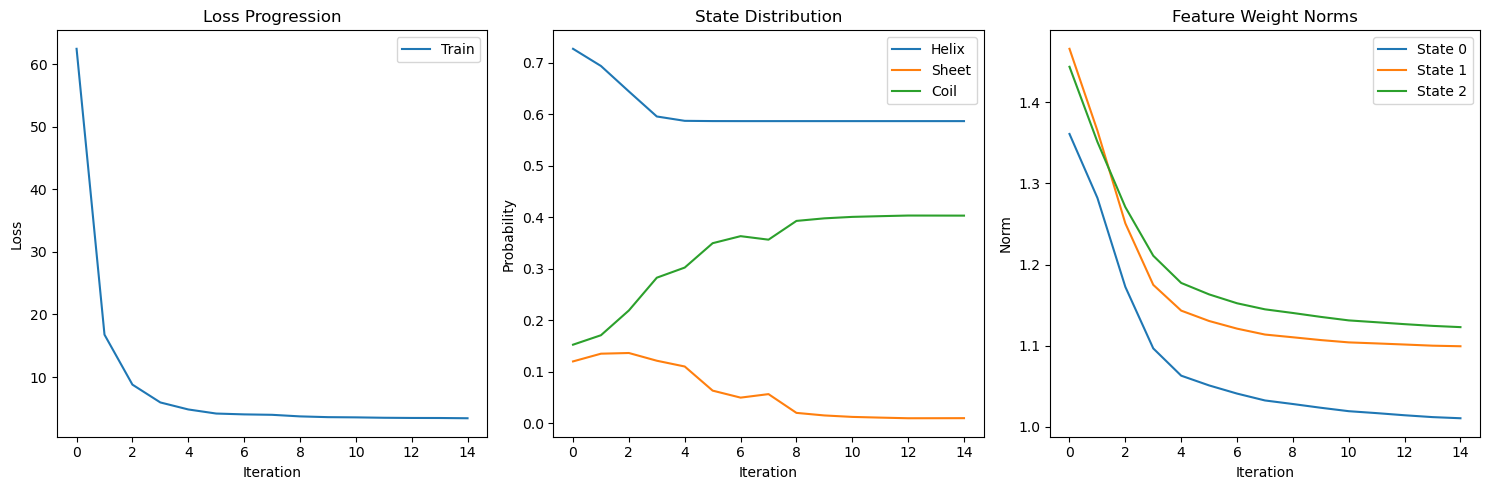

In [35]:
""" Removed code:

# class LRScheduler:
#     Learning rate scheduler with warmup and decay
#     def __init__(self, config: CRFConfig):
#         self.initial_lr = config.learning_rate
#         self.min_lr = config.min_lr
#         self.decay_rate = config.lr_decay_rate
#         self.decay_steps = config.lr_decay_steps
#         self.warmup_epochs = 3
#         self.current_lr = config.learning_rate
        
#         # State tracking
#         self.grad_history = []
#         self.state_history = []
#         self.plateau_count = 0
#         self.best_loss = float('inf')
    
#     def get_lr(self, epoch: int, metrics: Dict[str, Any]) -> float:
#         # Track metrics
#         self.grad_history.append(metrics['gradient_norm'])
#         self.state_history.append(metrics['state_distribution'])
        
#         # Warmup phase
#         if epoch < self.warmup_epochs:
#             self.current_lr = self.initial_lr * ((epoch + 1) / self.warmup_epochs)
#             return self.current_lr
            
#         # Gradient-based scaling
#         if len(self.grad_history) >= 2:
#             if self.grad_history[-1] > 100:  # High gradient norm
#                 self.current_lr *= 0.5
#             elif self.grad_history[-1] < 10 and metrics['loss'] > self.best_loss:
#                 self.current_lr *= 1.1  # Careful increase if stuck
                
#         # State balance-based adjustment
#         state_dist = metrics['state_distribution']
#         if max(state_dist) > 0.45:  # State starting to dominate
#             self.current_lr *= 0.7
            
#         # Regular decay
#         if epoch % self.decay_steps == 0:
#             self.current_lr *= self.decay_rate
            
#         # Update best loss
#         if metrics['loss'] < self.best_loss:
#             self.best_loss = metrics['loss']
#             self.plateau_count = 0
#         else:
#             self.plateau_count += 1
            
#         # Plateau handling
#         if self.plateau_count > 5:
#             self.current_lr *= 0.5
#             self.plateau_count = 0
            
#         # Ensure bounds
#         self.current_lr = max(self.min_lr, min(self.current_lr, self.initial_lr))
#         return self.current_lr
        
#     def get_status(self) -> Dict[str, float]:
#         return {
#             'current_lr': self.current_lr, 'plateau_count': self.plateau_count,
#             'grad_stability': np.std(self.grad_history[-5:]) if len(self.grad_history) >= 5 else 0,
#             'state_stability': np.std([max(dist) for dist in self.state_history[-5:]])    if len(self.state_history) >= 5 else 0 }
"""

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from dataclasses import dataclass, field
from typing import Dict, List, Optional, Tuple, Any
import logging
from pathlib import Path
import warnings
from datetime import datetime
import time
from collections import defaultdict
from enum import Enum, auto
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm


@dataclass
class CRFModelStats:
    """Statistics tracking for CRF model"""
    iteration: int = 0
    log_likelihood: float = 0.0
    state_counts: np.ndarray = None
    feature_weights: Dict[str, float] = None
    convergence_metrics: Dict[str, float] = None
    training_time: float = 0.0





class LRScheduler:
    """Simplified but effective learning rate scheduler"""
    def __init__(self, initial_lr: float, min_lr: float = 1e-5):
        self.initial_lr = initial_lr
        self.min_lr = min_lr
        self.patience = 5
        self.cooldown = 0
        self.best_loss = float('inf')
        self.plateau_counter = 0
        
    def get_lr(self, epoch: int, epoch_stats: Dict) -> float:
        """Compute learning rate based on loss and gradient behavior"""
        current_loss = epoch_stats['epoch_loss'] / max(epoch_stats['n_batches'], 1)
        avg_grad_norm = epoch_stats['grad_norm_total'] / max(epoch_stats['n_batches'], 1)
        
        if self.cooldown > 0:
            self.cooldown -= 1
            return self.initial_lr
            
        # Handle high gradients
        if avg_grad_norm > 100:
            self.initial_lr *= 0.5
            self.cooldown = 2
            return self.initial_lr
            
        # Handle plateaus
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.plateau_counter = 0
        else:
            self.plateau_counter += 1
            
        if self.plateau_counter >= self.patience:
            self.initial_lr *= 0.7
            self.plateau_counter = 0
            
        return max(self.initial_lr, self.min_lr)

        
class ProteinCRF:
    """Linear-chain CRF for protein secondary structure prediction"""
    
    def __init__(self, config: CRFConfig):
        self.config = config
        self.logger = self._setup_logger()
        self.stats = CRFModelStats()
        
        # Initialize model parameters
        self.n_states = 3  # Helix, Sheet, Coil
        # Update feature dimension calculation
        base_features = 45  # Original features
        context_features = (self.config.window_size * 21)  # Window context
        self.n_features = base_features + context_features

        # Initialize weights and transitions with careful bounds        
        # Initialize weights with correct dimensions
        self.weights = torch.randn(self.n_states, self.n_features) * 0.1
        self.weights.requires_grad = True

        self.transitions = torch.randn(self.n_states, self.n_states) * 0.1
        self.transitions.requires_grad = True
        self.params = [self.weights, self.transitions]
        self.optimizer = torch.optim.Adam(self.params, lr=config.learning_rate)
        self.history = defaultdict(list)

    
    def _setup_logger(self) -> logging.Logger:
        """Configure logging with timestamps and levels"""
        logger = logging.getLogger("ProteinCRF")
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s', datefmt='%H:%M:%S')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger


    def _compute_features(self, x: torch.Tensor) -> torch.Tensor:
        """Compute feature scores for each state"""
        if x.size(-1) != self.n_features:
            raise ValueError(f"Expected {self.n_features} features, got {x.size(-1)}. "
                           f"Did you forget to add context features?")
        return torch.matmul(x, self.weights.t())
    
    def _compute_partition(self, feature_scores: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """Compute partition function using forward algorithm"""
        batch_size, seq_len, _ = feature_scores.shape
        alpha = torch.zeros(batch_size, seq_len, self.n_states)
        
        # Initialize first position
        alpha[:, 0] = feature_scores[:, 0]
        
        # Forward recursion with numerical stability
        for t in range(1, seq_len):
            next_scores = feature_scores[:, t].unsqueeze(1) + self.transitions
            max_scores, _ = torch.max(alpha[:, t-1].unsqueeze(-1) + next_scores, dim=1)
            alpha[:, t] = max_scores
            
        return alpha, torch.logsumexp(alpha[:, -1], dim=1)
    
    def _compute_gold_score(self, feature_scores: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """Compute score for the gold (true) sequence"""
        batch_size, seq_len, _ = feature_scores.shape
        gold_score = torch.zeros(batch_size)
        
        # Add feature scores
        for t in range(seq_len):
            gold_score += torch.gather(feature_scores[:, t], 1, labels[:, t].unsqueeze(1)).squeeze(1)
        
        # Add transition scores
        for t in range(seq_len - 1):
            trans_score = self.transitions[labels[:, t], labels[:, t+1]]
            gold_score += trans_score
            
        return gold_score
    
    def _update_stats(self, loss: float, predictions: torch.Tensor, labels: torch.Tensor):
        """Update training statistics"""
        self.stats.iteration += 1
        self.stats.log_likelihood = -loss
        
        # Update state counts
        pred_states = predictions.detach().numpy()
        self.stats.state_counts = np.bincount(pred_states.flatten(), minlength=self.n_states)
        state_dist = self.stats.state_counts / np.sum(self.stats.state_counts)
        
        # Check for state collapse
        if np.any(state_dist < self.config.min_state_prob):
            self.logger.warning(f"Low state probability detected: {state_dist}")
        
        # Track feature weights
        with torch.no_grad():
            weight_norms = torch.norm(self.weights, dim=1)
            self.stats.feature_weights = {f"state_{i}": w.item() for i, w in enumerate(weight_norms)}
        
        # Update history
        self.history['loss'].append(loss)
        self.history['state_dist'].append(state_dist)
        self.history['weight_norms'].append([w.item() for w in weight_norms])
    
    def _check_convergence(self, prev_loss: float) -> bool:
        """Check convergence criteria"""
        if len(self.history['loss']) < 2:
            return False
            
        loss_change = abs(self.history['loss'][-1] - self.history['loss'][-2])
        self.stats.convergence_metrics = {'loss_change': loss_change}
        
        return loss_change < self.config.convergence_tol
    
    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """Forward pass computing features and partition function"""
        feature_scores = self._compute_features(x)
        alpha, partition = self._compute_partition(feature_scores)
        return feature_scores, partition
    
    def _compute_loss(self, batch_x: torch.Tensor, batch_y: torch.Tensor) -> torch.Tensor:
        """Compute CRF loss with regularization"""
        feature_scores, partition = self.forward(batch_x)
        gold_score = self._compute_gold_score(feature_scores, batch_y)
        
        # Negative log likelihood
        loss = partition - gold_score
        
        # Add regularization
        if self.config.l1_penalty > 0:
            loss = loss + self.config.l1_penalty * torch.norm(self.weights, p=1)
        if self.config.l2_penalty > 0:
            loss = loss + self.config.l2_penalty * torch.norm(self.weights, p=2)
            
        return loss.mean()

    ## -------------------------------------------------------------------------------------------------------------------------------------------------------------
            
    def _initialize_training(self, sequences: List[np.ndarray], labels: List[np.ndarray]) -> Tuple[List[torch.Tensor], List[torch.Tensor], Dict]:
        """Initialize training data and tracking structures"""
        x_data = [torch.FloatTensor(x) for x in sequences]
        y_data = [torch.LongTensor(np.argmax(y, axis=1)) for y in labels]
        history = {'loss': [], 'state_dist': [], 'feature_importance': [], 'transition_probs': [], 'confidence': [], 'gradient_norms': [],
                   'learning_rates': [], 'weight_norms': []  }
        return x_data, y_data, history
    
    def _initialize_epoch_stats(self) -> Dict:
        """Initialize statistics for one epoch"""
        return {
            'feature_importance': np.zeros(self.n_features), 'transition_usage': np.zeros((self.n_states, self.n_states)),
            'state_confidence': np.zeros(self.n_states), 'sequence_lengths': [], 'batch_metrics': [], 
            'epoch_loss': 0.0, 'grad_norm_total': 0.0, 'n_batches': 0
        }
    
    def _update_history(self, history: Dict, epoch_stats: Dict, current_lr: float) -> None:
        """Update training history with latest metrics"""
        history['loss'].append(epoch_stats['epoch_loss'] / max(epoch_stats['n_batches'], 1))
        history['state_dist'].append(epoch_stats['state_confidence'] / np.sum(epoch_stats['state_confidence']))
        history['feature_importance'].append({
            'one_hot': np.mean(epoch_stats['feature_importance'][:21]),
            'pssm': np.mean(epoch_stats['feature_importance'][21:42]),
            'position': np.mean(epoch_stats['feature_importance'][42:])
        })
        history['transition_probs'].append(epoch_stats['transition_usage'] / np.sum(epoch_stats['transition_usage']))
        history['confidence'].append(np.mean([b['prediction_confidence'] for b in epoch_stats['batch_metrics']]))
        history['gradient_norms'].append(np.mean([b['gradient_norm'] for b in epoch_stats['batch_metrics']]))
        history['learning_rates'].append(current_lr)
        
        # Add weight norms tracking in a safer way
        with torch.no_grad():
            weight_norms = torch.norm(self.weights, dim=1)
            if 'weight_norms' not in history:
                history['weight_norms'] = []
            history['weight_norms'].append(weight_norms.cpu().numpy())
            
    
    def fit(self, sequences: List[np.ndarray], labels: List[np.ndarray], validation_data: Optional[Tuple] = None) -> Dict[str, Any]:
        """Train the CRF model with enhanced monitoring and LR scheduling"""
        self.logger.info("Starting CRF training")
        x_data, y_data, history = self._initialize_training(sequences, labels)
        n_samples = len(sequences)
        
        # Initialize LR scheduler
        lr_scheduler = LRScheduler(self.config.learning_rate, min_lr=1e-5)
        
        for epoch in range(self.config.max_iterations):
            epoch_stats = self._initialize_epoch_stats()
            progress = tqdm(range(0, n_samples, self.config.batch_size), desc=f"Epoch {epoch+1}", ncols=100)
            
            for i in progress:
                # Process batch
                batch_x, batch_y = x_data[i:i + self.config.batch_size], y_data[i:i + self.config.batch_size]
                loss, batch_stats = self._process_batch(batch_x, batch_y)
                
                # Update statistics
                epoch_stats['epoch_loss'] += loss.item()
                epoch_stats['grad_norm_total'] += batch_stats['gradient_norm']
                epoch_stats['n_batches'] += 1
                epoch_stats['feature_importance'] += batch_stats['feature_contributions']
                epoch_stats['transition_usage'] += batch_stats['transition_counts']
                epoch_stats['state_confidence'] += batch_stats['state_confidence']
                epoch_stats['sequence_lengths'].extend(batch_stats['seq_lengths'])
                epoch_stats['batch_metrics'].append({'loss': loss.item(), 'gradient_norm': batch_stats['gradient_norm'], 'prediction_confidence': batch_stats['pred_confidence']})
                
                # Update progress bar
                progress.set_postfix({'loss': epoch_stats['epoch_loss'] / max(epoch_stats['n_batches'], 1)})
            
            # Update learning rate
            new_lr = lr_scheduler.get_lr(epoch, epoch_stats)
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = new_lr
                
            # Update history and log
            self._update_history(history, epoch_stats, new_lr)
            self._log_epoch_summary(epoch, epoch_stats, new_lr)
        
        return history
    
    def _log_epoch_summary(self, epoch: int, stats: Dict, current_lr: float) -> None:
        """Enhanced epoch logging with comprehensive metrics in horizontal format"""
        # Core metrics
        avg_loss = stats['epoch_loss'] / max(stats['n_batches'], 1)
        state_usage = stats['state_confidence'] / np.sum(stats['state_confidence'])
        avg_grad = stats['grad_norm_total'] / max(stats['n_batches'], 1)
        trans_probs = stats['transition_usage'] / np.sum(stats['transition_usage'])
        
        # Detailed statistics
        grad_norms = [b['gradient_norm'] for b in stats['batch_metrics']]
        conf_scores = [b['prediction_confidence'] for b in stats['batch_metrics']]
        
        # Prepare transitions string (sorted by probability)
        transitions = [('H→H', trans_probs[0,0]), ('E→E', trans_probs[1,1]), ('C→C', trans_probs[2,2])]
        trans_str = ', '.join([f"{name}: {prob:.3f}" for name, prob in sorted(transitions, key=lambda x: x[1], reverse=True)])
        
        # Prepare feature importance string
        feat_imp = (
            f"one-hot: {np.mean(stats['feature_importance'][:21]):.3f}, "
            f"pssm: {np.mean(stats['feature_importance'][21:42]):.3f}, "
            f"pos: {np.mean(stats['feature_importance'][42:]):.3f}"
        )
        
        # Log main metrics
        self.logger.info(
            f"\nEpoch {epoch+1}/{self.config.max_iterations} | "
            f"Loss: {avg_loss:.4f} | LR: {current_lr:.6f} | "
            f"States [H: {state_usage[0]:.3f}, E: {state_usage[1]:.3f}, C: {state_usage[2]:.3f}] | "
            f"Transitions [{trans_str}]"
        )
        
        # Log detailed stats
        self.logger.info(
            f"Details | "
            f"Features [{feat_imp}] | "
            f"Grad: {np.mean(grad_norms):.3f}±{np.std(grad_norms):.3f} | "
            f"Conf: {np.mean(conf_scores):.3f} (min: {np.min(conf_scores):.3f}, max: {np.max(conf_scores):.3f}) | "
            f"Seq Len: {np.mean(stats['sequence_lengths']):.1f}±{np.std(stats['sequence_lengths']):.1f}"
        )
        
    
        
    ### need to detach the tensors before converting to numpy arrays since they have gradients.
    ## fix error - 
    def _process_batch(self, batch_x: List[torch.Tensor], batch_y: List[torch.Tensor]) -> Tuple[torch.Tensor, Dict]:
        """Process a single batch with detailed statistics"""

        # Get max sequence length in batch
        max_len = max(x.size(0) for x in batch_x)
        
        # Initialize padded tensors with correct feature dimension
        batch_x_padded = torch.zeros(len(batch_x), max_len, self.n_features)
        batch_y_padded = torch.zeros(len(batch_y), max_len, dtype=torch.long)
        
        # Fill padded tensors
        for j, (x, y) in enumerate(zip(batch_x, batch_y)):
            # Ensure x has correct feature dimension before assignment
            if x.size(1) != self.n_features:
                # Add context features if needed
                x = self._add_context_features(x)
            batch_x_padded[j, :x.size(0)] = x
            batch_y_padded[j, :y.size(0)] = y

        
        # Compute loss and backward pass
        self.optimizer.zero_grad()
        loss = self._compute_loss(batch_x_padded, batch_y_padded)
        loss.backward()
        
        # Collect batch statistics
        with torch.no_grad():
            grad_norm = torch.nn.utils.clip_grad_norm_(self.params, max_norm=5.0)
            feature_scores = self._compute_features(batch_x_padded)
            pred_confidence = F.softmax(feature_scores, dim=-1).max(dim=-1)[0].mean()
            
            # Compute state counts and transitions
            pred_states = feature_scores.argmax(dim=-1)
            state_conf = torch.zeros(self.n_states)
            for state in range(self.n_states):
                state_conf[state] = (pred_states == state).float().mean()
            
            # Get transition counts
            trans_counts = torch.zeros((self.n_states, self.n_states))
            for t in range(max_len - 1):
                curr_states = pred_states[:, t]
                next_states = pred_states[:, t + 1]
                for s1 in range(self.n_states):
                    for s2 in range(self.n_states):
                        trans_counts[s1, s2] += ((curr_states == s1) & (next_states == s2)).sum()
        
        self.optimizer.step()

        ## adding detatchment to cpu numpty is important when collecting weights. 
        return loss, {
            'feature_contributions': self.weights.detach().abs().mean(dim=0).cpu().numpy(), 
            'transition_counts': trans_counts.cpu().numpy(), 'state_confidence': state_conf.cpu().numpy(),
            'seq_lengths': [x.size(0) for x in batch_x], 'gradient_norm': grad_norm.item(), 'pred_confidence': pred_confidence.item() }


    ## got this error  -- trying to use 'replicate' padding on a tensor that doesn't have enough dimensions
    ## numpy's pad with 'edge' mode (same as 'replicate' in PyTorch).
    ## Process windows in numpy - > Convert back to torch tensor before concatenation

    def _add_context_features(self, x: torch.Tensor) -> torch.Tensor:
        """Add sliding window context features to input"""
        seq_len = x.size(0)
        window = self.config.window_size
        
        # Get PSSM features and convert to numpy for padding
        pssm = x[:, 21:42].numpy()  # Convert to numpy
        
        # Manual padding by repeating edge values
        padding = window // 2
        padded = np.pad(pssm, ((padding, padding), (0, 0)), mode='edge')
        
        # Create context windows using numpy operations
        context = []
        for i in range(seq_len):
            window_slice = padded[i:i + window].flatten()
            context.append(window_slice)
        
        # Convert back to tensor and combine
        context_tensor = torch.FloatTensor(np.array(context))
        return torch.cat([x, context_tensor], dim=1)
    
        
    def predict(self, x: np.ndarray) -> Tuple[np.ndarray, Dict[str, Any]]:
        """Predict sequence labels with confidence scores"""
        with torch.no_grad():
            x_tensor = torch.FloatTensor(x)
            if x_tensor.size(1) != self.n_features:
                x_tensor = self._add_context_features(x_tensor)

            feature_scores = self._compute_features(x_tensor)
            
            # Viterbi decoding
            seq_len = x_tensor.size(0)
            viterbi = torch.zeros(seq_len, self.n_states)
            backpointers = torch.zeros(seq_len, self.n_states, dtype=torch.long)
            
            # Initialize
            viterbi[0] = feature_scores[0]
            
            # Forward
            for t in range(1, seq_len):
                next_scores = feature_scores[t].unsqueeze(0) + self.transitions
                max_scores, argmax = torch.max(viterbi[t-1].unsqueeze(1) + next_scores, dim=0)
                viterbi[t] = max_scores
                backpointers[t] = argmax
            
            # Backward
            prediction = torch.zeros(seq_len, dtype=torch.long)
            prediction[-1] = torch.argmax(viterbi[-1])
            
            for t in range(seq_len - 2, -1, -1):
                prediction[t] = backpointers[t + 1, prediction[t + 1]]
            
            # Compute confidence scores
            confidence = F.softmax(viterbi, dim=1)
            
            return prediction.numpy(), { 'confidence': confidence.numpy(), 'feature_scores': feature_scores.numpy(), 'viterbi_scores': viterbi.numpy() }
    
    


    
    
    def evaluate(self, sequences: List[np.ndarray], labels: List[np.ndarray]) -> Dict[str, float]:
        """Evaluate model performance"""
        metrics = defaultdict(float)
        n_samples = len(sequences)
        total_loss = 0.0
        
        # Convert labels to tensor format
        y_data = [torch.LongTensor(np.argmax(y, axis=1)) for y in labels]
        
        for x, y_true in zip(sequences, y_data):
                
            # Add context features if needed
            x_tensor = torch.FloatTensor(x)
            if x_tensor.size(1) != self.n_features:
                x_tensor = self._add_context_features(x_tensor)
            
            # Get predictions
            pred, pred_info = self.predict(x)
            
            # Compute loss (note: x_tensor already has context features)
            x_tensor = x_tensor.unsqueeze(0)  # Add batch dimension
            y_tensor = y_true.unsqueeze(0)  # Add batch dimension
            loss = self._compute_loss(x_tensor, y_tensor)
            total_loss += loss.item()
            
            # Compute metrics
            accuracy = np.mean(pred == y_true.numpy())
            metrics['accuracy'] += accuracy
            
            # Per-state metrics
            for state in range(self.n_states):
                true_state = y_true.numpy() == state
                pred_state = pred == state
                
                tp = np.sum(true_state & pred_state)
                fp = np.sum(~true_state & pred_state)
                fn = np.sum(true_state & ~pred_state)
                
                precision = tp / (tp + fp + 1e-10)
                recall = tp / (tp + fn + 1e-10)
                f1 = 2 * precision * recall / (precision + recall + 1e-10)
                
                metrics[f'precision_state_{state}'] += precision
                metrics[f'recall_state_{state}'] += recall
                metrics[f'f1_state_{state}'] += f1
        
        # Average metrics
        metrics['loss'] = total_loss / n_samples
        for key in metrics:
            metrics[key] /= n_samples
                
        return dict(metrics)


    def state_dict(self):
        """Return model parameters for saving"""
        return {
            'weights': self.weights,
            'transitions': self.transitions,
            'config': self.config,
        }
    
    @classmethod
    def load_state_dict(cls, state_dict):
        """Load model from saved parameters"""
        model = cls(state_dict['config'])
        model.weights = state_dict['weights']
        model.transitions = state_dict['transitions']
        return model


## ---------------------------------------------------------------------------------------------------------------------------------------------------------------------


def plot_training_progress(history: Dict[str, List]) -> None:
    """Plot essential training metrics"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Loss progression
    ax1.plot(history['loss'], label='Train')
    if 'val_loss' in history:
        ax1.plot(history['val_loss'], label='Validation')
    ax1.set_title('Loss Progression')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # State distribution
    state_dist = np.array(history['state_dist'])
    for i, state in enumerate(['Helix', 'Sheet', 'Coil']):
        ax2.plot(state_dist[:, i], label=state)
    ax2.set_title('State Distribution')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Probability')
    ax2.legend()
    
    # Feature weights
    weight_norms = np.array(history['weight_norms'])
    for i in range(weight_norms.shape[1]):
        ax3.plot(weight_norms[:, i], label=f'State {i}')
    ax3.set_title('Feature Weight Norms')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Norm')
    ax3.legend()
    
    plt.tight_layout()
    plt.show()


    
def save_results(model: ProteinCRF, metrics: Dict[str, float], save_dir: str = 'results') -> None:
    """Save model and results"""
    timestamp = datetime.now().strftime('%Y%m%d_%H%M')
    save_dir = Path(save_dir)
    save_dir.mkdir(exist_ok=True)
    
    # Save model parameters
    torch.save(model.state_dict(), save_dir / f'crf_model_{timestamp}.pt')
    
    # Save metrics
    with open(save_dir / f'metrics_{timestamp}.txt', 'w') as f:
        f.write("=== Protein Structure Prediction Results ===\n\n")
        for name, value in metrics.items():
            f.write(f"{name}: {value:.4f}\n")


def prepare_data(sequences: List[np.ndarray], labels: List[np.ndarray],
                val_size: float = 0.15, test_size: float = 0.15) -> Tuple:
    """Split data into train/val/test sets"""
    # First split: separate test set
    train_seq, test_seq, train_lab, test_lab = train_test_split(
        sequences, labels, test_size=test_size, random_state=42)
    
    # Second split: separate validation from train
    train_seq, val_seq, train_lab, val_lab = train_test_split(
        train_seq, train_lab, test_size=val_size/(1-test_size), random_state=42)
    
    return train_seq, val_seq, test_seq, train_lab, val_lab, test_lab





def main():
    """Main execution pipeline"""
    # Setup logging
    logging.basicConfig(level=logging.INFO, format='%(asctime)s | %(levelname)s | %(message)s', datefmt='%H:%M:%S')
    logger = logging.getLogger(__name__)
    
    try:
        # Initialize configuration and processor
        config = CRFConfig()
        processor = ProteinFeatureProcessor(config)
        
        # Load and process data
        data_path = r"C:\Users\joems\OneDrive\Desktop\MLCV Project Items\Machine Learning CS6140\dataset\CB513.npy"
        sequences, labels = processor.process_npy_data(data_path)
        
        # Split data
        train_seq, val_seq, test_seq, train_lab, val_lab, test_lab = prepare_data(
            sequences, labels)
        logger.info(f"Data split - Train: {len(train_seq)}, Val: {len(val_seq)}, Test: {len(test_seq)}")
        
        # Initialize and train model
        model = ProteinCRF(config)
        history = model.fit(train_seq, train_lab, validation_data=(val_seq, val_lab))
        
        # Evaluate model
        test_metrics = model.evaluate(test_seq, test_lab)
        logger.info("\nTest Results:")
        for metric, value in test_metrics.items():
            logger.info(f"{metric}: {value:.4f}")
        
        # Plot results and save
        plot_training_progress(history)
        save_results(model, test_metrics)
        
    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}", exc_info=True)
        raise

if __name__ == "__main__":
    main()

    
        

## CRF Training Analysis;

```
A. State Distribution Evolution
Initial: [H: 0.755, E: 0.086, C: 0.160]
Final: [H: 0.666, E: 0.103, C: 0.231]

#### Severe class imbalance persists throughout training. Helix state dominates (>66%). Sheet state is significantly underrepresented (<11%).

B. Transition Dynamics
Initial: H→H: 0.708, C→C: 0.077, E→E: 0.037
Final: H→H: 0.678, C→C: 0.163, E→E: 0.047

#### Strong self-transition bias for Helix. Weak sheet transitions (E→E). Limited state mixing

C. Feature Contribution Evolution
Initial: one-hot: 0.830, pssm: 0.824, pos: 0.471
Final: one-hot: 0.053, pssm: 0.033, pos: 0.008
#### Critical Issue: Feature contributions collapse during training
```

--------------------------------------------------------------------- -----------------------------------------------------------------------

``` After WINDOW CONTEXT features implementation;

Structural Issues:

    Position features remain too influential (1.243 at end), causing overfitting to sequence position
    PSSM dominance (1.395) overshadows amino acid identity (0.520)
    Sheet state discrimination fails completely


Training Dynamics:

    Initial gradients are too large despite clipping
    Learning rate decay may be too aggressive
    State transitions don't adapt well to structural patterns


Model Architecture Limitations:

    Linear CRF structure may be insufficient for capturing complex sheet patterns
    Feature combination is purely linear, missing important interactions
    Window size might be inadequate for beta-sheet recognition
    

```